In [2]:
G10 = ['USA', 'CAN', 'JPN', 'SWE', 'CHE', 'GBR', 'BEL', 'FRA', 'DEU', 'ITA', 'NLD']
G10_without_US = [country for country in G10 if country != 'USA']

# Prepare the data

In [ ]:
import pandas as pd

# Define the file path to your XLSX file
fx_data_file_path = '/content/FX_G10.xlsx'  # Replace with the actual file path

# Read the XLSX file into a Pandas DataFrame
fx_df = pd.read_excel(fx_data_file_path)

# Define a dictionary to map old column names to new column names
column_name_mapping = {
    'Uses last day of month to indicate the date': 'Last Date of Month',
    'Exchange Rate for Canada (C$/US$)': 'CAN Rate to USD',
    'Exchange Rate for Japan (Yen/US$)': 'JPN Rate to USD',
    'Exchange Rate for Sweden (Krona/US$)': 'SWE Rate to USD',
    'Exchange Rate for Switzerland (Franc/US$)': 'CHE Rate to USD',
    'Exchange Rate for United Kingdom (Pound/US$)': 'GBR Rate to USD',
    'Exchange Rate for Belgium (Franc/US$)': 'BEL Rate to USD',
    'Exchange Rate for France (Franc/US$)': 'FRA Rate to USD',
    'Exchange Rate for Germany (D. Mark/US$)': 'DEU Rate to USD',
    'Exchange Rate for Italy (Lira/US$)': 'ITA Rate to USD',
    'Exchange Rate for Netherlands (Guilder/US$)': 'NLD Rate to USD'
}

# Rename the columns based on the dictionary
fx_df.rename(columns=column_name_mapping, inplace=True)

# Display the DataFrame with renamed columns
fx_df

,Last Date of Month,CAN Rate to USD,JPN Rate to USD,SWE Rate to USD,CHE Rate to USD,GBR Rate to USD,BEL Rate to USD,FRA Rate to USD,DEU Rate to USD,ITA Rate to USD,NLD Rate to USD
0,1990-05-31,1.1747,154.0441,6.0560,1.4198,0.596161,34.32,5.5989,1.6630,1221.93,1.8704
1,1990-06-30,1.1730,153.6957,6.0896,1.4250,0.584693,34.60,5.6613,1.6832,1235.60,1.8946
2,1990-07-31,1.1570,149.0395,5.9470,1.3924,0.552547,33.72,5.4924,1.6375,1199.65,1.8452
3,1990-08-31,1.1448,147.4609,5.7754,1.3076,0.525956,32.28,5.2680,1.5702,1157.07,1.7692
4,1990-09-30,1.1583,138.4405,5.7663,1.3069,0.532085,32.28,5.2575,1.5701,1172.87,1.7699
...,...,...,...,...,...,...,...,...,...,...,...
340,2018-09-30,1.3034,112.0974,8.9395,0.9683,0.765345,NaN,NaN,NaN,NaN,NaN
341,2018-10-31,1.3004,112.7218,9.0391,0.9940,0.768521,NaN,NaN,NaN,NaN,NaN
342,2018-11-30,1.3205,113.3380,9.0676,1.0011,0.775194,NaN,NaN,NaN,NaN,NaN
343,2018-12-31,1.3436,112.1994,9.0303,0.9919,0.789640,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert the 'Last Date of Month' column to string type
fx_df['Last Date of Month'] = fx_df['Last Date of Month'].astype(str)

In [ ]:
%%time

import pandas as pd

# Read the CSV file into a Pandas DataFrame
ir_df = pd.read_csv('interest_rates_G10.csv')

# Iterate through rows in the interest rates DataFrame and update the corresponding row in the foreign exchange DataFrame
for index, ir_row in ir_df.iterrows():
    location = ir_row['LOCATION']
    if location not in G10:
        continue

    column_name = f'{location} IR'
    time = ir_row['TIME']
    value = ir_row['Value']

    # Find the corresponding row in the foreign exchange DataFrame based on the 'Last Date of Month' column
    if not fx_df[fx_df['Last Date of Month'].str.startswith(time)].empty:
        fx_row = fx_df[fx_df['Last Date of Month'].str.startswith(time)].iloc[0]

        # Update the value in the interest rate column for the respective location
        fx_df.at[fx_row.name, column_name] = value

# Display the updated DataFrame
fx_df

CPU times: user 5.81 s, sys: 171 ms, total: 5.98 s
Wall time: 5.94 s


,Last Date of Month,CAN Rate to USD,JPN Rate to USD,SWE Rate to USD,CHE Rate to USD,GBR Rate to USD,BEL Rate to USD,FRA Rate to USD,DEU Rate to USD,ITA Rate to USD,...,GBR IR,BEL IR,JPN IR,CAN IR,DEU IR,NLD IR,CHE IR,SWE IR,FRA IR,ITA IR
0,1990-05-31,1.1747,154.0441,6.0560,1.4198,0.596161,34.32,5.5989,1.6630,1221.93,...,15.19429,9.8500,NaN,13.760000,8.3300,8.4800,NaN,12.97,9.8143,12.2700
1,1990-06-30,1.1730,153.6957,6.0896,1.4250,0.584693,34.60,5.6613,1.6832,1235.60,...,15.01302,9.4000,NaN,13.817500,8.3000,8.3600,NaN,12.56,10.0737,11.4900
2,1990-07-31,1.1570,149.0395,5.9470,1.3924,0.552547,33.72,5.4924,1.6375,1199.65,...,14.98580,9.2000,NaN,13.675000,8.2600,8.2700,NaN,12.58,10.0501,11.5900
3,1990-08-31,1.1448,147.4609,5.7754,1.3076,0.525956,32.28,5.2680,1.5702,1157.07,...,15.01664,9.1500,NaN,13.256000,8.4500,8.5400,NaN,12.99,10.1915,11.6400
4,1990-09-30,1.1583,138.4405,5.7663,1.3069,0.532085,32.28,5.2575,1.5701,1172.87,...,14.95117,8.9500,NaN,12.755000,8.4700,8.5100,NaN,13.07,10.3466,10.8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2018-09-30,1.3034,112.0974,8.9395,0.9683,0.765345,NaN,NaN,NaN,NaN,...,0.80093,-0.3188,0.05,1.874737,-0.3188,-0.3188,-0.80,-0.73,-0.3188,-0.3188
341,2018-10-31,1.3004,112.7218,9.0391,0.9940,0.768521,NaN,NaN,NaN,NaN,...,0.80618,-0.3177,0.05,2.013182,-0.3177,-0.3177,-0.80,-0.70,-0.3177,-0.3177
342,2018-11-30,1.3205,113.3380,9.0676,1.0011,0.775194,NaN,NaN,NaN,NaN,...,0.87483,-0.3164,0.05,2.131905,-0.3164,-0.3164,-0.80,-0.73,-0.3164,-0.3164
343,2018-12-31,1.3436,112.1994,9.0303,0.9919,0.789640,NaN,NaN,NaN,NaN,...,0.90444,-0.3119,0.05,2.192631,-0.3119,-0.3119,-0.78,-0.66,-0.3119,-0.3119


In [ ]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('infl_G10.xlsx')

# Row names (countries)
row_names = df.iloc[6:17, 0].tolist()
# Rename full country names to abbreviations
country_name_mapping = {
    'Belgium': 'BEL',
    'Canada': 'CAN',
    'France': 'FRA',
    'Germany': 'DEU',
    'Italy': 'ITA',
    'Japan': 'JPN',
    'Netherlands': 'NLD',
    'Sweden': 'SWE',
    'Switzerland': 'CHE',
    'United Kingdom': 'GBR',
    'United States': 'USA'
}
row_names = [country_name_mapping[country] for country in row_names]

# Column names (periods)
column_names = df.iloc[4, 3::2].tolist()
# Convert column names to the desired format (e.g., "May-1990" to "1990-05")
column_names = [pd.to_datetime(col, format='%b-%Y').strftime('%Y-%m') for col in column_names]

# Extract the data values
data = df.iloc[6:17, 4::2].values

# Create a DataFrame with row and column names
inflation_df = pd.DataFrame(data, index=row_names, columns=column_names)

# Display the extracted data
inflation_df = inflation_df.transpose()
inflation_df

,BEL,CAN,FRA,DEU,ITA,JPN,NLD,SWE,CHE,GBR,USA
1990-05,0.034799,0.516129,0.149054,0.208333,0.30722,0.5,0.096899,0.570148,0.486237,1.1,0.232739
1990-06,0.057978,0.385109,-0.014883,0.10395,0.459418,-0.4,-0.096805,-0.062991,0.139431,0.3,0.541796
1990-07,0.359254,0.383632,0.029771,0.0,0.304878,-0.2,0.387597,0.950303,0.049158,0.0,0.384912
1990-08,0.577367,0.127388,0.654762,0.311526,0.683891,0.4,0.289575,0.686807,1.069048,0.9,0.920245
1990-09,0.907003,0.254453,0.709639,0.310559,0.528302,0.8,0.866218,1.14005,0.475149,0.9,0.835866
...,...,...,...,...,...,...,...,...,...,...,...
2023-05,0.378489,0.383632,-0.051064,-0.085763,0.335289,..,0.198397,0.315055,0.250976,0.6,0.251843
2023-06,-0.149254,0.127388,0.178815,0.257511,0,..,-0.340567,1.071811,0.063622,0.2,0.322891
2023-07,0.810322,0.572519,0.050999,0.256849,0,..,1.03314,0.044391,-0.141837,-0.3,0.190751
2023-08,0.764788,0.379507,1.002464,0.341588,0.334169,..,0.44836,0.073952,0.213528,0.4,0.436715


In [ ]:
# Iterate through rows in the inflation rates DataFrame and update the corresponding row in the foreign exchange DataFrame
for index, infl_row in inflation_df.iterrows():
    time = index

    # Find the corresponding row in the foreign exchange DataFrame based on the 'Last Date of Month' column
    fx_row = fx_df[fx_df['Last Date of Month'].str.startswith(time)]

    if not fx_row.empty:
        # Update the value in the inflation column for the respective location
        for country in G10:
            if country in infl_row:
                fx_df.at[fx_row.index[0], f'{country} INFL'] = infl_row[country]

# Display the updated DataFrame with inflation data
fx_df

,Last Date of Month,CAN Rate to USD,JPN Rate to USD,SWE Rate to USD,CHE Rate to USD,GBR Rate to USD,BEL Rate to USD,FRA Rate to USD,DEU Rate to USD,ITA Rate to USD,...,CAN INFL,JPN INFL,SWE INFL,CHE INFL,GBR INFL,BEL INFL,FRA INFL,DEU INFL,ITA INFL,NLD INFL
0,1990-05-31,1.1747,154.0441,6.0560,1.4198,0.596161,34.32,5.5989,1.6630,1221.93,...,0.516129,0.5,0.570148,0.486237,1.1,0.034799,0.149054,0.208333,0.307220,0.096899
1,1990-06-30,1.1730,153.6957,6.0896,1.4250,0.584693,34.60,5.6613,1.6832,1235.60,...,0.385109,-0.4,-0.062991,0.139431,0.3,0.057978,-0.014883,0.103950,0.459418,-0.096805
2,1990-07-31,1.1570,149.0395,5.9470,1.3924,0.552547,33.72,5.4924,1.6375,1199.65,...,0.383632,-0.2,0.950303,0.049158,0.0,0.359254,0.029771,0.000000,0.304878,0.387597
3,1990-08-31,1.1448,147.4609,5.7754,1.3076,0.525956,32.28,5.2680,1.5702,1157.07,...,0.127388,0.4,0.686807,1.069048,0.9,0.577367,0.654762,0.311526,0.683891,0.289575
4,1990-09-30,1.1583,138.4405,5.7663,1.3069,0.532085,32.28,5.2575,1.5701,1172.87,...,0.254453,0.8,1.140050,0.475149,0.9,0.907003,0.709639,0.310559,0.528302,0.866218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2018-09-30,1.3034,112.0974,8.9395,0.9683,0.765345,NaN,NaN,NaN,NaN,...,-0.372578,0.1,0.458089,0.059539,0.1,0.000000,-0.211987,0.191388,-0.484966,-0.431034
341,2018-10-31,1.3004,112.7218,9.0391,0.9940,0.768521,NaN,NaN,NaN,NaN,...,0.299177,0.3,-0.126835,0.176729,0.1,0.678565,0.106219,0.191022,0.000000,0.355940
342,2018-11-30,1.3205,113.3380,9.0676,1.0011,0.775194,NaN,NaN,NaN,NaN,...,-0.447427,-0.3,-0.096759,-0.255088,0.2,0.156957,-0.212212,-0.667302,-0.194932,-0.239647
343,2018-12-31,1.3436,112.1994,9.0303,0.9919,0.789640,NaN,NaN,NaN,NaN,...,-0.074906,-0.3,0.444915,-0.256731,0.1,-0.239676,0.019333,0.000000,-0.097656,-0.096089


from matplotlib import pyplot as plt
fx_df['CAN Rate to USD'].plot(kind='hist', bins=20, title='CAN Rate to USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
fx_df['JPN Rate to USD'].plot(kind='hist', bins=20, title='JPN Rate to USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
fx_df['SWE Rate to USD'].plot(kind='hist', bins=20, title='SWE Rate to USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
fx_df['CHE Rate to USD'].plot(kind='hist', bins=20, title='CHE Rate to USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
fx_df.plot(kind='scatter', x='CAN Rate to USD', y='JPN Rate to USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
fx_df.plot(kind='scatter', x='JPN Rate to USD', y='SWE Rate to USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
fx_df.plot(kind='scatter', x='SWE Rate to USD', y='CHE Rate to USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
fx_df.plot(kind='scatter', x='CHE Rate to USD', y='GBR Rate to USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
fx_df['CAN Rate to USD'].plot(kind='line', figsize=(8, 4), title='CAN Rate to USD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
fx_df['JPN Rate to USD'].plot(kind='line', figsize=(8, 4), title='JPN Rate to USD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
fx_df['SWE Rate to USD'].plot(kind='line', figsize=(8, 4), title='SWE Rate to USD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
fx_df['CHE Rate to USD'].plot(kind='line', figsize=(8, 4), title='CHE Rate to USD')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd

# Read the 'JP_IR.csv' file
jp_ir_df = pd.read_csv('JP_IR.csv', skiprows=1, names=['DATE', 'VALUE'])  # Skip the first row

# Read the 'SWISS_IR.csv' file
swiss_ir_df = pd.read_csv('SWISS_IR.csv', skiprows=1, names=['DATE', 'VALUE'])  # Skip the first row

# Function to fill missing values in 'JPN IR' column
def fill_missing_jpn_ir(row):
    date = row['Last Date of Month']
    date = f'{date[:4 + 1 + 2]}-01'
    if pd.notna(row['JPN IR']):
        return row['JPN IR']
    elif date in jp_ir_df['DATE'].values:
        return jp_ir_df[jp_ir_df['DATE'] == date]['VALUE'].values[0]
    else:
        print(f"Warning: Missing value in 'JPN IR' on {date}")
        return None

# Function to fill missing values in 'CHE IR' column
def fill_missing_che_ir(row):
    date = row['Last Date of Month']
    date = f'{date[:4 + 1 + 2]}-01'
    if pd.notna(row['CHE IR']):
        return row['CHE IR']
    elif date in swiss_ir_df['DATE'].values:
        return swiss_ir_df[swiss_ir_df['DATE'] == date]['VALUE'].values[0]
    else:
        print(f"Warning: Missing value in 'CHE IR' on {date}")
        return None

# Fill missing values in 'JPN IR' and 'CHE IR' columns
fx_df['JPN IR'] = fx_df.apply(fill_missing_jpn_ir, axis=1)
fx_df['CHE IR'] = fx_df.apply(fill_missing_che_ir, axis=1)

# Display the updated DataFrame
fx_df

,Last Date of Month,CAN Rate to USD,JPN Rate to USD,SWE Rate to USD,CHE Rate to USD,GBR Rate to USD,BEL Rate to USD,FRA Rate to USD,DEU Rate to USD,ITA Rate to USD,...,CAN INFL,JPN INFL,SWE INFL,CHE INFL,GBR INFL,BEL INFL,FRA INFL,DEU INFL,ITA INFL,NLD INFL
0,1990-05-31,1.1747,154.0441,6.0560,1.4198,0.596161,34.32,5.5989,1.6630,1221.93,...,0.516129,0.5,0.570148,0.486237,1.1,0.034799,0.149054,0.208333,0.307220,0.096899
1,1990-06-30,1.1730,153.6957,6.0896,1.4250,0.584693,34.60,5.6613,1.6832,1235.60,...,0.385109,-0.4,-0.062991,0.139431,0.3,0.057978,-0.014883,0.103950,0.459418,-0.096805
2,1990-07-31,1.1570,149.0395,5.9470,1.3924,0.552547,33.72,5.4924,1.6375,1199.65,...,0.383632,-0.2,0.950303,0.049158,0.0,0.359254,0.029771,0.000000,0.304878,0.387597
3,1990-08-31,1.1448,147.4609,5.7754,1.3076,0.525956,32.28,5.2680,1.5702,1157.07,...,0.127388,0.4,0.686807,1.069048,0.9,0.577367,0.654762,0.311526,0.683891,0.289575
4,1990-09-30,1.1583,138.4405,5.7663,1.3069,0.532085,32.28,5.2575,1.5701,1172.87,...,0.254453,0.8,1.140050,0.475149,0.9,0.907003,0.709639,0.310559,0.528302,0.866218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2018-09-30,1.3034,112.0974,8.9395,0.9683,0.765345,NaN,NaN,NaN,NaN,...,-0.372578,0.1,0.458089,0.059539,0.1,0.000000,-0.211987,0.191388,-0.484966,-0.431034
341,2018-10-31,1.3004,112.7218,9.0391,0.9940,0.768521,NaN,NaN,NaN,NaN,...,0.299177,0.3,-0.126835,0.176729,0.1,0.678565,0.106219,0.191022,0.000000,0.355940
342,2018-11-30,1.3205,113.3380,9.0676,1.0011,0.775194,NaN,NaN,NaN,NaN,...,-0.447427,-0.3,-0.096759,-0.255088,0.2,0.156957,-0.212212,-0.667302,-0.194932,-0.239647
343,2018-12-31,1.3436,112.1994,9.0303,0.9919,0.789640,NaN,NaN,NaN,NaN,...,-0.074906,-0.3,0.444915,-0.256731,0.1,-0.239676,0.019333,0.000000,-0.097656,-0.096089


In [ ]:
# Read the 'EURO_FX.csv' file
euro_fx_df = pd.read_csv('EURO_FX.csv', header=None)
euro_fx_df.columns = ['DATE', 'EURO/USD']  # Rename the columns

# Function to fill missing values in columns for BEL, FRA, DEU, ITA, NLD
def fill_missing_euro_rate(row, country):
    date = row['Last Date of Month']
    column_name = f'{country} Rate to USD'

    if date < '1999-01-31':
        return row[column_name]

    euro_rate = euro_fx_df[euro_fx_df['DATE'] == date]['EURO/USD'].values
    if len(euro_rate) > 0:
        return euro_rate[0]
    else:
        print(f"Warning: Missing value for {column_name} on {date}")
        return None

# Fill missing values with the euro exchange rate for BEL, FRA, DEU, ITA, NLD
countries_to_update = ['BEL', 'FRA', 'DEU', 'ITA', 'NLD']
for country in countries_to_update:
    fx_df[f'{country} Rate to USD'] = fx_df.apply(lambda row: fill_missing_euro_rate(row, country), axis=1)

# Display the updated DataFrame
fx_df

,Last Date of Month,CAN Rate to USD,JPN Rate to USD,SWE Rate to USD,CHE Rate to USD,GBR Rate to USD,BEL Rate to USD,FRA Rate to USD,DEU Rate to USD,ITA Rate to USD,...,CAN INFL,JPN INFL,SWE INFL,CHE INFL,GBR INFL,BEL INFL,FRA INFL,DEU INFL,ITA INFL,NLD INFL
0,1990-05-31,1.1747,154.0441,6.0560,1.4198,0.596161,34.32,5.5989,1.663,1221.93,...,0.516129,0.5,0.570148,0.486237,1.1,0.034799,0.149054,0.208333,0.307220,0.096899
1,1990-06-30,1.1730,153.6957,6.0896,1.4250,0.584693,34.6,5.6613,1.6832,1235.6,...,0.385109,-0.4,-0.062991,0.139431,0.3,0.057978,-0.014883,0.103950,0.459418,-0.096805
2,1990-07-31,1.1570,149.0395,5.9470,1.3924,0.552547,33.72,5.4924,1.6375,1199.65,...,0.383632,-0.2,0.950303,0.049158,0.0,0.359254,0.029771,0.000000,0.304878,0.387597
3,1990-08-31,1.1448,147.4609,5.7754,1.3076,0.525956,32.28,5.268,1.5702,1157.07,...,0.127388,0.4,0.686807,1.069048,0.9,0.577367,0.654762,0.311526,0.683891,0.289575
4,1990-09-30,1.1583,138.4405,5.7663,1.3069,0.532085,32.28,5.2575,1.5701,1172.87,...,0.254453,0.8,1.140050,0.475149,0.9,0.907003,0.709639,0.310559,0.528302,0.866218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2018-09-30,1.3034,112.0974,8.9395,0.9683,0.765345,1.1667,1.1667,1.1667,1.1667,...,-0.372578,0.1,0.458089,0.059539,0.1,0.000000,-0.211987,0.191388,-0.484966,-0.431034
341,2018-10-31,1.3004,112.7218,9.0391,0.9940,0.768521,1.1488,1.1488,1.1488,1.1488,...,0.299177,0.3,-0.126835,0.176729,0.1,0.678565,0.106219,0.191022,0.000000,0.355940
342,2018-11-30,1.3205,113.3380,9.0676,1.0011,0.775194,1.1364,1.1364,1.1364,1.1364,...,-0.447427,-0.3,-0.096759,-0.255088,0.2,0.156957,-0.212212,-0.667302,-0.194932,-0.239647
343,2018-12-31,1.3436,112.1994,9.0303,0.9919,0.789640,1.1380,1.1380,1.1380,1.1380,...,-0.074906,-0.3,0.444915,-0.256731,0.1,-0.239676,0.019333,0.000000,-0.097656,-0.096089


In [ ]:
fx_df.to_csv('G10_rates.csv', index=False)

In [ ]:
# Check for empty or NaN values in the DataFrame
empty_values = fx_df.isnull() | fx_df.eq('')

# Iterate through rows and columns to find and print any empty or NaN values
for index, row in empty_values.iterrows():
    for column_name, is_empty in row.items():
        if is_empty:
            print(f"Empty or NaN value found at Index: {index}, Date: {fx_df.at[index, 'Last Date of Month']}, Column: {column_name}")

In [ ]:
fx_df['SWE IR'].fillna(method='ffill', inplace=True)

In [ ]:
fx_df.to_csv('G10_rates_filled.csv', index=False)

## Add realised volatility

In [ ]:
# data[data['date'] < '1990-05-31']['excaus'].pct_change().rolling('M')
data = pd.read_csv('/content/G10-Euro_FX_Daily.csv', parse_dates=True, index_col="date")
data['excaus_pct'] = data['excaus'].pct_change()
data = data.rolling('30D').std()
data

,excaus,exjpus,exsdus,exszus,exukus,exbeus,exfrus,exgeus,exitus,exneus,exuseu,excaus_pct
date,,,,,,,,,,,,
1990-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-02,0.001768,0.388909,0.005303,0.000000,0.000707,0.035355,0.006364,0.001131,1.590990,0.001697,NaN,NaN
1990-05-03,0.001365,0.368556,0.004481,0.000635,0.000513,0.025166,0.004509,0.000896,1.181454,0.001234,NaN,0.001699
1990-05-04,0.001896,0.303795,0.010570,0.005242,0.003343,0.108628,0.015850,0.005070,3.590352,0.005772,NaN,0.002662
1990-05-07,0.002149,0.321325,0.022875,0.010041,0.004559,0.218105,0.034438,0.011607,7.469940,0.012873,NaN,0.002178
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,0.013934,1.250075,0.054835,0.003827,0.004452,NaN,NaN,NaN,NaN,NaN,0.004362,0.005274
2019-01-01,0.013934,1.250075,0.054835,0.003827,0.004452,NaN,NaN,NaN,NaN,NaN,0.004362,0.005155
2019-01-02,0.012938,1.384980,0.055518,0.003637,0.004375,NaN,NaN,NaN,NaN,NaN,0.004358,0.004963


In [ ]:
import pandas as pd

# Load the data into a DataFrame
data = pd.read_csv('/content/G10-Euro_FX_Daily.csv', parse_dates=True)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Create a new column for month-year
data['month_year'] = data['date'].dt.to_period('M')

grouped_data = data.groupby('month_year')

# Function to calculate realized volatility
def realized_volatility(daily_returns):
    return daily_returns[daily_returns.notna()].std()

# Calculate realized volatility for each currency pair and month
realized_volatility_df = grouped_data['excaus'].apply(realized_volatility)

# # Rename columns for clarity
# # realized_volatility_df = realized_volatility_df.rename(columns={'excaus': 'Currency Pair', 'excaus': 'Realized Volatility'})

# # Print or save the resulting DataFrame
# print(realized_volatility_df)

In [ ]:
realized_volatility_df

month_year
1990-05    0.008524
1990-06    0.003535
1990-07    0.003841
1990-08    0.006290
1990-09    0.005557
             ...   
2018-09    0.010543
2018-10    0.010375
2018-11    0.007341
2018-12    0.013934
2019-01    0.009621
Freq: M, Name: excaus, Length: 345, dtype: float64

# Work on data

In [ ]:
data = pd.read_csv('G10_rates.csv')
data

,Last Date of Month,CAN Rate to USD,JPN Rate to USD,SWE Rate to USD,CHE Rate to USD,GBR Rate to USD,BEL Rate to USD,FRA Rate to USD,DEU Rate to USD,ITA Rate to USD,...,CAN INFL,JPN INFL,SWE INFL,CHE INFL,GBR INFL,BEL INFL,FRA INFL,DEU INFL,ITA INFL,NLD INFL
0,1990-05-31,1.1747,154.0441,6.0560,1.4198,0.596161,34.3200,5.5989,1.6630,1221.9300,...,0.516129,0.5,0.570148,0.486237,1.1,0.034799,0.149054,0.208333,0.307220,0.096899
1,1990-06-30,1.1730,153.6957,6.0896,1.4250,0.584693,34.6000,5.6613,1.6832,1235.6000,...,0.385109,-0.4,-0.062991,0.139431,0.3,0.057978,-0.014883,0.103950,0.459418,-0.096805
2,1990-07-31,1.1570,149.0395,5.9470,1.3924,0.552547,33.7200,5.4924,1.6375,1199.6500,...,0.383632,-0.2,0.950303,0.049158,0.0,0.359254,0.029771,0.000000,0.304878,0.387597
3,1990-08-31,1.1448,147.4609,5.7754,1.3076,0.525956,32.2800,5.2680,1.5702,1157.0700,...,0.127388,0.4,0.686807,1.069048,0.9,0.577367,0.654762,0.311526,0.683891,0.289575
4,1990-09-30,1.1583,138.4405,5.7663,1.3069,0.532085,32.2800,5.2575,1.5701,1172.8700,...,0.254453,0.8,1.140050,0.475149,0.9,0.907003,0.709639,0.310559,0.528302,0.866218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2018-09-30,1.3034,112.0974,8.9395,0.9683,0.765345,1.1667,1.1667,1.1667,1.1667,...,-0.372578,0.1,0.458089,0.059539,0.1,0.000000,-0.211987,0.191388,-0.484966,-0.431034
341,2018-10-31,1.3004,112.7218,9.0391,0.9940,0.768521,1.1488,1.1488,1.1488,1.1488,...,0.299177,0.3,-0.126835,0.176729,0.1,0.678565,0.106219,0.191022,0.000000,0.355940
342,2018-11-30,1.3205,113.3380,9.0676,1.0011,0.775194,1.1364,1.1364,1.1364,1.1364,...,-0.447427,-0.3,-0.096759,-0.255088,0.2,0.156957,-0.212212,-0.667302,-0.194932,-0.239647
343,2018-12-31,1.3436,112.1994,9.0303,0.9919,0.789640,1.1380,1.1380,1.1380,1.1380,...,-0.074906,-0.3,0.444915,-0.256731,0.1,-0.239676,0.019333,0.000000,-0.097656,-0.096089


In [ ]:
def get_rer(data, country):
    log_ner = -np.log(data.loc[:, f'{country} Rate to USD'])
    log_rer = log_ner + data.loc[:,f'{country} INFL'] - data.loc[:,'USA INFL']
    return log_rer

get_rer(data, 'JPN')

0     -4.769978
1     -5.976770
2     -5.589123
3     -5.513808
4     -4.966307
         ...   
340   -4.735571
341   -4.601599
342   -4.695440
343   -4.700881
344   -4.777871
Length: 345, dtype: float64

In [ ]:
columns = ['Last Date of Month'] + \
          [f'Log-nominal USD to {country}' for country in G10_without_US]  + \
          [f'Nominal Diff USD to {country}' for country in G10_without_US] + \
          [f'Real Chg to 12-M Avg USD to {country}' for country in G10_without_US] + \
          [f'{country} INFL' for country in G10] + [f'{country} IR' for country in G10]
columns

['Last Date of Month',
 'Log-nominal USD to CAN',
 'Log-nominal USD to JPN',
 'Log-nominal USD to SWE',
 'Log-nominal USD to CHE',
 'Log-nominal USD to GBR',
 'Log-nominal USD to BEL',
 'Log-nominal USD to FRA',
 'Log-nominal USD to DEU',
 'Log-nominal USD to ITA',
 'Log-nominal USD to NLD',
 'Nominal Diff USD to CAN',
 'Nominal Diff USD to JPN',
 'Nominal Diff USD to SWE',
 'Nominal Diff USD to CHE',
 'Nominal Diff USD to GBR',
 'Nominal Diff USD to BEL',
 'Nominal Diff USD to FRA',
 'Nominal Diff USD to DEU',
 'Nominal Diff USD to ITA',
 'Nominal Diff USD to NLD',
 'Real Chg to 12-M Avg USD to CAN',
 'Real Chg to 12-M Avg USD to JPN',
 'Real Chg to 12-M Avg USD to SWE',
 'Real Chg to 12-M Avg USD to CHE',
 'Real Chg to 12-M Avg USD to GBR',
 'Real Chg to 12-M Avg USD to BEL',
 'Real Chg to 12-M Avg USD to FRA',
 'Real Chg to 12-M Avg USD to DEU',
 'Real Chg to 12-M Avg USD to ITA',
 'Real Chg to 12-M Avg USD to NLD',
 'USA INFL',
 'CAN INFL',
 'JPN INFL',
 'SWE INFL',
 'CHE INFL',
 '

In [ ]:
df = pd.DataFrame(columns = columns)
df.loc[:,'Last Date of Month'] = data.loc[:,'Last Date of Month'][1:]

for country in G10:
    if country != 'USA':
        df.loc[:, f'Log-nominal USD to {country}'] = -np.log(data[f'{country} Rate to USD'])
        df.loc[:, f'Nominal Diff USD to {country}'] = (df.loc[:, f'Log-nominal USD to {country}']).diff()[1:]

        log_rer = get_rer(data, country)
        df.loc[:, f'Real Chg to 12-M Avg USD to {country}'] = (log_rer - log_rer.rolling(3).mean())[1:]

    df.loc[:, f'{country} IR'] = data[f'{country} IR']
    df.loc[:, f'{country} INFL'] = data[f'{country} INFL']

df

<ipython-input-94-3d43dda8058e>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, f'{country} IR'] = data[f'{country} IR']
<ipython-input-94-3d43dda8058e>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, f'{country} INFL'] = data[f'{country} INFL']
<ipython-input-94-3d43dda8058e>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-uniq

,Last Date of Month,Log-nominal USD to CAN,Log-nominal USD to JPN,Log-nominal USD to SWE,Log-nominal USD to CHE,Log-nominal USD to GBR,Log-nominal USD to BEL,Log-nominal USD to FRA,Log-nominal USD to DEU,Log-nominal USD to ITA,...,CAN IR,JPN IR,SWE IR,CHE IR,GBR IR,BEL IR,FRA IR,DEU IR,ITA IR,NLD IR
1,1990-06-30,-0.159565,-5.034975,-1.806582,-0.354172,0.536669,-3.543854,-1.733654,-0.520697,-7.119312,...,13.817500,5.168,12.56,8.8219,15.01302,9.4000,10.0737,8.3000,11.4900,8.3600
2,1990-07-31,-0.145830,-5.004211,-1.782887,-0.331029,0.593216,-3.518091,-1.703365,-0.493171,-7.089785,...,13.675000,5.168,12.58,8.8920,14.98580,9.2000,10.0501,8.2600,11.5900,8.2700
3,1990-08-31,-0.135230,-4.993563,-1.753608,-0.268193,0.642538,-3.474448,-1.661651,-0.451203,-7.053646,...,13.256000,5.168,12.99,8.7983,15.01664,9.1500,10.1915,8.4500,11.6400,8.5400
4,1990-09-30,-0.146953,-4.930441,-1.752031,-0.267658,0.630953,-3.474448,-1.659656,-0.451139,-7.067209,...,12.755000,5.550,13.07,8.1938,14.95117,8.9500,10.3466,8.4700,10.8200,8.5100
5,1990-10-31,-0.148420,-4.864383,-1.730079,-0.248265,0.665570,-3.445852,-1.629868,-0.421207,-7.040204,...,12.578000,5.550,14.67,7.9810,14.06216,8.8500,10.0364,8.6000,11.4900,8.5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2018-09-30,-0.264976,-4.719368,-2.190480,0.032213,0.267428,-0.154179,-0.154179,-0.154179,-0.154179,...,1.874737,0.050,-0.73,-0.8000,0.80093,-0.3188,-0.3188,-0.3188,-0.3188,-0.3188
341,2018-10-31,-0.262672,-4.724923,-2.201560,0.006018,0.263287,-0.138718,-0.138718,-0.138718,-0.138718,...,2.013182,0.050,-0.70,-0.8000,0.80618,-0.3177,-0.3177,-0.3177,-0.3177,-0.3177
342,2018-11-30,-0.278010,-4.730375,-2.204708,-0.001099,0.254642,-0.127865,-0.127865,-0.127865,-0.127865,...,2.131905,0.050,-0.73,-0.8000,0.87483,-0.3164,-0.3164,-0.3164,-0.3164,-0.3164
343,2018-12-31,-0.295353,-4.720278,-2.200586,0.008133,0.236178,-0.129272,-0.129272,-0.129272,-0.129272,...,2.192631,0.050,-0.66,-0.7800,0.90444,-0.3119,-0.3119,-0.3119,-0.3119,-0.3119


In [ ]:
# Drop first column because of rolling real interest rate
df = df.iloc[1:]
df = df.reset_index()
del df["index"]
df

,index,Last Date of Month,Log-nominal USD to CAN,Log-nominal USD to JPN,Log-nominal USD to SWE,Log-nominal USD to CHE,Log-nominal USD to GBR,Log-nominal USD to BEL,Log-nominal USD to FRA,Log-nominal USD to DEU,...,CAN IR,JPN IR,SWE IR,CHE IR,GBR IR,BEL IR,FRA IR,DEU IR,ITA IR,NLD IR
0,2,1990-07-31,-0.145830,-5.004211,-1.782887,-0.331029,0.593216,-3.518091,-1.703365,-0.493171,...,13.675000,5.168,12.58,8.8920,14.98580,9.2000,10.0501,8.2600,11.5900,8.2700
1,3,1990-08-31,-0.135230,-4.993563,-1.753608,-0.268193,0.642538,-3.474448,-1.661651,-0.451203,...,13.256000,5.168,12.99,8.7983,15.01664,9.1500,10.1915,8.4500,11.6400,8.5400
2,4,1990-09-30,-0.146953,-4.930441,-1.752031,-0.267658,0.630953,-3.474448,-1.659656,-0.451139,...,12.755000,5.550,13.07,8.1938,14.95117,8.9500,10.3466,8.4700,10.8200,8.5100
3,5,1990-10-31,-0.148420,-4.864383,-1.730079,-0.248265,0.665570,-3.445852,-1.629868,-0.421207,...,12.578000,5.550,14.67,7.9810,14.06216,8.8500,10.0364,8.6000,11.4900,8.5100
4,6,1990-11-30,-0.151433,-4.861482,-1.716191,-0.228648,0.675085,-3.422633,-1.609838,-0.395886,...,12.405000,5.550,14.89,8.5682,13.68111,9.0000,10.0030,8.8800,12.6700,8.8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,340,2018-09-30,-0.264976,-4.719368,-2.190480,0.032213,0.267428,-0.154179,-0.154179,-0.154179,...,1.874737,0.050,-0.73,-0.8000,0.80093,-0.3188,-0.3188,-0.3188,-0.3188,-0.3188
339,341,2018-10-31,-0.262672,-4.724923,-2.201560,0.006018,0.263287,-0.138718,-0.138718,-0.138718,...,2.013182,0.050,-0.70,-0.8000,0.80618,-0.3177,-0.3177,-0.3177,-0.3177,-0.3177
340,342,2018-11-30,-0.278010,-4.730375,-2.204708,-0.001099,0.254642,-0.127865,-0.127865,-0.127865,...,2.131905,0.050,-0.73,-0.8000,0.87483,-0.3164,-0.3164,-0.3164,-0.3164,-0.3164
341,343,2018-12-31,-0.295353,-4.720278,-2.200586,0.008133,0.236178,-0.129272,-0.129272,-0.129272,...,2.192631,0.050,-0.66,-0.7800,0.90444,-0.3119,-0.3119,-0.3119,-0.3119,-0.3119


In [ ]:
df.to_csv('G10_rates_nom_real_diff.csv')


# Setting up training data

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('G10_rates_nom_real_diff.csv', index_col = 0)
df

,Last Date of Month,Log-nominal USD to CAN,Log-nominal USD to JPN,Log-nominal USD to SWE,Log-nominal USD to CHE,Log-nominal USD to GBR,Log-nominal USD to BEL,Log-nominal USD to FRA,Log-nominal USD to DEU,Log-nominal USD to ITA,...,CAN IR,JPN IR,SWE IR,CHE IR,GBR IR,BEL IR,FRA IR,DEU IR,ITA IR,NLD IR
0,1990-07-31,-0.145830,-5.004211,-1.782887,-0.331029,0.593216,-3.518091,-1.703365,-0.493171,-7.089785,...,13.675000,5.168,12.58,8.8920,14.98580,9.2000,10.0501,8.2600,11.5900,8.2700
1,1990-08-31,-0.135230,-4.993563,-1.753608,-0.268193,0.642538,-3.474448,-1.661651,-0.451203,-7.053646,...,13.256000,5.168,12.99,8.7983,15.01664,9.1500,10.1915,8.4500,11.6400,8.5400
2,1990-09-30,-0.146953,-4.930441,-1.752031,-0.267658,0.630953,-3.474448,-1.659656,-0.451139,-7.067209,...,12.755000,5.550,13.07,8.1938,14.95117,8.9500,10.3466,8.4700,10.8200,8.5100
3,1990-10-31,-0.148420,-4.864383,-1.730079,-0.248265,0.665570,-3.445852,-1.629868,-0.421207,-7.040204,...,12.578000,5.550,14.67,7.9810,14.06216,8.8500,10.0364,8.6000,11.4900,8.5100
4,1990-11-30,-0.151433,-4.861482,-1.716191,-0.228648,0.675085,-3.422633,-1.609838,-0.395886,-7.018438,...,12.405000,5.550,14.89,8.5682,13.68111,9.0000,10.0030,8.8800,12.6700,8.8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2018-09-30,-0.264976,-4.719368,-2.190480,0.032213,0.267428,-0.154179,-0.154179,-0.154179,-0.154179,...,1.874737,0.050,-0.73,-0.8000,0.80093,-0.3188,-0.3188,-0.3188,-0.3188,-0.3188
339,2018-10-31,-0.262672,-4.724923,-2.201560,0.006018,0.263287,-0.138718,-0.138718,-0.138718,-0.138718,...,2.013182,0.050,-0.70,-0.8000,0.80618,-0.3177,-0.3177,-0.3177,-0.3177,-0.3177
340,2018-11-30,-0.278010,-4.730375,-2.204708,-0.001099,0.254642,-0.127865,-0.127865,-0.127865,-0.127865,...,2.131905,0.050,-0.73,-0.8000,0.87483,-0.3164,-0.3164,-0.3164,-0.3164,-0.3164
341,2018-12-31,-0.295353,-4.720278,-2.200586,0.008133,0.236178,-0.129272,-0.129272,-0.129272,-0.129272,...,2.192631,0.050,-0.66,-0.7800,0.90444,-0.3119,-0.3119,-0.3119,-0.3119,-0.3119


In [4]:
df.columns

Index(['Last Date of Month', 'Log-nominal USD to CAN',
       'Log-nominal USD to JPN', 'Log-nominal USD to SWE',
       'Log-nominal USD to CHE', 'Log-nominal USD to GBR',
       'Log-nominal USD to BEL', 'Log-nominal USD to FRA',
       'Log-nominal USD to DEU', 'Log-nominal USD to ITA',
       'Log-nominal USD to NLD', 'Nominal Diff USD to CAN',
       'Nominal Diff USD to JPN', 'Nominal Diff USD to SWE',
       'Nominal Diff USD to CHE', 'Nominal Diff USD to GBR',
       'Nominal Diff USD to BEL', 'Nominal Diff USD to FRA',
       'Nominal Diff USD to DEU', 'Nominal Diff USD to ITA',
       'Nominal Diff USD to NLD', 'Real Chg to 12-M Avg USD to CAN',
       'Real Chg to 12-M Avg USD to JPN', 'Real Chg to 12-M Avg USD to SWE',
       'Real Chg to 12-M Avg USD to CHE', 'Real Chg to 12-M Avg USD to GBR',
       'Real Chg to 12-M Avg USD to BEL', 'Real Chg to 12-M Avg USD to FRA',
       'Real Chg to 12-M Avg USD to DEU', 'Real Chg to 12-M Avg USD to ITA',
       'Real Chg to 12-M Avg

In [74]:
training_set_size = (df['Last Date of Month'] >= '2012').argmax()
training_set_size

258

In [58]:
df['Last Date of Month'][258]

'2012-01-31'

In [5]:
# Training columns
train_columns = [f'Log-nominal USD to {country}' for country in G10_without_US] + \
                [f'Real Chg to 12-M Avg USD to {country}' for country in G10_without_US] + \
                [f'{country} INFL' for country in G10] + [f'{country} IR' for country in G10]

# Load your DataFrame containing the data
model_data = df[train_columns]
model_data

,Log-nominal USD to CAN,Log-nominal USD to JPN,Log-nominal USD to SWE,Log-nominal USD to CHE,Log-nominal USD to GBR,Log-nominal USD to BEL,Log-nominal USD to FRA,Log-nominal USD to DEU,Log-nominal USD to ITA,Log-nominal USD to NLD,...,CAN IR,JPN IR,SWE IR,CHE IR,GBR IR,BEL IR,FRA IR,DEU IR,ITA IR,NLD IR
0,-0.145830,-5.004211,-1.782887,-0.331029,0.593216,-3.518091,-1.703365,-0.493171,-7.089785,-0.612588,...,13.675000,5.168,12.58,8.8920,14.98580,9.2000,10.0501,8.2600,11.5900,8.2700
1,-0.135230,-4.993563,-1.753608,-0.268193,0.642538,-3.474448,-1.661651,-0.451203,-7.053646,-0.570527,...,13.256000,5.168,12.99,8.7983,15.01664,9.1500,10.1915,8.4500,11.6400,8.5400
2,-0.146953,-4.930441,-1.752031,-0.267658,0.630953,-3.474448,-1.659656,-0.451139,-7.067209,-0.570923,...,12.755000,5.550,13.07,8.1938,14.95117,8.9500,10.3466,8.4700,10.8200,8.5100
3,-0.148420,-4.864383,-1.730079,-0.248265,0.665570,-3.445852,-1.629868,-0.421207,-7.040204,-0.541161,...,12.578000,5.550,14.67,7.9810,14.06216,8.8500,10.0364,8.6000,11.4900,8.5100
4,-0.151433,-4.861482,-1.716191,-0.228648,0.675085,-3.422633,-1.609838,-0.395886,-7.018438,-0.516470,...,12.405000,5.550,14.89,8.5682,13.68111,9.0000,10.0030,8.8800,12.6700,8.8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,-0.264976,-4.719368,-2.190480,0.032213,0.267428,-0.154179,-0.154179,-0.154179,-0.154179,-0.154179,...,1.874737,0.050,-0.73,-0.8000,0.80093,-0.3188,-0.3188,-0.3188,-0.3188,-0.3188
339,-0.262672,-4.724923,-2.201560,0.006018,0.263287,-0.138718,-0.138718,-0.138718,-0.138718,-0.138718,...,2.013182,0.050,-0.70,-0.8000,0.80618,-0.3177,-0.3177,-0.3177,-0.3177,-0.3177
340,-0.278010,-4.730375,-2.204708,-0.001099,0.254642,-0.127865,-0.127865,-0.127865,-0.127865,-0.127865,...,2.131905,0.050,-0.73,-0.8000,0.87483,-0.3164,-0.3164,-0.3164,-0.3164,-0.3164
341,-0.295353,-4.720278,-2.200586,0.008133,0.236178,-0.129272,-0.129272,-0.129272,-0.129272,-0.129272,...,2.192631,0.050,-0.66,-0.7800,0.90444,-0.3119,-0.3119,-0.3119,-0.3119,-0.3119


In [6]:
target_columns = [f'Log-nominal USD to {country}' for country in G10_without_US]
target_columns

['Log-nominal USD to CAN',
 'Log-nominal USD to JPN',
 'Log-nominal USD to SWE',
 'Log-nominal USD to CHE',
 'Log-nominal USD to GBR',
 'Log-nominal USD to BEL',
 'Log-nominal USD to FRA',
 'Log-nominal USD to DEU',
 'Log-nominal USD to ITA',
 'Log-nominal USD to NLD']

In [7]:
def get_target_values(data, seq_len, required_size, start=0):
    col = list(df.columns)
    target_columns_idxs = [col.index(t_col) for t_col in target_columns]

    i_begin = start + seq_len
    i_end = start + required_size + seq_len
    assert type(i_begin) == type(i_end) == int

    target_values = data[i_begin : i_end, target_columns_idxs]
    return target_values

In [63]:
def create_sequences(dataset, seq_len):
    sequences = []
    for i in range(len(dataset) - seq_len):
        sequences.append(dataset[i:i + seq_len])
    return np.array(sequences)

def get_dataset(data, seq_len, split_config={'test_train_split': 0.8}):
    assert 'test_train_split' not in split_config or 'train_size' not in split_config, "Cannot specify both test_train_split and train_size"

    if 'test_train_split' in split_config:
        test_train_split = split_config['test_train_split']
        train_size = int(len(data) * test_train_split)
    elif 'train_size' in split_config:
        train_size = int(split_config['train_size'])
    else:
        assert False, "Train size cannot be obtained based on split_config"

    train_data, test_data = data[:train_size], data[train_size:]

    X_train = create_sequences(train_data, seq_len)
    X_test = create_sequences(test_data, seq_len)

    y_train = get_target_values(data, seq_len, X_train.shape[0], 0)
    y_test = get_target_values(data, seq_len, X_test.shape[0], train_size)

    assert X_train.shape[0] == y_train.shape[0]
    assert X_test.shape[0] == y_test.shape[0]

    return X_train, y_train, X_test, y_test

# LSTM

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm

class LSTM_Model:
    def __init__(self, units: int, input_shape: tuple, output_shape: int, dropout: float = 0.2, silent: bool = False):
        self.model = Sequential()
        self.model.add(LSTM(units, activation='relu', input_shape=input_shape, recurrent_dropout=dropout))
        self.model.add(Dense(output_shape))
        self.model.compile(optimizer='adam', loss='mean_squared_error')

        self.silent = silent
        if not self.silent:
            print(f"Created an LSTM model with {units} units, mapping {input_shape} to {output_shape}")

        self.verbosity = 0 if self.silent else 'auto'

    def fit(self, X_train, y_train, epochs):
        if not self.silent:
            print(f"Fitting an LSTM model through {epochs} epochs, using {X_train.shape[0]} entries of test data")

        self.model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=self.verbosity)

    def predict(self, X_test):
        y_predicted = self.model.predict(X_test, verbose=self.verbosity)
        return y_predicted

In [84]:
sequence_length = 6 # Obtained on validation
X_train, y_train, X_test, y_test = get_dataset(model_data.to_numpy(), sequence_length, split_config={"train_size": training_set_size}) # We train on data before '2012'

# Define the LSTM model
model = LSTM_Model(100, input_shape=(sequence_length, model_data.shape[1]), output_shape=len(target_columns), dropout=0.3, silent=False)

# Train the model against diff to nominal rate
model.fit(X_train, y_train, epochs=20)

# Make predictions on the testing set
y_predicted = model.predict(X_test)

# Calculate the Mean Squared Error for evaluation
mse = mean_squared_error(y_predicted, y_test)
print(f"Mean Squared Error: {mse}")

Created an LSTM model with 100 units, mapping (6, 42) to 10
Fitting an LSTM model through 20 epochs, using 252 entries of test data
Epoch 1/20
8/8 [==============================] - 3s 23ms/step - loss: 3.3435
Epoch 2/20
8/8 [==============================] - 0s 23ms/step - loss: 1.1560
Epoch 3/20
8/8 [==============================] - 0s 23ms/step - loss: 0.5589
Epoch 4/20
8/8 [==============================] - 0s 23ms/step - loss: 0.3116
Epoch 5/20
8/8 [==============================] - 0s 25ms/step - loss: 0.1978
Epoch 6/20
8/8 [==============================] - 0s 23ms/step - loss: 0.1689
Epoch 7/20
8/8 [==============================] - 0s 23ms/step - loss: 0.1318
Epoch 8/20
8/8 [==============================] - 0s 24ms/step - loss: 0.1244
Epoch 9/20
8/8 [==============================] - 0s 34ms/step - loss: 0.1052
Epoch 10/20
8/8 [==============================] - 0s 43ms/step - loss: 0.0946
Epoch 11/20
8/8 [==============================] - 0s 55ms/step - loss: 0.0945
Epoch 12

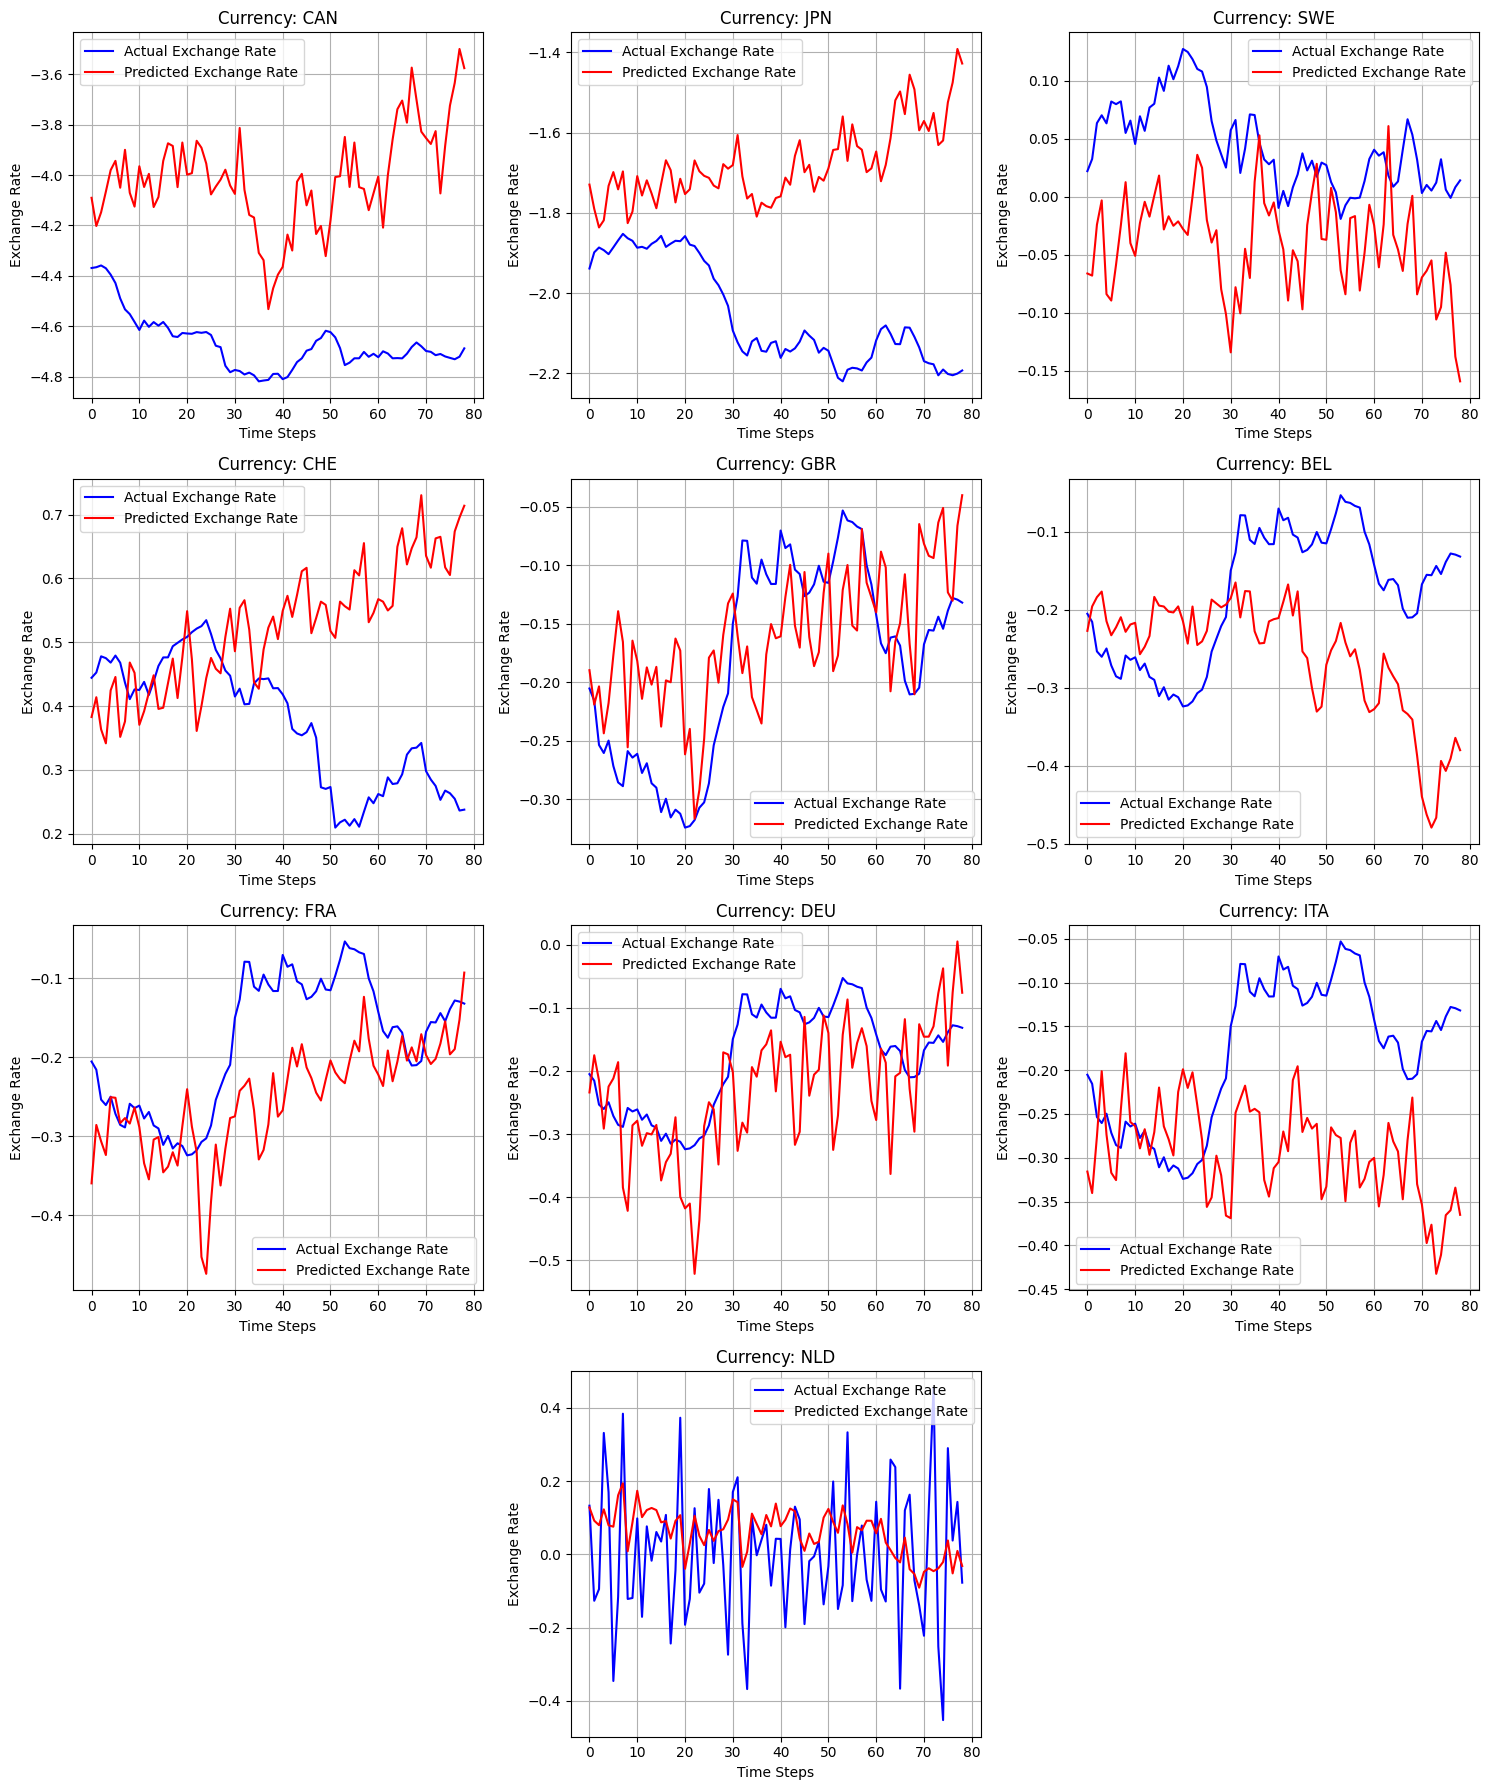

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test and y_predicted for each currency in G10_without_US

# Plot all graphs together
plt.figure(figsize=(15, 18))

# Number of currencies
num_currencies = len(G10_without_US)

# Create subplots
for i in range(num_currencies):
    plt.subplot(4, 3, i + 1 if i != num_currencies - 1 else i + 2)
    plt.plot(y_test[:, i], label='Actual Exchange Rate', color='blue')
    plt.plot(y_predicted[:, i], label='Predicted Exchange Rate', color='red')
    plt.xlabel('Time Steps')
    plt.ylabel('Exchange Rate')
    plt.title(f'Currency: {G10_without_US[i]}')
    plt.legend()
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save plot
plt.savefig('lstm_exchange_rate_predictions.png')

# Show the plot
plt.show()


In [86]:
lstm_log_returns = y_predicted

test_set_size = model_data.shape[0] - training_set_size  - sequence_length
assert lstm_log_returns.shape[0] == test_set_size

lstm_log_returns

array([[-4.09029007e+00, -1.72971165e+00, -6.62657320e-02,
         3.82723182e-01, -1.89578116e-01, -2.27140784e-01,
        -3.59590679e-01, -2.34184176e-01, -3.15758556e-01,
         1.27849504e-01],
       [-4.20209503e+00, -1.79013216e+00, -6.80823624e-02,
         4.13793832e-01, -2.18975082e-01, -1.95760876e-01,
        -2.85552084e-01, -1.75330490e-01, -3.40271562e-01,
         9.17999744e-02],
       [-4.14780998e+00, -1.83646119e+00, -2.41984241e-02,
         3.63402337e-01, -2.03388497e-01, -1.83859974e-01,
        -3.06274831e-01, -2.15213865e-01, -2.75583267e-01,
         7.95585662e-02],
       [-4.06567574e+00, -1.81864870e+00, -3.28175351e-03,
         3.41482610e-01, -2.43534580e-01, -1.76706210e-01,
        -3.23692679e-01, -2.91495562e-01, -2.01208979e-01,
         1.22685596e-01],
       [-3.98056817e+00, -1.73283482e+00, -8.40358287e-02,
         4.24513817e-01, -2.17625156e-01, -2.14707315e-01,
        -2.50418305e-01, -2.24907726e-01, -2.73462653e-01,
         7.

## Cross-validation for LSTM

In [ ]:
import numpy as np
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit

def get_rmse_cv_lstm(X : np.ndarray, seq_len: int, units: int, epochs: int, dropout: float = 0.2):
    tscv = TimeSeriesSplit(max_train_size=None, n_splits=3)
    rmse = []
    for train_index, test_index in tscv.split(X):
        assert list(train_index) == list(range(0, max(train_index) + 1))
        assert min(test_index) == max(train_index) + 1
        assert list(test_index) == list(range(min(test_index), max(test_index) + 1))

        dataset = X[ : max(test_index) + 1]

        train_test_split = (max(train_index) + 1) / (max(test_index) + 1)
        X_train, y_train, X_test, y_test = get_dataset(dataset, seq_len, train_test_split)

        # Define the LSTM model
        model = LSTM_Model(
            units,
            input_shape=(seq_len, dataset.shape[1]),
            output_shape=len(target_columns),
            dropout=dropout,
            silent=True
        )

        # Train the model against diff to nominal rate
        model.fit(X_train, y_train, epochs=epochs)

        # Make predictions on the testing set
        y_predicted = model.predict(X_test)

        # Calculate the Mean Squared Error for evaluation
        mse = mean_squared_error(y_predicted, y_test)

        rmse.append(sqrt(mse))

    return np.mean(rmse)

In [ ]:
X = model_data.to_numpy()
get_rmse_cv_lstm(X, seq_len=12, units=96, epochs=15, dropout=0.2)

0.9552943550394328

In [ ]:
import itertools

ranges = [
    [0.3], # recurrent_dropout
    range(40, 101, 20), # units
    range(10, 26, 5), # epochs
    range(8, 19, 2), # seq_lengths
]
search_space = list(itertools.product(*ranges))
len(search_space)

96

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm


min_rmse = 1000000000
min_dropout = None
min_units = None
min_epochs = None
min_seq_len = None

rmse_values = []
dropout_values = []
units_values = []
epochs_values = []
sequence_length_values = []

for dropout, units, epochs, sequence_length in tqdm(search_space):
    rmse = get_rmse_cv_lstm(X, seq_len=sequence_length, units=units, epochs=epochs, dropout=dropout)

    rmse_values.append(rmse)
    dropout_values.append(dropout)
    units_values.append(units)
    epochs_values.append(epochs)
    sequence_length_values.append(sequence_length)

    print(f"RMSE {rmse = } for {dropout = } {units = } {epochs = } {sequence_length = }.")

    if rmse < min_rmse:
        min_rmse = rmse
        min_dropout = dropout
        min_units = units
        min_epochs = epochs
        min_seq_len = sequence_length

  0%|          | 0/96 [00:00<?, ?it/s]

RMSE rmse = 1.5250562066775606 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 8.
RMSE rmse = 0.9894680962337911 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 10.
RMSE rmse = 1.0653133955043022 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 12.
RMSE rmse = 1.9375397398060823 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 14.
RMSE rmse = 1.1873312553473734 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 16.
RMSE rmse = 1.0549690938989784 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 18.
RMSE rmse = 1.0149694579035902 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 8.
RMSE rmse = 0.8957205160325397 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 10.
RMSE rmse = 1.031172607259468 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 12.
RMSE rmse = 1.1116617333143635 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 14.
RMSE rmse = 1.8284649490506217 for dropout = 0.3 units = 40 epo

In [22]:
import re
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Extract data from the log
log_text = """
WARNING:tensorflow:Layer lstm_21 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_22 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_23 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_24 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.2946762435158374 for dropout = 0.0 units = 40 epochs = 10 sequence_length = 8.
WARNING:tensorflow:Layer lstm_25 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_26 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_27 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.4554679239931518 for dropout = 0.0 units = 40 epochs = 10 sequence_length = 10.
WARNING:tensorflow:Layer lstm_28 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_29 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_30 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1494133467044467 for dropout = 0.0 units = 40 epochs = 10 sequence_length = 12.
WARNING:tensorflow:Layer lstm_31 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_32 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_33 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0097134593491455 for dropout = 0.0 units = 40 epochs = 10 sequence_length = 14.
WARNING:tensorflow:Layer lstm_34 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_35 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_36 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.2305129412001719 for dropout = 0.0 units = 40 epochs = 10 sequence_length = 16.
WARNING:tensorflow:Layer lstm_37 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_38 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_39 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0691778530229248 for dropout = 0.0 units = 40 epochs = 10 sequence_length = 18.
WARNING:tensorflow:Layer lstm_40 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_41 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_42 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9439789365964808 for dropout = 0.0 units = 40 epochs = 15 sequence_length = 8.
WARNING:tensorflow:Layer lstm_43 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_44 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_45 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9958959550911236 for dropout = 0.0 units = 40 epochs = 15 sequence_length = 10.
WARNING:tensorflow:Layer lstm_46 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_47 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_48 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1365173870624148 for dropout = 0.0 units = 40 epochs = 15 sequence_length = 12.
WARNING:tensorflow:Layer lstm_49 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_50 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_51 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8975002361702248 for dropout = 0.0 units = 40 epochs = 15 sequence_length = 14.
WARNING:tensorflow:Layer lstm_52 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_53 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_54 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0198568175155163 for dropout = 0.0 units = 40 epochs = 15 sequence_length = 16.
WARNING:tensorflow:Layer lstm_55 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_56 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_57 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.4556245625943711 for dropout = 0.0 units = 40 epochs = 15 sequence_length = 18.
WARNING:tensorflow:Layer lstm_58 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_59 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_60 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9949182380228884 for dropout = 0.0 units = 40 epochs = 20 sequence_length = 8.
WARNING:tensorflow:Layer lstm_61 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_62 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_63 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7858465487393494 for dropout = 0.0 units = 40 epochs = 20 sequence_length = 10.
WARNING:tensorflow:Layer lstm_64 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_65 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_66 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 2.065350824991762 for dropout = 0.0 units = 40 epochs = 20 sequence_length = 12.
WARNING:tensorflow:Layer lstm_67 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_68 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_69 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9030109684922302 for dropout = 0.0 units = 40 epochs = 20 sequence_length = 14.
WARNING:tensorflow:Layer lstm_70 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_71 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_72 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.381886939242776 for dropout = 0.0 units = 40 epochs = 20 sequence_length = 16.
WARNING:tensorflow:Layer lstm_73 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_74 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_75 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.432946130968565 for dropout = 0.0 units = 40 epochs = 20 sequence_length = 18.
WARNING:tensorflow:Layer lstm_76 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_77 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_78 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8769597859092868 for dropout = 0.0 units = 40 epochs = 25 sequence_length = 8.
WARNING:tensorflow:Layer lstm_79 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_80 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_81 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.895158061663075 for dropout = 0.0 units = 40 epochs = 25 sequence_length = 10.
WARNING:tensorflow:Layer lstm_82 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_83 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_84 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9467305555716424 for dropout = 0.0 units = 40 epochs = 25 sequence_length = 12.
WARNING:tensorflow:Layer lstm_85 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_86 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_87 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.050421175805656 for dropout = 0.0 units = 40 epochs = 25 sequence_length = 14.
WARNING:tensorflow:Layer lstm_88 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_89 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_90 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.6707364147027455 for dropout = 0.0 units = 40 epochs = 25 sequence_length = 16.
WARNING:tensorflow:Layer lstm_91 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_92 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_93 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.953041842279777 for dropout = 0.0 units = 40 epochs = 25 sequence_length = 18.
WARNING:tensorflow:Layer lstm_94 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_95 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_96 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8429628110474902 for dropout = 0.0 units = 60 epochs = 10 sequence_length = 8.
WARNING:tensorflow:Layer lstm_97 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_98 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_99 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9064512392144728 for dropout = 0.0 units = 60 epochs = 10 sequence_length = 10.
WARNING:tensorflow:Layer lstm_100 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_101 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_102 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.825463189761047 for dropout = 0.0 units = 60 epochs = 10 sequence_length = 12.
WARNING:tensorflow:Layer lstm_103 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_104 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_105 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.033214069964929 for dropout = 0.0 units = 60 epochs = 10 sequence_length = 14.
WARNING:tensorflow:Layer lstm_106 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_107 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_108 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1687834575041658 for dropout = 0.0 units = 60 epochs = 10 sequence_length = 16.
WARNING:tensorflow:Layer lstm_109 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_110 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_111 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9638759397477353 for dropout = 0.0 units = 60 epochs = 10 sequence_length = 18.
WARNING:tensorflow:Layer lstm_112 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_113 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_114 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7981417388352664 for dropout = 0.0 units = 60 epochs = 15 sequence_length = 8.
WARNING:tensorflow:Layer lstm_115 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_116 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_117 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.2640079277957736 for dropout = 0.0 units = 60 epochs = 15 sequence_length = 10.
WARNING:tensorflow:Layer lstm_118 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_119 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_120 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9392569830193122 for dropout = 0.0 units = 60 epochs = 15 sequence_length = 12.
WARNING:tensorflow:Layer lstm_121 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_122 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_123 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0784188066714446 for dropout = 0.0 units = 60 epochs = 15 sequence_length = 14.
WARNING:tensorflow:Layer lstm_124 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_125 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_126 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9628560638326439 for dropout = 0.0 units = 60 epochs = 15 sequence_length = 16.
WARNING:tensorflow:Layer lstm_127 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_128 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_129 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9639430762039143 for dropout = 0.0 units = 60 epochs = 15 sequence_length = 18.
WARNING:tensorflow:Layer lstm_130 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_131 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_132 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.818076377826919 for dropout = 0.0 units = 60 epochs = 20 sequence_length = 8.
WARNING:tensorflow:Layer lstm_133 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_134 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_135 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8770839611079428 for dropout = 0.0 units = 60 epochs = 20 sequence_length = 10.
WARNING:tensorflow:Layer lstm_136 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_137 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_138 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8716384184305088 for dropout = 0.0 units = 60 epochs = 20 sequence_length = 12.
WARNING:tensorflow:Layer lstm_139 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_140 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_141 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8170417237047326 for dropout = 0.0 units = 60 epochs = 20 sequence_length = 14.
WARNING:tensorflow:Layer lstm_142 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_143 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_144 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1240429069321671 for dropout = 0.0 units = 60 epochs = 20 sequence_length = 16.
WARNING:tensorflow:Layer lstm_145 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_146 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_147 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.106100700177853 for dropout = 0.0 units = 60 epochs = 20 sequence_length = 18.
WARNING:tensorflow:Layer lstm_148 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_149 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_150 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.999007590660871 for dropout = 0.0 units = 60 epochs = 25 sequence_length = 8.
WARNING:tensorflow:Layer lstm_151 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_152 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_153 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8436992793124437 for dropout = 0.0 units = 60 epochs = 25 sequence_length = 10.
WARNING:tensorflow:Layer lstm_154 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_155 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_156 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9361278465275902 for dropout = 0.0 units = 60 epochs = 25 sequence_length = 12.
WARNING:tensorflow:Layer lstm_157 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_158 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_159 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9711467314075898 for dropout = 0.0 units = 60 epochs = 25 sequence_length = 14.
WARNING:tensorflow:Layer lstm_160 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_161 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_162 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.7200977856330752 for dropout = 0.0 units = 60 epochs = 25 sequence_length = 16.
WARNING:tensorflow:Layer lstm_163 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_164 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_165 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.736571629968949 for dropout = 0.0 units = 60 epochs = 25 sequence_length = 18.
WARNING:tensorflow:Layer lstm_166 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_167 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_168 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8299070937799087 for dropout = 0.0 units = 80 epochs = 10 sequence_length = 8.
WARNING:tensorflow:Layer lstm_169 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_170 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_171 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9358587624627882 for dropout = 0.0 units = 80 epochs = 10 sequence_length = 10.
WARNING:tensorflow:Layer lstm_172 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_173 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_174 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0700586758380999 for dropout = 0.0 units = 80 epochs = 10 sequence_length = 12.
WARNING:tensorflow:Layer lstm_175 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_176 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_177 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8839509532941286 for dropout = 0.0 units = 80 epochs = 10 sequence_length = 14.
WARNING:tensorflow:Layer lstm_178 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_179 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_180 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8648474625215977 for dropout = 0.0 units = 80 epochs = 10 sequence_length = 16.
WARNING:tensorflow:Layer lstm_181 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_182 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_183 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1280593850166978 for dropout = 0.0 units = 80 epochs = 10 sequence_length = 18.
WARNING:tensorflow:Layer lstm_184 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_185 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_186 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7627423902572678 for dropout = 0.0 units = 80 epochs = 15 sequence_length = 8.
WARNING:tensorflow:Layer lstm_187 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_188 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_189 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9851231649086816 for dropout = 0.0 units = 80 epochs = 15 sequence_length = 10.
WARNING:tensorflow:Layer lstm_190 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_191 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_192 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9062009636687467 for dropout = 0.0 units = 80 epochs = 15 sequence_length = 12.
WARNING:tensorflow:Layer lstm_193 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_194 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_195 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0497674437968862 for dropout = 0.0 units = 80 epochs = 15 sequence_length = 14.
WARNING:tensorflow:Layer lstm_196 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_197 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_198 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8353589632013184 for dropout = 0.0 units = 80 epochs = 15 sequence_length = 16.
WARNING:tensorflow:Layer lstm_199 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_200 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_201 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7607555381166495 for dropout = 0.0 units = 80 epochs = 15 sequence_length = 18.
WARNING:tensorflow:Layer lstm_202 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_203 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_204 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8187681217037155 for dropout = 0.0 units = 80 epochs = 20 sequence_length = 8.
WARNING:tensorflow:Layer lstm_205 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_206 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_207 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8159907997221788 for dropout = 0.0 units = 80 epochs = 20 sequence_length = 10.
WARNING:tensorflow:Layer lstm_208 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_209 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_210 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0609132637619407 for dropout = 0.0 units = 80 epochs = 20 sequence_length = 12.
WARNING:tensorflow:Layer lstm_211 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_212 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_213 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7696494922619004 for dropout = 0.0 units = 80 epochs = 20 sequence_length = 14.
WARNING:tensorflow:Layer lstm_214 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_215 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_216 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9261779352690067 for dropout = 0.0 units = 80 epochs = 20 sequence_length = 16.
WARNING:tensorflow:Layer lstm_217 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_218 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_219 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8918426224517125 for dropout = 0.0 units = 80 epochs = 20 sequence_length = 18.
WARNING:tensorflow:Layer lstm_220 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_221 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_222 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.779300755325269 for dropout = 0.0 units = 80 epochs = 25 sequence_length = 8.
WARNING:tensorflow:Layer lstm_223 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_224 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_225 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9629482731906563 for dropout = 0.0 units = 80 epochs = 25 sequence_length = 10.
WARNING:tensorflow:Layer lstm_226 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_227 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_228 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.81090490702989 for dropout = 0.0 units = 80 epochs = 25 sequence_length = 12.
WARNING:tensorflow:Layer lstm_229 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_230 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_231 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.859708196365796 for dropout = 0.0 units = 80 epochs = 25 sequence_length = 14.
WARNING:tensorflow:Layer lstm_232 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_233 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_234 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8407212146430277 for dropout = 0.0 units = 80 epochs = 25 sequence_length = 16.
WARNING:tensorflow:Layer lstm_235 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_236 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_237 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0022692680786134 for dropout = 0.0 units = 80 epochs = 25 sequence_length = 18.
WARNING:tensorflow:Layer lstm_238 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_239 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_240 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9273175887585193 for dropout = 0.0 units = 100 epochs = 10 sequence_length = 8.
WARNING:tensorflow:Layer lstm_241 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_242 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_243 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8725401292863478 for dropout = 0.0 units = 100 epochs = 10 sequence_length = 10.
WARNING:tensorflow:Layer lstm_244 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_245 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_246 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8268503900887626 for dropout = 0.0 units = 100 epochs = 10 sequence_length = 12.
WARNING:tensorflow:Layer lstm_247 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_248 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_249 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1625484318803612 for dropout = 0.0 units = 100 epochs = 10 sequence_length = 14.
WARNING:tensorflow:Layer lstm_250 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_251 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_252 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8288497342929652 for dropout = 0.0 units = 100 epochs = 10 sequence_length = 16.
WARNING:tensorflow:Layer lstm_253 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_254 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_255 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7538560025763279 for dropout = 0.0 units = 100 epochs = 10 sequence_length = 18.
WARNING:tensorflow:Layer lstm_256 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_257 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_258 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7488874019109252 for dropout = 0.0 units = 100 epochs = 15 sequence_length = 8.
WARNING:tensorflow:Layer lstm_259 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_260 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_261 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9124454937236707 for dropout = 0.0 units = 100 epochs = 15 sequence_length = 10.
WARNING:tensorflow:Layer lstm_262 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_263 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_264 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7301147380477744 for dropout = 0.0 units = 100 epochs = 15 sequence_length = 12.
WARNING:tensorflow:Layer lstm_265 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_266 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_267 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7491288003340865 for dropout = 0.0 units = 100 epochs = 15 sequence_length = 14.
WARNING:tensorflow:Layer lstm_268 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_269 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_270 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8433012363714091 for dropout = 0.0 units = 100 epochs = 15 sequence_length = 16.
WARNING:tensorflow:Layer lstm_271 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_272 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_273 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.874941054836483 for dropout = 0.0 units = 100 epochs = 15 sequence_length = 18.
WARNING:tensorflow:Layer lstm_274 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_275 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_276 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8025164084252027 for dropout = 0.0 units = 100 epochs = 20 sequence_length = 8.
WARNING:tensorflow:Layer lstm_277 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_278 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_279 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7386552771730797 for dropout = 0.0 units = 100 epochs = 20 sequence_length = 10.
WARNING:tensorflow:Layer lstm_280 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_281 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_282 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8391439932713777 for dropout = 0.0 units = 100 epochs = 20 sequence_length = 12.
WARNING:tensorflow:Layer lstm_283 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_284 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_285 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8380325212455074 for dropout = 0.0 units = 100 epochs = 20 sequence_length = 14.
WARNING:tensorflow:Layer lstm_286 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_287 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_288 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8520556609999996 for dropout = 0.0 units = 100 epochs = 20 sequence_length = 16.
WARNING:tensorflow:Layer lstm_289 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_290 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_291 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.6663028333787685 for dropout = 0.0 units = 100 epochs = 20 sequence_length = 18.
WARNING:tensorflow:Layer lstm_292 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_293 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_294 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7816383026407664 for dropout = 0.0 units = 100 epochs = 25 sequence_length = 8.
WARNING:tensorflow:Layer lstm_295 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_296 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_297 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8870982657101415 for dropout = 0.0 units = 100 epochs = 25 sequence_length = 10.
WARNING:tensorflow:Layer lstm_298 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_299 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_300 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7989072758456383 for dropout = 0.0 units = 100 epochs = 25 sequence_length = 12.
WARNING:tensorflow:Layer lstm_301 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_302 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_303 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8421731567772649 for dropout = 0.0 units = 100 epochs = 25 sequence_length = 14.
WARNING:tensorflow:Layer lstm_304 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_305 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_306 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9185289716668631 for dropout = 0.0 units = 100 epochs = 25 sequence_length = 16.
WARNING:tensorflow:Layer lstm_307 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_308 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_309 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7994749077690783 for dropout = 0.0 units = 100 epochs = 25 sequence_length = 18.
WARNING:tensorflow:Layer lstm_310 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_311 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_312 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1171823950976847 for dropout = 0.09999999999999999 units = 40 epochs = 10 sequence_length = 8.
WARNING:tensorflow:Layer lstm_313 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_314 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_315 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.060820338480389 for dropout = 0.09999999999999999 units = 40 epochs = 10 sequence_length = 10.
WARNING:tensorflow:Layer lstm_316 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_317 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_318 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0009612528867404 for dropout = 0.09999999999999999 units = 40 epochs = 10 sequence_length = 12.
WARNING:tensorflow:Layer lstm_319 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_320 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_321 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1587776406391355 for dropout = 0.09999999999999999 units = 40 epochs = 10 sequence_length = 14.
WARNING:tensorflow:Layer lstm_322 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_323 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_324 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 3.166079458355434 for dropout = 0.09999999999999999 units = 40 epochs = 10 sequence_length = 16.
WARNING:tensorflow:Layer lstm_325 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_326 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_327 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1718468062012508 for dropout = 0.09999999999999999 units = 40 epochs = 10 sequence_length = 18.
WARNING:tensorflow:Layer lstm_328 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_329 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_330 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.04215676358283 for dropout = 0.09999999999999999 units = 40 epochs = 15 sequence_length = 8.
WARNING:tensorflow:Layer lstm_331 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_332 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_333 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1780140715990226 for dropout = 0.09999999999999999 units = 40 epochs = 15 sequence_length = 10.
WARNING:tensorflow:Layer lstm_334 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_335 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_336 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9522786580604347 for dropout = 0.09999999999999999 units = 40 epochs = 15 sequence_length = 12.
WARNING:tensorflow:Layer lstm_337 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_338 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_339 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.041332091154158 for dropout = 0.09999999999999999 units = 40 epochs = 15 sequence_length = 14.
WARNING:tensorflow:Layer lstm_340 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_341 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_342 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9485267929659401 for dropout = 0.09999999999999999 units = 40 epochs = 15 sequence_length = 16.
WARNING:tensorflow:Layer lstm_343 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_344 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_345 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8878814514470109 for dropout = 0.09999999999999999 units = 40 epochs = 15 sequence_length = 18.
WARNING:tensorflow:Layer lstm_346 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_347 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_348 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8562621866424732 for dropout = 0.09999999999999999 units = 40 epochs = 20 sequence_length = 8.
WARNING:tensorflow:Layer lstm_349 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_350 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_351 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8567894489137141 for dropout = 0.09999999999999999 units = 40 epochs = 20 sequence_length = 10.
WARNING:tensorflow:Layer lstm_352 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_353 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_354 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9798889909482599 for dropout = 0.09999999999999999 units = 40 epochs = 20 sequence_length = 12.
WARNING:tensorflow:Layer lstm_355 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_356 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_357 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0385297815786358 for dropout = 0.09999999999999999 units = 40 epochs = 20 sequence_length = 14.
WARNING:tensorflow:Layer lstm_358 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_359 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_360 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0270948923081222 for dropout = 0.09999999999999999 units = 40 epochs = 20 sequence_length = 16.
WARNING:tensorflow:Layer lstm_361 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_362 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_363 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.019121996347782 for dropout = 0.09999999999999999 units = 40 epochs = 20 sequence_length = 18.
WARNING:tensorflow:Layer lstm_364 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_365 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_366 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0576914306602418 for dropout = 0.09999999999999999 units = 40 epochs = 25 sequence_length = 8.
WARNING:tensorflow:Layer lstm_367 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_368 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_369 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7896155925760696 for dropout = 0.09999999999999999 units = 40 epochs = 25 sequence_length = 10.
WARNING:tensorflow:Layer lstm_370 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_371 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_372 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9112398864096223 for dropout = 0.09999999999999999 units = 40 epochs = 25 sequence_length = 12.
WARNING:tensorflow:Layer lstm_373 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_374 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_375 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9533808777161772 for dropout = 0.09999999999999999 units = 40 epochs = 25 sequence_length = 14.
WARNING:tensorflow:Layer lstm_376 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_377 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_378 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.511051464966388 for dropout = 0.09999999999999999 units = 40 epochs = 25 sequence_length = 16.
WARNING:tensorflow:Layer lstm_4 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7a9a2798b0a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
WARNING:tensorflow:Layer lstm_5 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7a9a27389ea0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
WARNING:tensorflow:Layer lstm_6 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_7 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.2083629025864777 for dropout = 0.2 units = 40 epochs = 10 sequence_length = 8.
WARNING:tensorflow:Layer lstm_8 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_9 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_10 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9923844787969905 for dropout = 0.2 units = 40 epochs = 10 sequence_length = 10.
WARNING:tensorflow:Layer lstm_11 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_12 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_13 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.380710751383095 for dropout = 0.2 units = 40 epochs = 10 sequence_length = 12.
WARNING:tensorflow:Layer lstm_14 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_15 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_16 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0770646602018799 for dropout = 0.2 units = 40 epochs = 10 sequence_length = 14.
WARNING:tensorflow:Layer lstm_17 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_18 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_19 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.440227050071688 for dropout = 0.2 units = 40 epochs = 10 sequence_length = 16.
WARNING:tensorflow:Layer lstm_20 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_21 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_22 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.3235741864814121 for dropout = 0.2 units = 40 epochs = 10 sequence_length = 18.
WARNING:tensorflow:Layer lstm_23 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_24 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_25 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8779291125869891 for dropout = 0.2 units = 40 epochs = 15 sequence_length = 8.
WARNING:tensorflow:Layer lstm_26 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_27 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_28 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9704124401608788 for dropout = 0.2 units = 40 epochs = 15 sequence_length = 10.
WARNING:tensorflow:Layer lstm_29 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_30 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_31 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.2024237546892105 for dropout = 0.2 units = 40 epochs = 15 sequence_length = 12.
WARNING:tensorflow:Layer lstm_32 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_33 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_34 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8750989218794333 for dropout = 0.2 units = 40 epochs = 15 sequence_length = 14.
WARNING:tensorflow:Layer lstm_35 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_36 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_37 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.903282351076775 for dropout = 0.2 units = 40 epochs = 15 sequence_length = 16.
WARNING:tensorflow:Layer lstm_38 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_39 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_40 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1950862965166678 for dropout = 0.2 units = 40 epochs = 15 sequence_length = 18.
WARNING:tensorflow:Layer lstm_41 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_42 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_43 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0876172722831634 for dropout = 0.2 units = 40 epochs = 20 sequence_length = 8.
WARNING:tensorflow:Layer lstm_44 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_45 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_46 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8351789534589429 for dropout = 0.2 units = 40 epochs = 20 sequence_length = 10.
WARNING:tensorflow:Layer lstm_47 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_48 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_49 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8633498246293407 for dropout = 0.2 units = 40 epochs = 20 sequence_length = 12.
WARNING:tensorflow:Layer lstm_50 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_51 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_52 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8228097314159212 for dropout = 0.2 units = 40 epochs = 20 sequence_length = 14.
WARNING:tensorflow:Layer lstm_53 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_54 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_55 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.92538869721109 for dropout = 0.2 units = 40 epochs = 20 sequence_length = 16.
WARNING:tensorflow:Layer lstm_56 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_57 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_58 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8055606821766629 for dropout = 0.2 units = 40 epochs = 20 sequence_length = 18.
WARNING:tensorflow:Layer lstm_59 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_60 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_61 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.075663825040148 for dropout = 0.2 units = 40 epochs = 25 sequence_length = 8.
WARNING:tensorflow:Layer lstm_62 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_63 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_64 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0983549537942963 for dropout = 0.2 units = 40 epochs = 25 sequence_length = 10.
WARNING:tensorflow:Layer lstm_65 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_66 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_67 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8294954627366508 for dropout = 0.2 units = 40 epochs = 25 sequence_length = 12.
WARNING:tensorflow:Layer lstm_68 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_69 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_70 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.1803824038503112 for dropout = 0.2 units = 40 epochs = 25 sequence_length = 14.
WARNING:tensorflow:Layer lstm_71 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_72 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_73 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8594459527607282 for dropout = 0.2 units = 40 epochs = 25 sequence_length = 16.
WARNING:tensorflow:Layer lstm_74 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_75 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_76 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8697616265815177 for dropout = 0.2 units = 40 epochs = 25 sequence_length = 18.
WARNING:tensorflow:Layer lstm_77 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_78 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_79 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9025710661636032 for dropout = 0.2 units = 60 epochs = 10 sequence_length = 8.
WARNING:tensorflow:Layer lstm_80 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_81 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_82 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.926073434579385 for dropout = 0.2 units = 60 epochs = 10 sequence_length = 10.
WARNING:tensorflow:Layer lstm_83 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_84 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_85 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8283080026123962 for dropout = 0.2 units = 60 epochs = 10 sequence_length = 12.
WARNING:tensorflow:Layer lstm_86 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_87 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_88 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8753057435161457 for dropout = 0.2 units = 60 epochs = 10 sequence_length = 14.
WARNING:tensorflow:Layer lstm_89 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_90 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_91 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8502280966433196 for dropout = 0.2 units = 60 epochs = 10 sequence_length = 16.
WARNING:tensorflow:Layer lstm_92 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_93 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_94 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.2907801046459886 for dropout = 0.2 units = 60 epochs = 10 sequence_length = 18.
WARNING:tensorflow:Layer lstm_95 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_96 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_97 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8809892946588901 for dropout = 0.2 units = 60 epochs = 15 sequence_length = 8.
WARNING:tensorflow:Layer lstm_98 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_99 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_100 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7455490421574059 for dropout = 0.2 units = 60 epochs = 15 sequence_length = 10.
WARNING:tensorflow:Layer lstm_101 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_102 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_103 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9130506198706576 for dropout = 0.2 units = 60 epochs = 15 sequence_length = 12.
WARNING:tensorflow:Layer lstm_104 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_105 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_106 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.113537984242668 for dropout = 0.2 units = 60 epochs = 15 sequence_length = 14.
WARNING:tensorflow:Layer lstm_107 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_108 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_109 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7852809345330249 for dropout = 0.2 units = 60 epochs = 15 sequence_length = 16.
WARNING:tensorflow:Layer lstm_110 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_111 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_112 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.385894282890728 for dropout = 0.2 units = 60 epochs = 15 sequence_length = 18.
WARNING:tensorflow:Layer lstm_113 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_114 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_115 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8777523598700404 for dropout = 0.2 units = 60 epochs = 20 sequence_length = 8.
WARNING:tensorflow:Layer lstm_116 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_117 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_118 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9156081927038141 for dropout = 0.2 units = 60 epochs = 20 sequence_length = 10.
WARNING:tensorflow:Layer lstm_119 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_120 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_121 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.958530673396222 for dropout = 0.2 units = 60 epochs = 20 sequence_length = 12.
WARNING:tensorflow:Layer lstm_122 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_123 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_124 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9921517764150042 for dropout = 0.2 units = 60 epochs = 20 sequence_length = 14.
WARNING:tensorflow:Layer lstm_125 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_126 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_127 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.900964250805841 for dropout = 0.2 units = 60 epochs = 20 sequence_length = 16.
WARNING:tensorflow:Layer lstm_128 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_129 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_130 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0121558357862455 for dropout = 0.2 units = 60 epochs = 20 sequence_length = 18.
WARNING:tensorflow:Layer lstm_131 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_132 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_133 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.6942110667546696 for dropout = 0.2 units = 60 epochs = 25 sequence_length = 8.
WARNING:tensorflow:Layer lstm_134 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_135 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_136 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7904743179532004 for dropout = 0.2 units = 60 epochs = 25 sequence_length = 10.
WARNING:tensorflow:Layer lstm_137 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_138 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_139 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8563960220851369 for dropout = 0.2 units = 60 epochs = 25 sequence_length = 12.
WARNING:tensorflow:Layer lstm_140 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_141 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_142 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9717756461643933 for dropout = 0.2 units = 60 epochs = 25 sequence_length = 14.
WARNING:tensorflow:Layer lstm_143 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_144 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_145 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8848213206865762 for dropout = 0.2 units = 60 epochs = 25 sequence_length = 16.
WARNING:tensorflow:Layer lstm_146 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_147 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_148 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9781781404088847 for dropout = 0.2 units = 60 epochs = 25 sequence_length = 18.
WARNING:tensorflow:Layer lstm_149 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_150 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_151 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7324552573005296 for dropout = 0.2 units = 80 epochs = 10 sequence_length = 8.
WARNING:tensorflow:Layer lstm_152 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_153 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_154 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9820618539102525 for dropout = 0.2 units = 80 epochs = 10 sequence_length = 10.
WARNING:tensorflow:Layer lstm_155 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_156 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_157 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8657911764698288 for dropout = 0.2 units = 80 epochs = 10 sequence_length = 12.
WARNING:tensorflow:Layer lstm_158 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_159 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_160 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9704576665727674 for dropout = 0.2 units = 80 epochs = 10 sequence_length = 14.
WARNING:tensorflow:Layer lstm_161 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_162 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_163 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8092090718665125 for dropout = 0.2 units = 80 epochs = 10 sequence_length = 16.
WARNING:tensorflow:Layer lstm_164 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_165 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_166 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9336684887208646 for dropout = 0.2 units = 80 epochs = 10 sequence_length = 18.
WARNING:tensorflow:Layer lstm_167 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_168 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_169 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.757417704066072 for dropout = 0.2 units = 80 epochs = 15 sequence_length = 8.
WARNING:tensorflow:Layer lstm_170 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_171 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_172 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.2146578375413497 for dropout = 0.2 units = 80 epochs = 15 sequence_length = 10.
WARNING:tensorflow:Layer lstm_173 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_174 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_175 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8779602309423641 for dropout = 0.2 units = 80 epochs = 15 sequence_length = 12.
WARNING:tensorflow:Layer lstm_176 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_177 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_178 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8440442085181924 for dropout = 0.2 units = 80 epochs = 15 sequence_length = 14.
WARNING:tensorflow:Layer lstm_179 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_180 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_181 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9139682731389668 for dropout = 0.2 units = 80 epochs = 15 sequence_length = 16.
WARNING:tensorflow:Layer lstm_182 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_183 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_184 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0228527799825735 for dropout = 0.2 units = 80 epochs = 15 sequence_length = 18.
WARNING:tensorflow:Layer lstm_185 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_186 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_187 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.790367483647444 for dropout = 0.2 units = 80 epochs = 20 sequence_length = 8.
WARNING:tensorflow:Layer lstm_188 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_189 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_190 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.02180697259819 for dropout = 0.2 units = 80 epochs = 20 sequence_length = 10.
WARNING:tensorflow:Layer lstm_191 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_192 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_193 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9858527354539431 for dropout = 0.2 units = 80 epochs = 20 sequence_length = 12.
WARNING:tensorflow:Layer lstm_194 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_195 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_196 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.6833107240700093 for dropout = 0.2 units = 80 epochs = 20 sequence_length = 14.
WARNING:tensorflow:Layer lstm_197 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_198 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_199 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8034005158954498 for dropout = 0.2 units = 80 epochs = 20 sequence_length = 16.
WARNING:tensorflow:Layer lstm_200 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_201 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_202 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8908825757694601 for dropout = 0.2 units = 80 epochs = 20 sequence_length = 18.
WARNING:tensorflow:Layer lstm_203 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_204 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_205 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.769934921761593 for dropout = 0.2 units = 80 epochs = 25 sequence_length = 8.
WARNING:tensorflow:Layer lstm_206 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_207 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_208 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.9512558639029568 for dropout = 0.2 units = 80 epochs = 25 sequence_length = 10.
WARNING:tensorflow:Layer lstm_209 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_210 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_211 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7149606781606973 for dropout = 0.2 units = 80 epochs = 25 sequence_length = 12.
WARNING:tensorflow:Layer lstm_212 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_213 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_214 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8555166507868885 for dropout = 0.2 units = 80 epochs = 25 sequence_length = 14.
WARNING:tensorflow:Layer lstm_215 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_216 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_217 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7133572848486457 for dropout = 0.2 units = 80 epochs = 25 sequence_length = 16.
WARNING:tensorflow:Layer lstm_218 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_219 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_220 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8588875465547944 for dropout = 0.2 units = 80 epochs = 25 sequence_length = 18.
WARNING:tensorflow:Layer lstm_221 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_222 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_223 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.698595134721824 for dropout = 0.2 units = 100 epochs = 10 sequence_length = 8.
WARNING:tensorflow:Layer lstm_224 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_225 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_226 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.878310286635272 for dropout = 0.2 units = 100 epochs = 10 sequence_length = 10.
WARNING:tensorflow:Layer lstm_227 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_228 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_229 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8868136505951986 for dropout = 0.2 units = 100 epochs = 10 sequence_length = 12.
WARNING:tensorflow:Layer lstm_230 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_231 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_232 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8260211411663653 for dropout = 0.2 units = 100 epochs = 10 sequence_length = 14.
WARNING:tensorflow:Layer lstm_233 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_234 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_235 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7503508349819329 for dropout = 0.2 units = 100 epochs = 10 sequence_length = 16.
WARNING:tensorflow:Layer lstm_236 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_237 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_238 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7948870460882992 for dropout = 0.2 units = 100 epochs = 10 sequence_length = 18.
WARNING:tensorflow:Layer lstm_239 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_240 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_241 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8209520158872987 for dropout = 0.2 units = 100 epochs = 15 sequence_length = 8.
WARNING:tensorflow:Layer lstm_242 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_243 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_244 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.83263344219545 for dropout = 0.2 units = 100 epochs = 15 sequence_length = 10.
WARNING:tensorflow:Layer lstm_245 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_246 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_247 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8606797659659239 for dropout = 0.2 units = 100 epochs = 15 sequence_length = 12.
WARNING:tensorflow:Layer lstm_248 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_249 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_250 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.8167630911769771 for dropout = 0.2 units = 100 epochs = 15 sequence_length = 14.
WARNING:tensorflow:Layer lstm_251 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_252 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_253 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7151796482644416 for dropout = 0.2 units = 100 epochs = 15 sequence_length = 16.
WARNING:tensorflow:Layer lstm_254 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_255 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_256 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7853873289471226 for dropout = 0.2 units = 100 epochs = 15 sequence_length = 18.
WARNING:tensorflow:Layer lstm_257 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_258 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_259 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7439425511776028 for dropout = 0.2 units = 100 epochs = 20 sequence_length = 8.
WARNING:tensorflow:Layer lstm_260 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_261 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_262 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7045564214704202 for dropout = 0.2 units = 100 epochs = 20 sequence_length = 10.
WARNING:tensorflow:Layer lstm_263 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_264 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_265 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.6954379010920452 for dropout = 0.2 units = 100 epochs = 20 sequence_length = 12.
WARNING:tensorflow:Layer lstm_266 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_267 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_268 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 1.0359678059651265 for dropout = 0.2 units = 100 epochs = 20 sequence_length = 14.
WARNING:tensorflow:Layer lstm_269 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_270 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
WARNING:tensorflow:Layer lstm_271 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
RMSE rmse = 0.7076399996465672 for dropout = 0.2 units = 100 epochs = 20 sequence_length = 16.
WARNING:tensorflow:Layer lstm_272 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
73%
70/96 [17:22<07:43, 17.82s/it]
WARNING:tensorflow:5 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7ecffc84a7a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
WARNING:tensorflow:5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7ecfff708940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
RMSE rmse = 1.5250562066775606 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 8.
RMSE rmse = 0.9894680962337911 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 10.
RMSE rmse = 1.0653133955043022 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 12.
RMSE rmse = 1.9375397398060823 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 14.
RMSE rmse = 1.1873312553473734 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 16.
RMSE rmse = 1.0549690938989784 for dropout = 0.3 units = 40 epochs = 10 sequence_length = 18.
RMSE rmse = 1.0149694579035902 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 8.
RMSE rmse = 0.8957205160325397 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 10.
RMSE rmse = 1.031172607259468 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 12.
RMSE rmse = 1.1116617333143635 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 14.
RMSE rmse = 1.8284649490506217 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 16.
RMSE rmse = 0.8453543141541598 for dropout = 0.3 units = 40 epochs = 15 sequence_length = 18.
RMSE rmse = 0.8774716216733925 for dropout = 0.3 units = 40 epochs = 20 sequence_length = 8.
RMSE rmse = 0.9917523249292822 for dropout = 0.3 units = 40 epochs = 20 sequence_length = 10.
RMSE rmse = 0.8624972589104822 for dropout = 0.3 units = 40 epochs = 20 sequence_length = 12.
RMSE rmse = 0.7990408656878278 for dropout = 0.3 units = 40 epochs = 20 sequence_length = 14.
RMSE rmse = 0.9196393520055116 for dropout = 0.3 units = 40 epochs = 20 sequence_length = 16.
RMSE rmse = 0.9262163451256007 for dropout = 0.3 units = 40 epochs = 20 sequence_length = 18.
RMSE rmse = 0.9785102204327232 for dropout = 0.3 units = 40 epochs = 25 sequence_length = 8.
RMSE rmse = 1.324013603084236 for dropout = 0.3 units = 40 epochs = 25 sequence_length = 10.
RMSE rmse = 0.8775209625248334 for dropout = 0.3 units = 40 epochs = 25 sequence_length = 12.
RMSE rmse = 1.005119009762452 for dropout = 0.3 units = 40 epochs = 25 sequence_length = 14.
RMSE rmse = 0.915777384984895 for dropout = 0.3 units = 40 epochs = 25 sequence_length = 16.
RMSE rmse = 1.0563267654228987 for dropout = 0.3 units = 40 epochs = 25 sequence_length = 18.
RMSE rmse = 0.8572435060818145 for dropout = 0.3 units = 60 epochs = 10 sequence_length = 8.
RMSE rmse = 0.8082874349004762 for dropout = 0.3 units = 60 epochs = 10 sequence_length = 10.
RMSE rmse = 1.047009324793594 for dropout = 0.3 units = 60 epochs = 10 sequence_length = 12.
RMSE rmse = 0.9337623997450702 for dropout = 0.3 units = 60 epochs = 10 sequence_length = 14.
RMSE rmse = 0.8918887798276556 for dropout = 0.3 units = 60 epochs = 10 sequence_length = 16.
RMSE rmse = 0.998752819993396 for dropout = 0.3 units = 60 epochs = 10 sequence_length = 18.
RMSE rmse = 0.9003178240475861 for dropout = 0.3 units = 60 epochs = 15 sequence_length = 8.
RMSE rmse = 0.919565212799012 for dropout = 0.3 units = 60 epochs = 15 sequence_length = 10.
RMSE rmse = 0.8690316191445892 for dropout = 0.3 units = 60 epochs = 15 sequence_length = 12.
RMSE rmse = 0.8947771856762796 for dropout = 0.3 units = 60 epochs = 15 sequence_length = 14.
RMSE rmse = 0.7875880956674156 for dropout = 0.3 units = 60 epochs = 15 sequence_length = 16.
RMSE rmse = 1.0520804930248768 for dropout = 0.3 units = 60 epochs = 15 sequence_length = 18.
RMSE rmse = 0.7356451914249288 for dropout = 0.3 units = 60 epochs = 20 sequence_length = 8.
RMSE rmse = 0.9419121122643314 for dropout = 0.3 units = 60 epochs = 20 sequence_length = 10.
RMSE rmse = 0.8069872597700872 for dropout = 0.3 units = 60 epochs = 20 sequence_length = 12.
RMSE rmse = 0.906434603974727 for dropout = 0.3 units = 60 epochs = 20 sequence_length = 14.
RMSE rmse = 0.8941417463289988 for dropout = 0.3 units = 60 epochs = 20 sequence_length = 16.
RMSE rmse = 0.959217316352522 for dropout = 0.3 units = 60 epochs = 20 sequence_length = 18.
RMSE rmse = 0.9295533017570183 for dropout = 0.3 units = 60 epochs = 25 sequence_length = 8.
RMSE rmse = 0.884939528722756 for dropout = 0.3 units = 60 epochs = 25 sequence_length = 10.
RMSE rmse = 0.8495395296935856 for dropout = 0.3 units = 60 epochs = 25 sequence_length = 12.
RMSE rmse = 0.9791233718226269 for dropout = 0.3 units = 60 epochs = 25 sequence_length = 14.
RMSE rmse = 0.9097961691277416 for dropout = 0.3 units = 60 epochs = 25 sequence_length = 16.
RMSE rmse = 0.9038130820023044 for dropout = 0.3 units = 60 epochs = 25 sequence_length = 18.
RMSE rmse = 0.9192404788829069 for dropout = 0.3 units = 80 epochs = 10 sequence_length = 8.
RMSE rmse = 0.8320956723532383 for dropout = 0.3 units = 80 epochs = 10 sequence_length = 10.
RMSE rmse = 0.8267728551546606 for dropout = 0.3 units = 80 epochs = 10 sequence_length = 12.
RMSE rmse = 1.053760106127725 for dropout = 0.3 units = 80 epochs = 10 sequence_length = 14.
RMSE rmse = 1.0691276332570092 for dropout = 0.3 units = 80 epochs = 10 sequence_length = 16.
RMSE rmse = 0.8656056203219283 for dropout = 0.3 units = 80 epochs = 10 sequence_length = 18.
RMSE rmse = 0.7897587258869422 for dropout = 0.3 units = 80 epochs = 15 sequence_length = 8.
RMSE rmse = 0.9257388452655233 for dropout = 0.3 units = 80 epochs = 15 sequence_length = 10.
RMSE rmse = 0.8325839768823875 for dropout = 0.3 units = 80 epochs = 15 sequence_length = 12.
RMSE rmse = 0.9514583497267197 for dropout = 0.3 units = 80 epochs = 15 sequence_length = 14.
RMSE rmse = 1.0221746516070227 for dropout = 0.3 units = 80 epochs = 15 sequence_length = 16.
RMSE rmse = 0.9226505260878491 for dropout = 0.3 units = 80 epochs = 15 sequence_length = 18.
RMSE rmse = 0.6909168694446234 for dropout = 0.3 units = 80 epochs = 20 sequence_length = 8.
RMSE rmse = 0.8372302678094105 for dropout = 0.3 units = 80 epochs = 20 sequence_length = 10.
RMSE rmse = 0.9233538438546015 for dropout = 0.3 units = 80 epochs = 20 sequence_length = 12.
RMSE rmse = 0.8423963330446949 for dropout = 0.3 units = 80 epochs = 20 sequence_length = 14.
RMSE rmse = 0.9493589325363877 for dropout = 0.3 units = 80 epochs = 20 sequence_length = 16.
RMSE rmse = 0.8097954179529553 for dropout = 0.3 units = 80 epochs = 20 sequence_length = 18.
RMSE rmse = 0.8884244385092709 for dropout = 0.3 units = 80 epochs = 25 sequence_length = 8.
RMSE rmse = 0.9906990740127463 for dropout = 0.3 units = 80 epochs = 25 sequence_length = 10.
RMSE rmse = 0.8925185369865778 for dropout = 0.3 units = 80 epochs = 25 sequence_length = 12.
RMSE rmse = 0.885261257348974 for dropout = 0.3 units = 80 epochs = 25 sequence_length = 14.
RMSE rmse = 0.8305039637450141 for dropout = 0.3 units = 80 epochs = 25 sequence_length = 16.
RMSE rmse = 0.9331011552668894 for dropout = 0.3 units = 80 epochs = 25 sequence_length = 18.
RMSE rmse = 0.698296423528031 for dropout = 0.3 units = 100 epochs = 10 sequence_length = 8.
RMSE rmse = 0.9294043650618135 for dropout = 0.3 units = 100 epochs = 10 sequence_length = 10.
RMSE rmse = 0.8630636301279572 for dropout = 0.3 units = 100 epochs = 10 sequence_length = 12.
RMSE rmse = 0.682760845790655 for dropout = 0.3 units = 100 epochs = 10 sequence_length = 14.
RMSE rmse = 0.8339772811905454 for dropout = 0.3 units = 100 epochs = 10 sequence_length = 16.
RMSE rmse = 1.0090523371919502 for dropout = 0.3 units = 100 epochs = 10 sequence_length = 18.
RMSE rmse = 0.7829406483586246 for dropout = 0.3 units = 100 epochs = 15 sequence_length = 8.
RMSE rmse = 0.6732481410781338 for dropout = 0.3 units = 100 epochs = 15 sequence_length = 10.
RMSE rmse = 0.7540914558031527 for dropout = 0.3 units = 100 epochs = 15 sequence_length = 12.
RMSE rmse = 0.9104231614363457 for dropout = 0.3 units = 100 epochs = 15 sequence_length = 14.
RMSE rmse = 0.8222920814978517 for dropout = 0.3 units = 100 epochs = 15 sequence_length = 16.
RMSE rmse = 0.8062570274868274 for dropout = 0.3 units = 100 epochs = 15 sequence_length = 18.
RMSE rmse = 0.8190205740745293 for dropout = 0.3 units = 100 epochs = 20 sequence_length = 8.
RMSE rmse = 0.7840432237614111 for dropout = 0.3 units = 100 epochs = 20 sequence_length = 10.
RMSE rmse = 0.8216988103040131 for dropout = 0.3 units = 100 epochs = 20 sequence_length = 12.
RMSE rmse = 0.8904181274916172 for dropout = 0.3 units = 100 epochs = 20 sequence_length = 14.
RMSE rmse = 0.9887539147383185 for dropout = 0.3 units = 100 epochs = 20 sequence_length = 16.
RMSE rmse = 0.800350648508268 for dropout = 0.3 units = 100 epochs = 20 sequence_length = 18.
RMSE rmse = 0.744070124649058 for dropout = 0.3 units = 100 epochs = 25 sequence_length = 8.
RMSE rmse = 0.7221922117925818 for dropout = 0.3 units = 100 epochs = 25 sequence_length = 10.
RMSE rmse = 0.7837416501030742 for dropout = 0.3 units = 100 epochs = 25 sequence_length = 12.
RMSE rmse = 0.9270520117740402 for dropout = 0.3 units = 100 epochs = 25 sequence_length = 14.
RMSE rmse = 0.7716861351965658 for dropout = 0.3 units = 100 epochs = 25 sequence_length = 16.
RMSE rmse = 0.615493874763161 for dropout = 0.3 units = 100 epochs = 25 sequence_length = 18.
"""

# Define regular expressions for extracting relevant information
rmse_pattern = re.compile(r"RMSE rmse = (\d+\.\d+) for dropout = (\d+\.\d+) units = (\d+) epochs = (\d+) sequence_length = (\d+)\.")

# Initialize lists to store data
rmse_values = []
dropout_values = []
units_values = []
epochs_values = []
sequence_length_values = []

# Parse the log
for match in rmse_pattern.finditer(log_text):
    rmse, dropout, units, epochs, sequence_length = map(float, match.groups())
    rmse_values.append(rmse)
    dropout_values.append(dropout)
    units_values.append(units)
    epochs_values.append(epochs)
    sequence_length_values.append(sequence_length)

# Create a DataFrame for easy plotting
df = pd.DataFrame({
    'RMSE': rmse_values,
    'Dropout': dropout_values,
    'Units': units_values,
    'Epochs': epochs_values,
    'Sequence Length': sequence_length_values
})

# Plotting
fig1 = px.scatter_3d(df, x='Epochs', y='Sequence Length', z='RMSE', color='Units',
                     labels={'RMSE': 'Root Mean Squared Error'},
                     title='RMSE for different combinations of Epochs, Sequence Length, and Units')
fig2 = px.scatter(df, x='Epochs', y='RMSE', color='Sequence Length',
                  labels={'RMSE': 'Root Mean Squared Error'},
                  title='RMSE for different combinations of Epochs and Sequence Length')
fig3 = px.scatter(df, x='Sequence Length', y='RMSE', color='Units',
                  labels={'RMSE': 'Root Mean Squared Error'},
                  title='RMSE for different combinations of Sequence Length and Units')
fig4 = px.scatter(df, x='Dropout', y='RMSE', color='Units',
                  labels={'RMSE': 'Root Mean Squared Error'},
                  title='RMSE for different combinations of Dropout and Units')

# Show the plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()


## Process results

In [24]:
f"Best seq_len: {min_seq_len}. Best epoch count: {min_epochs}. Best units: {min_units}. Best RMSE: {min_rmse}"

'Best seq_len: 18. Best epoch count: 25. Best units: 100. Best RMSE: 0.615493874763161'

### Old

In [ ]:
import re
import plotly.express as px
import plotly.graph_objects as go

# Extract data from the log
log_text = """
Mean Squared Error mse=1.9541382430378493 for epochs=10 sequence_length=8 units=12.
Mean Squared Error mse=1.463380730203873 for epochs=10 sequence_length=9 units=12.
Mean Squared Error mse=1.9334938584000878 for epochs=10 sequence_length=10 units=12.
Mean Squared Error mse=0.843738062123132 for epochs=10 sequence_length=11 units=12.
Mean Squared Error mse=0.6738693556707068 for epochs=10 sequence_length=12 units=12.
Mean Squared Error mse=2.0942422875938633 for epochs=13 sequence_length=8 units=12.
Mean Squared Error mse=1.0741271473056615 for epochs=13 sequence_length=9 units=12.
Mean Squared Error mse=1.7337441920489318 for epochs=13 sequence_length=10 units=12.
Mean Squared Error mse=0.9227108097951291 for epochs=13 sequence_length=11 units=12.
Mean Squared Error mse=2.074190027691529 for epochs=13 sequence_length=12 units=12.
Mean Squared Error mse=1.3207398535510104 for epochs=16 sequence_length=8 units=12.
Mean Squared Error mse=1.0761165704977502 for epochs=16 sequence_length=9 units=12.
Mean Squared Error mse=1.0137491877992466 for epochs=16 sequence_length=10 units=12.
Mean Squared Error mse=2.0820709735000626 for epochs=16 sequence_length=11 units=12.
Mean Squared Error mse=1.5699769704793447 for epochs=16 sequence_length=12 units=12.
Mean Squared Error mse=1.4422872424240285 for epochs=19 sequence_length=8 units=12.
Mean Squared Error mse=0.824088822890997 for epochs=19 sequence_length=9 units=12.
Mean Squared Error mse=0.5064222661506527 for epochs=19 sequence_length=10 units=12.
Mean Squared Error mse=0.8828602878292104 for epochs=19 sequence_length=11 units=12.
Mean Squared Error mse=0.7314822111610739 for epochs=19 sequence_length=12 units=12.
Mean Squared Error mse=0.8062729229618648 for epochs=22 sequence_length=8 units=12.
Mean Squared Error mse=0.5184301639953376 for epochs=22 sequence_length=9 units=12.
Mean Squared Error mse=0.5708552329400944 for epochs=22 sequence_length=10 units=12.
Mean Squared Error mse=0.46211937639981276 for epochs=22 sequence_length=11 units=12.
Mean Squared Error mse=1.7389367371773958 for epochs=22 sequence_length=12 units=12.
Mean Squared Error mse=0.4472692278316256 for epochs=25 sequence_length=8 units=12.
Mean Squared Error mse=0.4407085707104173 for epochs=25 sequence_length=9 units=12.
Mean Squared Error mse=0.31815645510881985 for epochs=25 sequence_length=10 units=12.
Mean Squared Error mse=1.1559480691134618 for epochs=25 sequence_length=11 units=12.
Mean Squared Error mse=0.9000367889194715 for epochs=25 sequence_length=12 units=12.
Mean Squared Error mse=1.1382609228598004 for epochs=10 sequence_length=8 units=18.
Mean Squared Error mse=0.9340322118940527 for epochs=10 sequence_length=9 units=18.
Mean Squared Error mse=1.3047124878284095 for epochs=10 sequence_length=10 units=18.
Mean Squared Error mse=0.8470249373829171 for epochs=10 sequence_length=11 units=18.
Mean Squared Error mse=0.8985022714911526 for epochs=10 sequence_length=12 units=18.
Mean Squared Error mse=1.3338937275574223 for epochs=13 sequence_length=8 units=18.
Mean Squared Error mse=0.9553158960203973 for epochs=13 sequence_length=9 units=18.
Mean Squared Error mse=2.085106803097086 for epochs=13 sequence_length=10 units=18.
Mean Squared Error mse=0.5649848738203918 for epochs=13 sequence_length=11 units=18.
Mean Squared Error mse=0.41646519424411244 for epochs=13 sequence_length=12 units=18.
Mean Squared Error mse=0.41919910937685617 for epochs=16 sequence_length=8 units=18.
Mean Squared Error mse=0.3396446059990974 for epochs=16 sequence_length=9 units=18.
Mean Squared Error mse=0.4067325903992569 for epochs=16 sequence_length=10 units=18.
Mean Squared Error mse=0.8462197447049595 for epochs=16 sequence_length=11 units=18.
Mean Squared Error mse=0.7488464037312442 for epochs=16 sequence_length=12 units=18.
Mean Squared Error mse=0.23544477510026648 for epochs=19 sequence_length=8 units=18.
Mean Squared Error mse=0.44889810794900586 for epochs=19 sequence_length=9 units=18.
Mean Squared Error mse=0.7239645766241065 for epochs=19 sequence_length=10 units=18.
Mean Squared Error mse=0.1291759310486899 for epochs=19 sequence_length=11 units=18.
Mean Squared Error mse=0.7044054588481368 for epochs=19 sequence_length=12 units=18.
Mean Squared Error mse=0.47495968832070934 for epochs=22 sequence_length=8 units=18.
Mean Squared Error mse=0.6342761685795475 for epochs=22 sequence_length=9 units=18.
Mean Squared Error mse=0.24901713821696353 for epochs=22 sequence_length=10 units=18.
Mean Squared Error mse=0.4768805447340016 for epochs=22 sequence_length=11 units=18.
Mean Squared Error mse=0.4818346947514692 for epochs=22 sequence_length=12 units=18.
Mean Squared Error mse=0.5671605439949929 for epochs=25 sequence_length=8 units=18.
Mean Squared Error mse=0.36613934141328214 for epochs=25 sequence_length=9 units=18.
Mean Squared Error mse=0.33347692651800226 for epochs=25 sequence_length=10 units=18.
Mean Squared Error mse=0.6267741957253661 for epochs=25 sequence_length=11 units=18.
Mean Squared Error mse=0.3641227542733758 for epochs=25 sequence_length=12 units=18.
Mean Squared Error mse=0.7756860319935339 for epochs=10 sequence_length=8 units=24.
Mean Squared Error mse=0.8187177056993882 for epochs=10 sequence_length=9 units=24.
Mean Squared Error mse=0.7639963870801832 for epochs=10 sequence_length=10 units=24.
Mean Squared Error mse=1.9701898117839634 for epochs=10 sequence_length=11 units=24.
Mean Squared Error mse=1.189808658143595 for epochs=10 sequence_length=12 units=24.
Mean Squared Error mse=0.7303777459672351 for epochs=13 sequence_length=8 units=24.
Mean Squared Error mse=0.8181095427853796 for epochs=13 sequence_length=9 units=24.
Mean Squared Error mse=0.6574232045061226 for epochs=13 sequence_length=10 units=24.
Mean Squared Error mse=0.8419877711143237 for epochs=13 sequence_length=11 units=24.
Mean Squared Error mse=0.7417569726772671 for epochs=13 sequence_length=12 units=24.
Mean Squared Error mse=0.7420510577543504 for epochs=16 sequence_length=8 units=24.
Mean Squared Error mse=0.42393132884655094 for epochs=16 sequence_length=9 units=24.
Mean Squared Error mse=0.8646921612290182 for epochs=16 sequence_length=10 units=24.
Mean Squared Error mse=0.2939220173067661 for epochs=16 sequence_length=11 units=24.
Mean Squared Error mse=0.49664245845525573 for epochs=16 sequence_length=12 units=24.
Mean Squared Error mse=0.268531699622048 for epochs=19 sequence_length=8 units=24.
Mean Squared Error mse=0.39885160193718333 for epochs=19 sequence_length=9 units=24.
Mean Squared Error mse=0.3678438418017888 for epochs=19 sequence_length=10 units=24.
Mean Squared Error mse=0.25337735603925543 for epochs=19 sequence_length=11 units=24.
Mean Squared Error mse=0.7263030984255356 for epochs=19 sequence_length=12 units=24.
Mean Squared Error mse=0.2642747608776908 for epochs=22 sequence_length=8 units=24.
Mean Squared Error mse=1.0112102975267026 for epochs=22 sequence_length=9 units=24.
Mean Squared Error mse=0.297306850241454 for epochs=22 sequence_length=10 units=24.
Mean Squared Error mse=0.15196508844149664 for epochs=22 sequence_length=11 units=24.
Mean Squared Error mse=0.27640127434061373 for epochs=22 sequence_length=12 units=24.
Mean Squared Error mse=0.2031840669106723 for epochs=25 sequence_length=8 units=24.
Mean Squared Error mse=0.3456466525555024 for epochs=25 sequence_length=9 units=24.
Mean Squared Error mse=0.229288817557627 for epochs=25 sequence_length=10 units=24.
Mean Squared Error mse=0.28882247561976565 for epochs=25 sequence_length=11 units=24.
Mean Squared Error mse=0.18671574963066 for epochs=25 sequence_length=12 units=24.
Mean Squared Error mse=0.7376691739996134 for epochs=10 sequence_length=8 units=30.
Mean Squared Error mse=1.5513464610904348 for epochs=10 sequence_length=9 units=30.
Mean Squared Error mse=0.31729668803244465 for epochs=10 sequence_length=10 units=30.
Mean Squared Error mse=1.2883681762184276 for epochs=10 sequence_length=11 units=30.
Mean Squared Error mse=0.3408379575143451 for epochs=10 sequence_length=12 units=30.
Mean Squared Error mse=0.8315591805856233 for epochs=13 sequence_length=8 units=30.
Mean Squared Error mse=0.33920119756907197 for epochs=13 sequence_length=9 units=30.
Mean Squared Error mse=1.3308814491983783 for epochs=13 sequence_length=10 units=30.
Mean Squared Error mse=0.7950970142974276 for epochs=13 sequence_length=11 units=30.
Mean Squared Error mse=1.2721400884115417 for epochs=13 sequence_length=12 units=30.
Mean Squared Error mse=0.32162206704972607 for epochs=16 sequence_length=8 units=30.
Mean Squared Error mse=0.25163212755419917 for epochs=16 sequence_length=9 units=30.
Mean Squared Error mse=0.1905101788463494 for epochs=16 sequence_length=10 units=30.
Mean Squared Error mse=0.3394761502472151 for epochs=16 sequence_length=11 units=30.
Mean Squared Error mse=0.2768342242835824 for epochs=16 sequence_length=12 units=30.
Mean Squared Error mse=0.12674471285843478 for epochs=19 sequence_length=8 units=30.
Mean Squared Error mse=0.33202119446586975 for epochs=19 sequence_length=9 units=30.
Mean Squared Error mse=0.48488836777086836 for epochs=19 sequence_length=10 units=30.
Mean Squared Error mse=0.20127522005856235 for epochs=19 sequence_length=11 units=30.
Mean Squared Error mse=0.2629872705999935 for epochs=19 sequence_length=12 units=30.
Mean Squared Error mse=0.5115585239040035 for epochs=22 sequence_length=8 units=30.
Mean Squared Error mse=0.1689431166207481 for epochs=22 sequence_length=9 units=30.
Mean Squared Error mse=0.23372830291954458 for epochs=22 sequence_length=10 units=30.
Mean Squared Error mse=0.09198068742221077 for epochs=22 sequence_length=11 units=30.
Mean Squared Error mse=0.31528202558519824 for epochs=22 sequence_length=12 units=30.
Mean Squared Error mse=0.24175957275348145 for epochs=25 sequence_length=8 units=30.
Mean Squared Error mse=0.26114835814373594 for epochs=25 sequence_length=9 units=30.
Mean Squared Error mse=0.19472843203541063 for epochs=25 sequence_length=10 units=30.
Mean Squared Error mse=0.19566019831140571 for epochs=25 sequence_length=11 units=30.
Mean Squared Error mse=0.2059344308545498 for epochs=25 sequence_length=12 units=30.
Mean Squared Error mse=0.6019412783787037 for epochs=10 sequence_length=8 units=36.
Mean Squared Error mse=0.4040970299864125 for epochs=10 sequence_length=9 units=36.
Mean Squared Error mse=0.8349063619541093 for epochs=10 sequence_length=10 units=36.
Mean Squared Error mse=1.0280836814208274 for epochs=10 sequence_length=11 units=36.
Mean Squared Error mse=0.8965787505001496 for epochs=10 sequence_length=12 units=36.
Mean Squared Error mse=0.5896019307305675 for epochs=13 sequence_length=8 units=36.
Mean Squared Error mse=0.15695133067483685 for epochs=13 sequence_length=9 units=36.
Mean Squared Error mse=0.6268886286822272 for epochs=13 sequence_length=10 units=36.
Mean Squared Error mse=0.22545243525335082 for epochs=13 sequence_length=11 units=36.
Mean Squared Error mse=0.1705523219264866 for epochs=13 sequence_length=12 units=36.
Mean Squared Error mse=0.3588595124958892 for epochs=16 sequence_length=8 units=36.
Mean Squared Error mse=0.2818512852309954 for epochs=16 sequence_length=9 units=36.
Mean Squared Error mse=0.2547804229148513 for epochs=16 sequence_length=10 units=36.
Mean Squared Error mse=0.05206540041579881 for epochs=16 sequence_length=11 units=36.
Mean Squared Error mse=0.7203922260041258 for epochs=16 sequence_length=12 units=36.
Mean Squared Error mse=0.2869575700213977 for epochs=19 sequence_length=8 units=36.
Mean Squared Error mse=0.2820903090324802 for epochs=19 sequence_length=9 units=36.
Mean Squared Error mse=0.2667382345209727 for epochs=19 sequence_length=10 units=36.
Mean Squared Error mse=0.22550522216905086 for epochs=19 sequence_length=11 units=36.
Mean Squared Error mse=0.1595272551218715 for epochs=19 sequence_length=12 units=36.
Mean Squared Error mse=0.26392005304755534 for epochs=22 sequence_length=8 units=36.
Mean Squared Error mse=0.2195111876210948 for epochs=22 sequence_length=9 units=36.
Mean Squared Error mse=0.3871681947364144 for epochs=22 sequence_length=10 units=36.
Mean Squared Error mse=0.20766054165404393 for epochs=22 sequence_length=11 units=36.
Mean Squared Error mse=0.045979270447673595 for epochs=22 sequence_length=12 units=36.
Mean Squared Error mse=0.2638699059213689 for epochs=25 sequence_length=8 units=36.
Mean Squared Error mse=0.16877595176397445 for epochs=25 sequence_length=9 units=36.
Mean Squared Error mse=0.2502978144476493 for epochs=25 sequence_length=10 units=36.
Mean Squared Error mse=0.25685818722173015 for epochs=25 sequence_length=11 units=36.
Mean Squared Error mse=0.12141600719616907 for epochs=25 sequence_length=12 units=36.
Mean Squared Error mse=0.6870793774054186 for epochs=10 sequence_length=8 units=42.
Mean Squared Error mse=0.35599944908908704 for epochs=10 sequence_length=9 units=42.
Mean Squared Error mse=0.8934805742488663 for epochs=10 sequence_length=10 units=42.
Mean Squared Error mse=0.40858400401100753 for epochs=10 sequence_length=11 units=42.
Mean Squared Error mse=1.0643889005817124 for epochs=10 sequence_length=12 units=42.
Mean Squared Error mse=0.3496711023524066 for epochs=13 sequence_length=8 units=42.
Mean Squared Error mse=0.37858741151648034 for epochs=13 sequence_length=9 units=42.
Mean Squared Error mse=0.8594352887084813 for epochs=13 sequence_length=10 units=42.
Mean Squared Error mse=0.32991639746116397 for epochs=13 sequence_length=11 units=42.
Mean Squared Error mse=0.6683119906250725 for epochs=13 sequence_length=12 units=42.
Mean Squared Error mse=0.3235274315728257 for epochs=16 sequence_length=8 units=42.
Mean Squared Error mse=0.14615561911330663 for epochs=16 sequence_length=9 units=42.
Mean Squared Error mse=0.29456847768692374 for epochs=16 sequence_length=10 units=42.
Mean Squared Error mse=0.18878420019451295 for epochs=16 sequence_length=11 units=42.
Mean Squared Error mse=0.15619819311191718 for epochs=16 sequence_length=12 units=42.
Mean Squared Error mse=0.21160552968080976 for epochs=19 sequence_length=8 units=42.
Mean Squared Error mse=0.16980964868249246 for epochs=19 sequence_length=9 units=42.
Mean Squared Error mse=0.3550485137400152 for epochs=19 sequence_length=10 units=42.
Mean Squared Error mse=0.31793258956647985 for epochs=19 sequence_length=11 units=42.
Mean Squared Error mse=0.16335670677684602 for epochs=19 sequence_length=12 units=42.
Mean Squared Error mse=0.2681725099450299 for epochs=22 sequence_length=8 units=42.
Mean Squared Error mse=0.31088827706455535 for epochs=22 sequence_length=9 units=42.
Mean Squared Error mse=0.13340808664872772 for epochs=22 sequence_length=10 units=42.
Mean Squared Error mse=0.17427823082779784 for epochs=22 sequence_length=11 units=42.
Mean Squared Error mse=0.17930880540050292 for epochs=22 sequence_length=12 units=42.
Mean Squared Error mse=0.2668423530991705 for epochs=25 sequence_length=8 units=42.
Mean Squared Error mse=0.15074039849696813 for epochs=25 sequence_length=9 units=42.
Mean Squared Error mse=0.299654142493681 for epochs=25 sequence_length=10 units=42.
Mean Squared Error mse=0.22783091774263645 for epochs=25 sequence_length=11 units=42.
Mean Squared Error mse=0.18502427275138286 for epochs=25 sequence_length=12 units=42.
Mean Squared Error mse=0.4494527818796488 for epochs=10 sequence_length=8 units=48.
Mean Squared Error mse=0.3608315729761142 for epochs=10 sequence_length=9 units=48.
Mean Squared Error mse=0.333967635733713 for epochs=10 sequence_length=10 units=48.
Mean Squared Error mse=0.727450636552877 for epochs=10 sequence_length=11 units=48.
Mean Squared Error mse=0.3344105385144599 for epochs=10 sequence_length=12 units=48.
Mean Squared Error mse=0.3946226058435798 for epochs=13 sequence_length=8 units=48.
Mean Squared Error mse=0.39690046599525963 for epochs=13 sequence_length=9 units=48.
Mean Squared Error mse=0.18752620091614872 for epochs=13 sequence_length=10 units=48.
Mean Squared Error mse=0.32437921954089666 for epochs=13 sequence_length=11 units=48.
Mean Squared Error mse=0.40291337293273327 for epochs=13 sequence_length=12 units=48.
Mean Squared Error mse=0.21628715400881937 for epochs=16 sequence_length=8 units=48.
Mean Squared Error mse=0.1222805143712268 for epochs=16 sequence_length=9 units=48.
Mean Squared Error mse=0.23540288889304498 for epochs=16 sequence_length=10 units=48.
Mean Squared Error mse=0.23783337316906278 for epochs=16 sequence_length=11 units=48.
Mean Squared Error mse=0.16939489188741566 for epochs=16 sequence_length=12 units=48.
Mean Squared Error mse=0.2786836648838228 for epochs=19 sequence_length=8 units=48.
Mean Squared Error mse=0.21023747489684963 for epochs=19 sequence_length=9 units=48.
Mean Squared Error mse=0.2491718743058756 for epochs=19 sequence_length=10 units=48.
Mean Squared Error mse=0.17246907211889187 for epochs=19 sequence_length=11 units=48.
Mean Squared Error mse=0.11174459370433851 for epochs=19 sequence_length=12 units=48.
Mean Squared Error mse=0.24863570904847182 for epochs=22 sequence_length=8 units=48.
Mean Squared Error mse=0.11364265434041834 for epochs=22 sequence_length=9 units=48.
Mean Squared Error mse=0.19396127088025522 for epochs=22 sequence_length=10 units=48.
Mean Squared Error mse=0.16502415587274505 for epochs=22 sequence_length=11 units=48.
Mean Squared Error mse=0.10749782156480747 for epochs=22 sequence_length=12 units=48.
Mean Squared Error mse=0.2213718173089252 for epochs=25 sequence_length=8 units=48.
Mean Squared Error mse=0.184013012435442 for epochs=25 sequence_length=9 units=48.
Mean Squared Error mse=0.25610334672888246 for epochs=25 sequence_length=10 units=48.
Mean Squared Error mse=0.18602889085327118 for epochs=25 sequence_length=11 units=48.
Mean Squared Error mse=0.24039709267258527 for epochs=25 sequence_length=12 units=48.
Mean Squared Error mse=0.5613275570879461 for epochs=10 sequence_length=8 units=54.
Mean Squared Error mse=0.5015363899931774 for epochs=10 sequence_length=9 units=54.
Mean Squared Error mse=0.37205035928642616 for epochs=10 sequence_length=10 units=54.
Mean Squared Error mse=0.4691576220118585 for epochs=10 sequence_length=11 units=54.
Mean Squared Error mse=0.5835905530089212 for epochs=10 sequence_length=12 units=54.
Mean Squared Error mse=0.3158514745817526 for epochs=13 sequence_length=8 units=54.
Mean Squared Error mse=0.22755742417880215 for epochs=13 sequence_length=9 units=54.
Mean Squared Error mse=0.6535409099996607 for epochs=13 sequence_length=10 units=54.
Mean Squared Error mse=0.21518900411107406 for epochs=13 sequence_length=11 units=54.
Mean Squared Error mse=0.2937015122285019 for epochs=13 sequence_length=12 units=54.
Mean Squared Error mse=0.1822033743610791 for epochs=16 sequence_length=8 units=54.
Mean Squared Error mse=0.1321278081593984 for epochs=16 sequence_length=9 units=54.
Mean Squared Error mse=0.12090530160918951 for epochs=16 sequence_length=10 units=54.
Mean Squared Error mse=0.25133767989512773 for epochs=16 sequence_length=11 units=54.
Mean Squared Error mse=0.16990188700418477 for epochs=16 sequence_length=12 units=54.
Mean Squared Error mse=0.1569415653838437 for epochs=19 sequence_length=8 units=54.
Mean Squared Error mse=0.18844961154145368 for epochs=19 sequence_length=9 units=54.
Mean Squared Error mse=0.16849013323107243 for epochs=19 sequence_length=10 units=54.
Mean Squared Error mse=0.18011631893986282 for epochs=19 sequence_length=11 units=54.
Mean Squared Error mse=0.15906700210386993 for epochs=19 sequence_length=12 units=54.
Mean Squared Error mse=0.17812766867700355 for epochs=22 sequence_length=8 units=54.
Mean Squared Error mse=0.1526164996709272 for epochs=22 sequence_length=9 units=54.
Mean Squared Error mse=0.24072239602493256 for epochs=22 sequence_length=10 units=54.
Mean Squared Error mse=0.20113074326179015 for epochs=22 sequence_length=11 units=54.
Mean Squared Error mse=0.10378603034767134 for epochs=22 sequence_length=12 units=54.
Mean Squared Error mse=0.24455064380246302 for epochs=25 sequence_length=8 units=54.
Mean Squared Error mse=0.16866835119750478 for epochs=25 sequence_length=9 units=54.
Mean Squared Error mse=0.16458080325125493 for epochs=25 sequence_length=10 units=54.
Mean Squared Error mse=0.09081847561897304 for epochs=25 sequence_length=11 units=54.
Mean Squared Error mse=0.11392089118502317 for epochs=25 sequence_length=12 units=54.
Mean Squared Error mse=0.46110186023129646 for epochs=10 sequence_length=8 units=60.
Mean Squared Error mse=0.21921008723822952 for epochs=10 sequence_length=9 units=60.
Mean Squared Error mse=0.21656282137944594 for epochs=10 sequence_length=10 units=60.
Mean Squared Error mse=0.35529571919190756 for epochs=10 sequence_length=11 units=60.
Mean Squared Error mse=0.576902895948166 for epochs=10 sequence_length=12 units=60.
Mean Squared Error mse=0.4738074447592008 for epochs=13 sequence_length=8 units=60.
Mean Squared Error mse=0.3236897289513343 for epochs=13 sequence_length=9 units=60.
Mean Squared Error mse=0.18536180780004397 for epochs=13 sequence_length=10 units=60.
Mean Squared Error mse=0.2611061852186272 for epochs=13 sequence_length=11 units=60.
Mean Squared Error mse=0.30431607198420596 for epochs=13 sequence_length=12 units=60.
Mean Squared Error mse=0.24586168982768072 for epochs=16 sequence_length=8 units=60.
Mean Squared Error mse=0.20330506855291214 for epochs=16 sequence_length=9 units=60.
Mean Squared Error mse=0.2203593723780596 for epochs=16 sequence_length=10 units=60.
Mean Squared Error mse=0.10175977155889782 for epochs=16 sequence_length=11 units=60.
Mean Squared Error mse=0.10704030155716027 for epochs=16 sequence_length=12 units=60.
Mean Squared Error mse=0.134628846779761 for epochs=19 sequence_length=8 units=60.
Mean Squared Error mse=0.15475224827392603 for epochs=19 sequence_length=9 units=60.
Mean Squared Error mse=0.1797864779240497 for epochs=19 sequence_length=10 units=60.
Mean Squared Error mse=0.18964068136562068 for epochs=19 sequence_length=11 units=60.
Mean Squared Error mse=0.08295909095072149 for epochs=19 sequence_length=12 units=60.
Mean Squared Error mse=0.17497833288817796 for epochs=22 sequence_length=8 units=60.
Mean Squared Error mse=0.16615576155813316 for epochs=22 sequence_length=9 units=60.
Mean Squared Error mse=0.10290117671771766 for epochs=22 sequence_length=10 units=60.
Mean Squared Error mse=0.20315402553844875 for epochs=22 sequence_length=11 units=60.
Mean Squared Error mse=0.20510187488151868 for epochs=22 sequence_length=12 units=60.
Mean Squared Error mse=0.13210794145007837 for epochs=25 sequence_length=8 units=60.
Mean Squared Error mse=0.20141100187779393 for epochs=25 sequence_length=9 units=60.
Mean Squared Error mse=0.149734896556012 for epochs=25 sequence_length=10 units=60.
Mean Squared Error mse=0.12912668314340905 for epochs=25 sequence_length=11 units=60.
Mean Squared Error mse=0.19980397483350448 for epochs=25 sequence_length=12 units=60.
Mean Squared Error mse=0.420242336277673 for epochs=10 sequence_length=8 units=66.
Mean Squared Error mse=0.2387497417472198 for epochs=10 sequence_length=9 units=66.
Mean Squared Error mse=0.22801146975193803 for epochs=10 sequence_length=10 units=66.
Mean Squared Error mse=0.21102278692344761 for epochs=10 sequence_length=11 units=66.
Mean Squared Error mse=0.425060402798002 for epochs=10 sequence_length=12 units=66.
Mean Squared Error mse=0.18640872357537 for epochs=13 sequence_length=8 units=66.
Mean Squared Error mse=0.19120786228012723 for epochs=13 sequence_length=9 units=66.
Mean Squared Error mse=0.14847576884633895 for epochs=13 sequence_length=10 units=66.
Mean Squared Error mse=0.2885272525224419 for epochs=13 sequence_length=11 units=66.
Mean Squared Error mse=0.076375971064306 for epochs=13 sequence_length=12 units=66.
Mean Squared Error mse=0.2528401677729885 for epochs=16 sequence_length=8 units=66.
Mean Squared Error mse=0.14099247388382974 for epochs=16 sequence_length=9 units=66.
Mean Squared Error mse=0.19639055260158242 for epochs=16 sequence_length=10 units=66.
Mean Squared Error mse=0.2196059695874169 for epochs=16 sequence_length=11 units=66.
Mean Squared Error mse=0.09479377218600671 for epochs=16 sequence_length=12 units=66.
Mean Squared Error mse=0.2208037908218436 for epochs=19 sequence_length=8 units=66.
Mean Squared Error mse=0.16969553842943788 for epochs=19 sequence_length=9 units=66.
Mean Squared Error mse=0.1513953902186695 for epochs=19 sequence_length=10 units=66.
Mean Squared Error mse=0.1993918544649108 for epochs=19 sequence_length=11 units=66.
Mean Squared Error mse=0.1655744175137159 for epochs=19 sequence_length=12 units=66.
Mean Squared Error mse=0.16902422324155195 for epochs=22 sequence_length=8 units=66.
Mean Squared Error mse=0.10958733943217747 for epochs=22 sequence_length=9 units=66.
Mean Squared Error mse=0.21534053269617756 for epochs=22 sequence_length=10 units=66.
Mean Squared Error mse=0.09927511068428356 for epochs=22 sequence_length=11 units=66.
Mean Squared Error mse=0.12895639400426392 for epochs=22 sequence_length=12 units=66.
Mean Squared Error mse=0.11108648305456661 for epochs=25 sequence_length=8 units=66.
Mean Squared Error mse=0.13973492028927606 for epochs=25 sequence_length=9 units=66.
Mean Squared Error mse=0.053139917308339814 for epochs=25 sequence_length=10 units=66.
Mean Squared Error mse=0.07613350760417933 for epochs=25 sequence_length=11 units=66.
Mean Squared Error mse=0.12023995295274578 for epochs=25 sequence_length=12 units=66.
Mean Squared Error mse=0.6695432838672615 for epochs=10 sequence_length=8 units=72.
Mean Squared Error mse=0.2442123310373494 for epochs=10 sequence_length=9 units=72.
Mean Squared Error mse=0.2888272732204278 for epochs=10 sequence_length=10 units=72.
Mean Squared Error mse=0.29062750386223957 for epochs=10 sequence_length=11 units=72.
Mean Squared Error mse=0.2774189142638833 for epochs=10 sequence_length=12 units=72.
Mean Squared Error mse=0.24300235755101512 for epochs=13 sequence_length=8 units=72.
Mean Squared Error mse=0.15041496927863424 for epochs=13 sequence_length=9 units=72.
Mean Squared Error mse=0.17403638001659613 for epochs=13 sequence_length=10 units=72.
Mean Squared Error mse=0.16202951269881397 for epochs=13 sequence_length=11 units=72.
Mean Squared Error mse=0.06769975459967184 for epochs=13 sequence_length=12 units=72.
Mean Squared Error mse=0.22669108016580825 for epochs=16 sequence_length=8 units=72.
Mean Squared Error mse=0.31017133699937466 for epochs=16 sequence_length=9 units=72.
Mean Squared Error mse=0.12468937723541033 for epochs=16 sequence_length=10 units=72.
Mean Squared Error mse=0.24143625317350784 for epochs=16 sequence_length=11 units=72.
Mean Squared Error mse=0.08005106663037781 for epochs=16 sequence_length=12 units=72.
Mean Squared Error mse=0.14823319859530565 for epochs=19 sequence_length=8 units=72.
Mean Squared Error mse=0.13292415382183628 for epochs=19 sequence_length=9 units=72.
Mean Squared Error mse=0.2853090014594405 for epochs=19 sequence_length=10 units=72.
Mean Squared Error mse=0.1227566130089007 for epochs=19 sequence_length=11 units=72.
Mean Squared Error mse=0.10494860487579001 for epochs=19 sequence_length=12 units=72.
Mean Squared Error mse=0.32035247343557527 for epochs=22 sequence_length=8 units=72.
Mean Squared Error mse=0.1499216157866427 for epochs=22 sequence_length=9 units=72.
Mean Squared Error mse=0.2249587464804376 for epochs=22 sequence_length=10 units=72.
Mean Squared Error mse=0.14523198082819727 for epochs=22 sequence_length=11 units=72.
Mean Squared Error mse=0.09010811492674145 for epochs=22 sequence_length=12 units=72.
Mean Squared Error mse=0.21825116123509652 for epochs=25 sequence_length=8 units=72.
Mean Squared Error mse=0.16228669542854107 for epochs=25 sequence_length=9 units=72.
Mean Squared Error mse=0.10206964056148746 for epochs=25 sequence_length=10 units=72.
Mean Squared Error mse=0.17209602487758965 for epochs=25 sequence_length=11 units=72.
Mean Squared Error mse=0.21994662823627498 for epochs=25 sequence_length=12 units=72.
Mean Squared Error mse=0.3643519531415198 for epochs=10 sequence_length=8 units=78.
Mean Squared Error mse=0.37401687000760625 for epochs=10 sequence_length=9 units=78.
Mean Squared Error mse=0.3249011251616904 for epochs=10 sequence_length=10 units=78.
Mean Squared Error mse=0.2375932213132062 for epochs=10 sequence_length=11 units=78.
Mean Squared Error mse=0.1449182442196975 for epochs=10 sequence_length=12 units=78.
Mean Squared Error mse=0.4378855283647581 for epochs=13 sequence_length=8 units=78.
Mean Squared Error mse=0.20477772589719287 for epochs=13 sequence_length=9 units=78.
Mean Squared Error mse=0.21209902437167463 for epochs=13 sequence_length=10 units=78.
Mean Squared Error mse=0.19445210136753815 for epochs=13 sequence_length=11 units=78.
Mean Squared Error mse=0.13287572463452138 for epochs=13 sequence_length=12 units=78.
Mean Squared Error mse=0.15230651173396093 for epochs=16 sequence_length=8 units=78.
Mean Squared Error mse=0.14025174917884872 for epochs=16 sequence_length=9 units=78.
Mean Squared Error mse=0.18090653123141223 for epochs=16 sequence_length=10 units=78.
Mean Squared Error mse=0.2298898163458131 for epochs=16 sequence_length=11 units=78.
Mean Squared Error mse=0.16016930299256738 for epochs=16 sequence_length=12 units=78.
Mean Squared Error mse=0.23417679196298366 for epochs=19 sequence_length=8 units=78.
Mean Squared Error mse=0.09608034917519202 for epochs=19 sequence_length=9 units=78.
Mean Squared Error mse=0.24019357610302255 for epochs=19 sequence_length=10 units=78.
Mean Squared Error mse=0.209375108144043 for epochs=19 sequence_length=11 units=78.
Mean Squared Error mse=0.10021029337463597 for epochs=19 sequence_length=12 units=78.
Mean Squared Error mse=0.11206233218179155 for epochs=22 sequence_length=8 units=78.
Mean Squared Error mse=0.1658026345813591 for epochs=22 sequence_length=9 units=78.
Mean Squared Error mse=0.07952568489723705 for epochs=22 sequence_length=10 units=78.
Mean Squared Error mse=0.18578828011796134 for epochs=22 sequence_length=11 units=78.
Mean Squared Error mse=0.07551772499174979 for epochs=22 sequence_length=12 units=78.
Mean Squared Error mse=0.0924795195432234 for epochs=25 sequence_length=8 units=78.
Mean Squared Error mse=0.2312573231139332 for epochs=25 sequence_length=9 units=78.
Mean Squared Error mse=0.118202295571887 for epochs=25 sequence_length=10 units=78.
Mean Squared Error mse=0.1448362231870564 for epochs=25 sequence_length=11 units=78.
Mean Squared Error mse=0.10096644876608538 for epochs=25 sequence_length=12 units=78.
Mean Squared Error mse=0.25363705262928327 for epochs=10 sequence_length=8 units=84.
Mean Squared Error mse=0.32093450443911764 for epochs=10 sequence_length=9 units=84.
Mean Squared Error mse=0.34965142435115704 for epochs=10 sequence_length=10 units=84.
Mean Squared Error mse=0.232310210581223 for epochs=10 sequence_length=11 units=84.
Mean Squared Error mse=0.20635261432297908 for epochs=10 sequence_length=12 units=84.
Mean Squared Error mse=0.1359771949126011 for epochs=13 sequence_length=8 units=84.
Mean Squared Error mse=0.246269457952606 for epochs=13 sequence_length=9 units=84.
Mean Squared Error mse=0.09516701817675313 for epochs=13 sequence_length=10 units=84.
Mean Squared Error mse=0.1436231760388787 for epochs=13 sequence_length=11 units=84.
Mean Squared Error mse=0.11899620969190783 for epochs=13 sequence_length=12 units=84.
Mean Squared Error mse=0.14351897849968975 for epochs=16 sequence_length=8 units=84.
Mean Squared Error mse=0.154317259651076 for epochs=16 sequence_length=9 units=84.
Mean Squared Error mse=0.1292013832128899 for epochs=16 sequence_length=10 units=84.
Mean Squared Error mse=0.14890851840149885 for epochs=16 sequence_length=11 units=84.
Mean Squared Error mse=0.11239302972463316 for epochs=16 sequence_length=12 units=84.
Mean Squared Error mse=0.13665929312859454 for epochs=19 sequence_length=8 units=84.
Mean Squared Error mse=0.21223627371511217 for epochs=19 sequence_length=9 units=84.
Mean Squared Error mse=0.10987014975912775 for epochs=19 sequence_length=10 units=84.
Mean Squared Error mse=0.1818685538211964 for epochs=19 sequence_length=11 units=84.
Mean Squared Error mse=0.2257266608986747 for epochs=19 sequence_length=12 units=84.
Mean Squared Error mse=0.14872122357391754 for epochs=22 sequence_length=8 units=84.
Mean Squared Error mse=0.1779335491736172 for epochs=22 sequence_length=9 units=84.
Mean Squared Error mse=0.19773250275572907 for epochs=22 sequence_length=10 units=84.
Mean Squared Error mse=0.16821428305450706 for epochs=22 sequence_length=11 units=84.
Mean Squared Error mse=0.06443382082125049 for epochs=22 sequence_length=12 units=84.
Mean Squared Error mse=0.1645515393694804 for epochs=25 sequence_length=8 units=84.
Mean Squared Error mse=0.14280045235502153 for epochs=25 sequence_length=9 units=84.
Mean Squared Error mse=0.16227918189638524 for epochs=25 sequence_length=10 units=84.
Mean Squared Error mse=0.10482063779968243 for epochs=25 sequence_length=11 units=84.
Mean Squared Error mse=0.09091466031639778 for epochs=25 sequence_length=12 units=84.
Mean Squared Error mse=0.19984809587773963 for epochs=10 sequence_length=8 units=90.
Mean Squared Error mse=0.1937685856900695 for epochs=10 sequence_length=9 units=90.
Mean Squared Error mse=0.2565245753117411 for epochs=10 sequence_length=10 units=90.
Mean Squared Error mse=0.130004782516219 for epochs=10 sequence_length=11 units=90.
Mean Squared Error mse=0.21697886103035596 for epochs=10 sequence_length=12 units=90.
Mean Squared Error mse=0.19352044331022983 for epochs=13 sequence_length=8 units=90.
Mean Squared Error mse=0.17370092330325398 for epochs=13 sequence_length=9 units=90.
Mean Squared Error mse=0.14389929427765674 for epochs=13 sequence_length=10 units=90.
Mean Squared Error mse=0.17077781866465544 for epochs=13 sequence_length=11 units=90.
Mean Squared Error mse=0.0469056418711032 for epochs=13 sequence_length=12 units=90.
Mean Squared Error mse=0.20183209982751946 for epochs=16 sequence_length=8 units=90.
Mean Squared Error mse=0.13745322089829504 for epochs=16 sequence_length=9 units=90.
Mean Squared Error mse=0.19449271657944628 for epochs=16 sequence_length=10 units=90.
Mean Squared Error mse=0.0939493563110407 for epochs=16 sequence_length=11 units=90.
Mean Squared Error mse=0.1055375832442464 for epochs=16 sequence_length=12 units=90.
Mean Squared Error mse=0.26150241214916536 for epochs=19 sequence_length=8 units=90.
Mean Squared Error mse=0.18616131009837092 for epochs=19 sequence_length=9 units=90.
Mean Squared Error mse=0.11539879332903016 for epochs=19 sequence_length=10 units=90.
Mean Squared Error mse=0.10447341279199593 for epochs=19 sequence_length=11 units=90.
Mean Squared Error mse=0.12615627680466995 for epochs=19 sequence_length=12 units=90.
Mean Squared Error mse=0.20249235791484713 for epochs=22 sequence_length=8 units=90.
Mean Squared Error mse=0.12030374525847151 for epochs=22 sequence_length=9 units=90.
Mean Squared Error mse=0.2366377055446453 for epochs=22 sequence_length=10 units=90.
Mean Squared Error mse=0.06816293246130711 for epochs=22 sequence_length=11 units=90.
Mean Squared Error mse=0.127613315887582 for epochs=22 sequence_length=12 units=90.
Mean Squared Error mse=0.19913899917744846 for epochs=25 sequence_length=8 units=90.
Mean Squared Error mse=0.12883563697908962 for epochs=25 sequence_length=9 units=90.
Mean Squared Error mse=0.1173081734788362 for epochs=25 sequence_length=10 units=90.
Mean Squared Error mse=0.1020659648171516 for epochs=25 sequence_length=11 units=90.
Mean Squared Error mse=0.18475540904521787 for epochs=25 sequence_length=12 units=90.
Mean Squared Error mse=0.26768947910878593 for epochs=10 sequence_length=8 units=96.
Mean Squared Error mse=0.1679101991561672 for epochs=10 sequence_length=9 units=96.
Mean Squared Error mse=0.1319020438797765 for epochs=10 sequence_length=10 units=96.
Mean Squared Error mse=0.139922000899164 for epochs=10 sequence_length=11 units=96.
Mean Squared Error mse=0.19664326105240093 for epochs=10 sequence_length=12 units=96.
Mean Squared Error mse=0.22116454319252138 for epochs=13 sequence_length=8 units=96.
Mean Squared Error mse=0.15042172585734565 for epochs=13 sequence_length=9 units=96.
Mean Squared Error mse=0.22248320505919375 for epochs=13 sequence_length=10 units=96.
Mean Squared Error mse=0.1962953301450918 for epochs=13 sequence_length=11 units=96.
Mean Squared Error mse=0.06504758975226357 for epochs=13 sequence_length=12 units=96.
Mean Squared Error mse=0.13687538029877158 for epochs=16 sequence_length=8 units=96.
Mean Squared Error mse=0.1141630073536363 for epochs=16 sequence_length=9 units=96.
Mean Squared Error mse=0.13352344772417285 for epochs=16 sequence_length=10 units=96.
Mean Squared Error mse=0.07943120072524887 for epochs=16 sequence_length=11 units=96.
Mean Squared Error mse=0.11806362616670096 for epochs=16 sequence_length=12 units=96.
Mean Squared Error mse=0.13398603236729367 for epochs=19 sequence_length=8 units=96.
Mean Squared Error mse=0.1581951685663762 for epochs=19 sequence_length=9 units=96.
Mean Squared Error mse=0.1358222113786294 for epochs=19 sequence_length=10 units=96.
Mean Squared Error mse=0.06163758850131383 for epochs=19 sequence_length=11 units=96.
Mean Squared Error mse=0.055788243410179315 for epochs=19 sequence_length=12 units=96.
Mean Squared Error mse=0.12815742549710185 for epochs=22 sequence_length=8 units=96.
Mean Squared Error mse=0.07666463822848053 for epochs=22 sequence_length=9 units=96.
Mean Squared Error mse=0.20592176504007287 for epochs=22 sequence_length=10 units=96.
Mean Squared Error mse=0.21260753076426572 for epochs=22 sequence_length=11 units=96.
Mean Squared Error mse=0.16374551967267387 for epochs=22 sequence_length=12 units=96.
Mean Squared Error mse=0.16828935108343593 for epochs=25 sequence_length=8 units=96.
Mean Squared Error mse=0.13013257584845678 for epochs=25 sequence_length=9 units=96.
Mean Squared Error mse=0.1831930230400415 for epochs=25 sequence_length=10 units=96.
Mean Squared Error mse=0.17483662461556834 for epochs=25 sequence_length=11 units=96.
Mean Squared Error mse=0.2054258517960137 for epochs=25 sequence_length=12 units=96.
"""

# Define regular expressions for extracting relevant information
mse_pattern = re.compile(r"Mean Squared Error mse=(\d+\.\d+) for epochs=(\d+) sequence_length=(\d+) units=(\d+)\.")

# Initialize lists to store data
mse_values = []
epochs_values = []
sequence_length_values = []
units_values = []

# Parse the log
for match in mse_pattern.finditer(log_text):
    mse, epochs, sequence_length, units = map(float, match.groups())
    mse_values.append(mse)
    epochs_values.append(epochs)
    sequence_length_values.append(sequence_length)
    units_values.append(units)

# Create a DataFrame for easy plotting
df = pd.DataFrame({
    'MSE': mse_values,
    'Epochs': epochs_values,
    'Sequence Length': sequence_length_values,
    'Units': units_values
})

# Plotting
fig1 = px.scatter_3d(df, x='Epochs', y='Sequence Length', z='MSE', color='Units',
                     labels={'MSE': 'Mean Squared Error'},
                     title='MSE for different combinations of Epochs, Sequence Length, and Units')
fig2 = px.scatter(df, x='Epochs', y='MSE', color='Sequence Length',
                  labels={'MSE': 'Mean Squared Error'},
                  title='MSE for different combinations of Epochs and Sequence Length')
fig3 = px.scatter(df, x='Sequence Length', y='MSE', color='Units',
                  labels={'MSE': 'Mean Squared Error'},
                  title='MSE for different combinations of Sequence Length and Units')

# Show the plots
fig1.show()
fig2.show()
fig3.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
train_size = int(len(model_data) * 0.8)
train_data, test_data = model_data[:train_size], model_data[train_size:]

# Create sequences for training
def create_sequences(dataset, seq_len):
    sequences = []
    for i in range(len(dataset) - seq_len):
        sequences.append(dataset[i:i + seq_len])
    return np.array(sequences)

sequence_length = 48 # Obtained on validation
train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

# Define the LSTM model
model = Sequential()
model.add(LSTM(96, activation='relu', input_shape=(sequence_length, model_data.shape[1])))
model.add(Dense(10))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model against diff to nominal rate
target_columns = [f'Log-nominal USD to {country}' for country in G10_without_US]
target_values = df.loc[sequence_length:train_size - 1, target_columns]
print(target_values.shape, train_sequences.shape)
model.fit(train_sequences, target_values, epochs=15, batch_size=32)

# Make predictions on the testing set
test_predictions = model.predict(test_sequences)
test_expected = df.loc[train_size + sequence_length:, target_columns].to_numpy()

# Calculate the Mean Squared Error for evaluation
mse = mean_squared_error(test_expected, test_predictions)
print(f"Mean Squared Error: {mse}")

(226, 10) (226, 48, 42)
Epoch 1/15
8/8 [==============================] - 3s 47ms/step - loss: 79.9178
Epoch 2/15
8/8 [==============================] - 0s 43ms/step - loss: 5.7943
Epoch 3/15
8/8 [==============================] - 0s 43ms/step - loss: 3.3564
Epoch 4/15
8/8 [==============================] - 0s 45ms/step - loss: 2.4368
Epoch 5/15
8/8 [==============================] - 0s 46ms/step - loss: 1.8460
Epoch 6/15
8/8 [==============================] - 0s 44ms/step - loss: 1.4063
Epoch 7/15
8/8 [==============================] - 0s 44ms/step - loss: 0.9530
Epoch 8/15
8/8 [==============================] - 0s 44ms/step - loss: 0.7083
Epoch 9/15
8/8 [==============================] - 0s 43ms/step - loss: 0.5093
Epoch 10/15
8/8 [==============================] - 0s 39ms/step - loss: 0.4004
Epoch 11/15
8/8 [==============================] - 0s 29ms/step - loss: 0.2708
Epoch 12/15
8/8 [==============================] - 0s 30ms/step - loss: 0.4019
Epoch 13/15
8/8 [===================

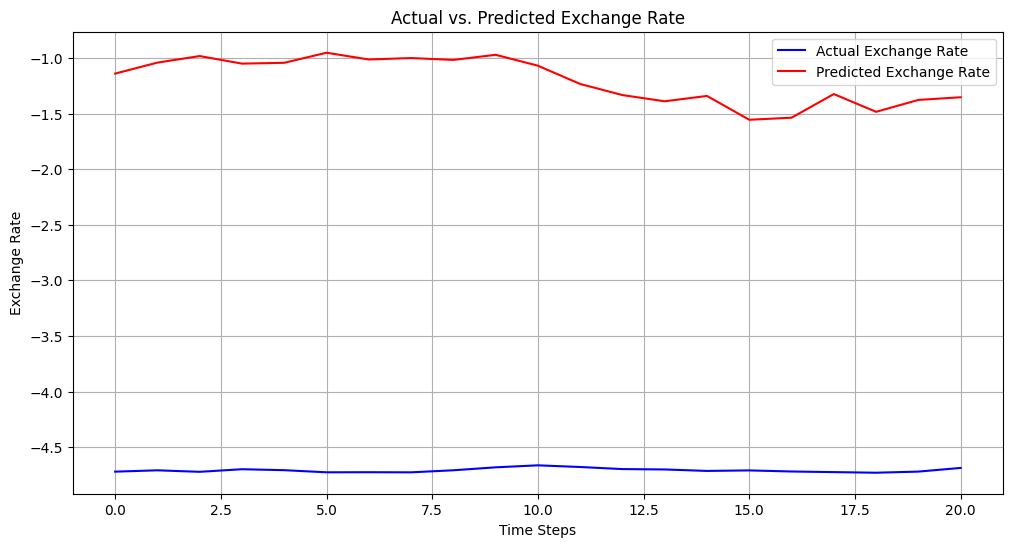

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have test_exchange_rate, test_predictions, and test_data from your model

# Plot the test data and test predictions
plt.figure(figsize=(12, 6))
plt.plot(test_expected[:,1], label='Actual Exchange Rate', color='blue')
plt.plot(test_predictions[:,1], label='Predicted Exchange Rate', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Exchange Rate')
plt.legend()
plt.title('Actual vs. Predicted Exchange Rate')
plt.grid(True)

# Show the plot
plt.show()


# RNN

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

class RNN_Model:
    def __init__(self, units: int, input_shape: tuple, output_shape: int, dropout: float = 0.2, silent: bool = False):
        self.model = Sequential()
        self.model.add(SimpleRNN(units, activation='relu', input_shape=input_shape, dropout=dropout))
        self.model.add(Dense(output_shape))
        self.model.compile(optimizer='adam', loss='mean_squared_error')

        self.silent = silent
        if not self.silent:
            print(f"Created an RNN model with {units} units, mapping {input_shape} to {output_shape}")

        self.verbosity = 0 if self.silent else 'auto'

    def fit(self, X_train, y_train, epochs):
        if not self.silent:
            print(f"Fitting an RNN model through {epochs} epochs, using {X_train.shape[0]} entries of test data")

        self.model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=self.verbosity)

    def predict(self, X_test):
        y_predicted = self.model.predict(X_test, verbose=self.verbosity)
        return y_predicted


In [81]:
sequence_length = 6 # Obtained on validation
X_train, y_train, X_test, y_test = get_dataset(model_data.to_numpy(), sequence_length, split_config={"train_size": training_set_size}) # We train on data before '2012'

# Define the LSTM model
model = RNN_Model(100, input_shape=(sequence_length, model_data.shape[1]), output_shape=len(target_columns), dropout=0.3, silent=False)

# Train the model against diff to nominal rate
model.fit(X_train, y_train, epochs=20)

# Make predictions on the testing set
y_predicted = model.predict(X_test)

# Calculate the Mean Squared Error for evaluation
mse = mean_squared_error(y_predicted, y_test)
print(f"Mean Squared Error: {mse}")

Created an RNN model with 100 units, mapping (6, 42) to 10
Fitting an RNN model through 20 epochs, using 252 entries of test data
Epoch 1/20
8/8 [==============================] - 1s 9ms/step - loss: 15.6124
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 5.0748
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 3.3516
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 2.5544
Epoch 5/20
8/8 [==============================] - 0s 8ms/step - loss: 2.4183
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 2.0966
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 1.7429
Epoch 8/20
8/8 [==============================] - 0s 7ms/step - loss: 1.5719
Epoch 9/20
8/8 [==============================] - 0s 7ms/step - loss: 1.3646
Epoch 10/20
8/8 [==============================] - 0s 7ms/step - loss: 1.3143
Epoch 11/20
8/8 [==============================] - 0s 9ms/step - loss: 1.0588
Epoch 12/20
8/8 [===

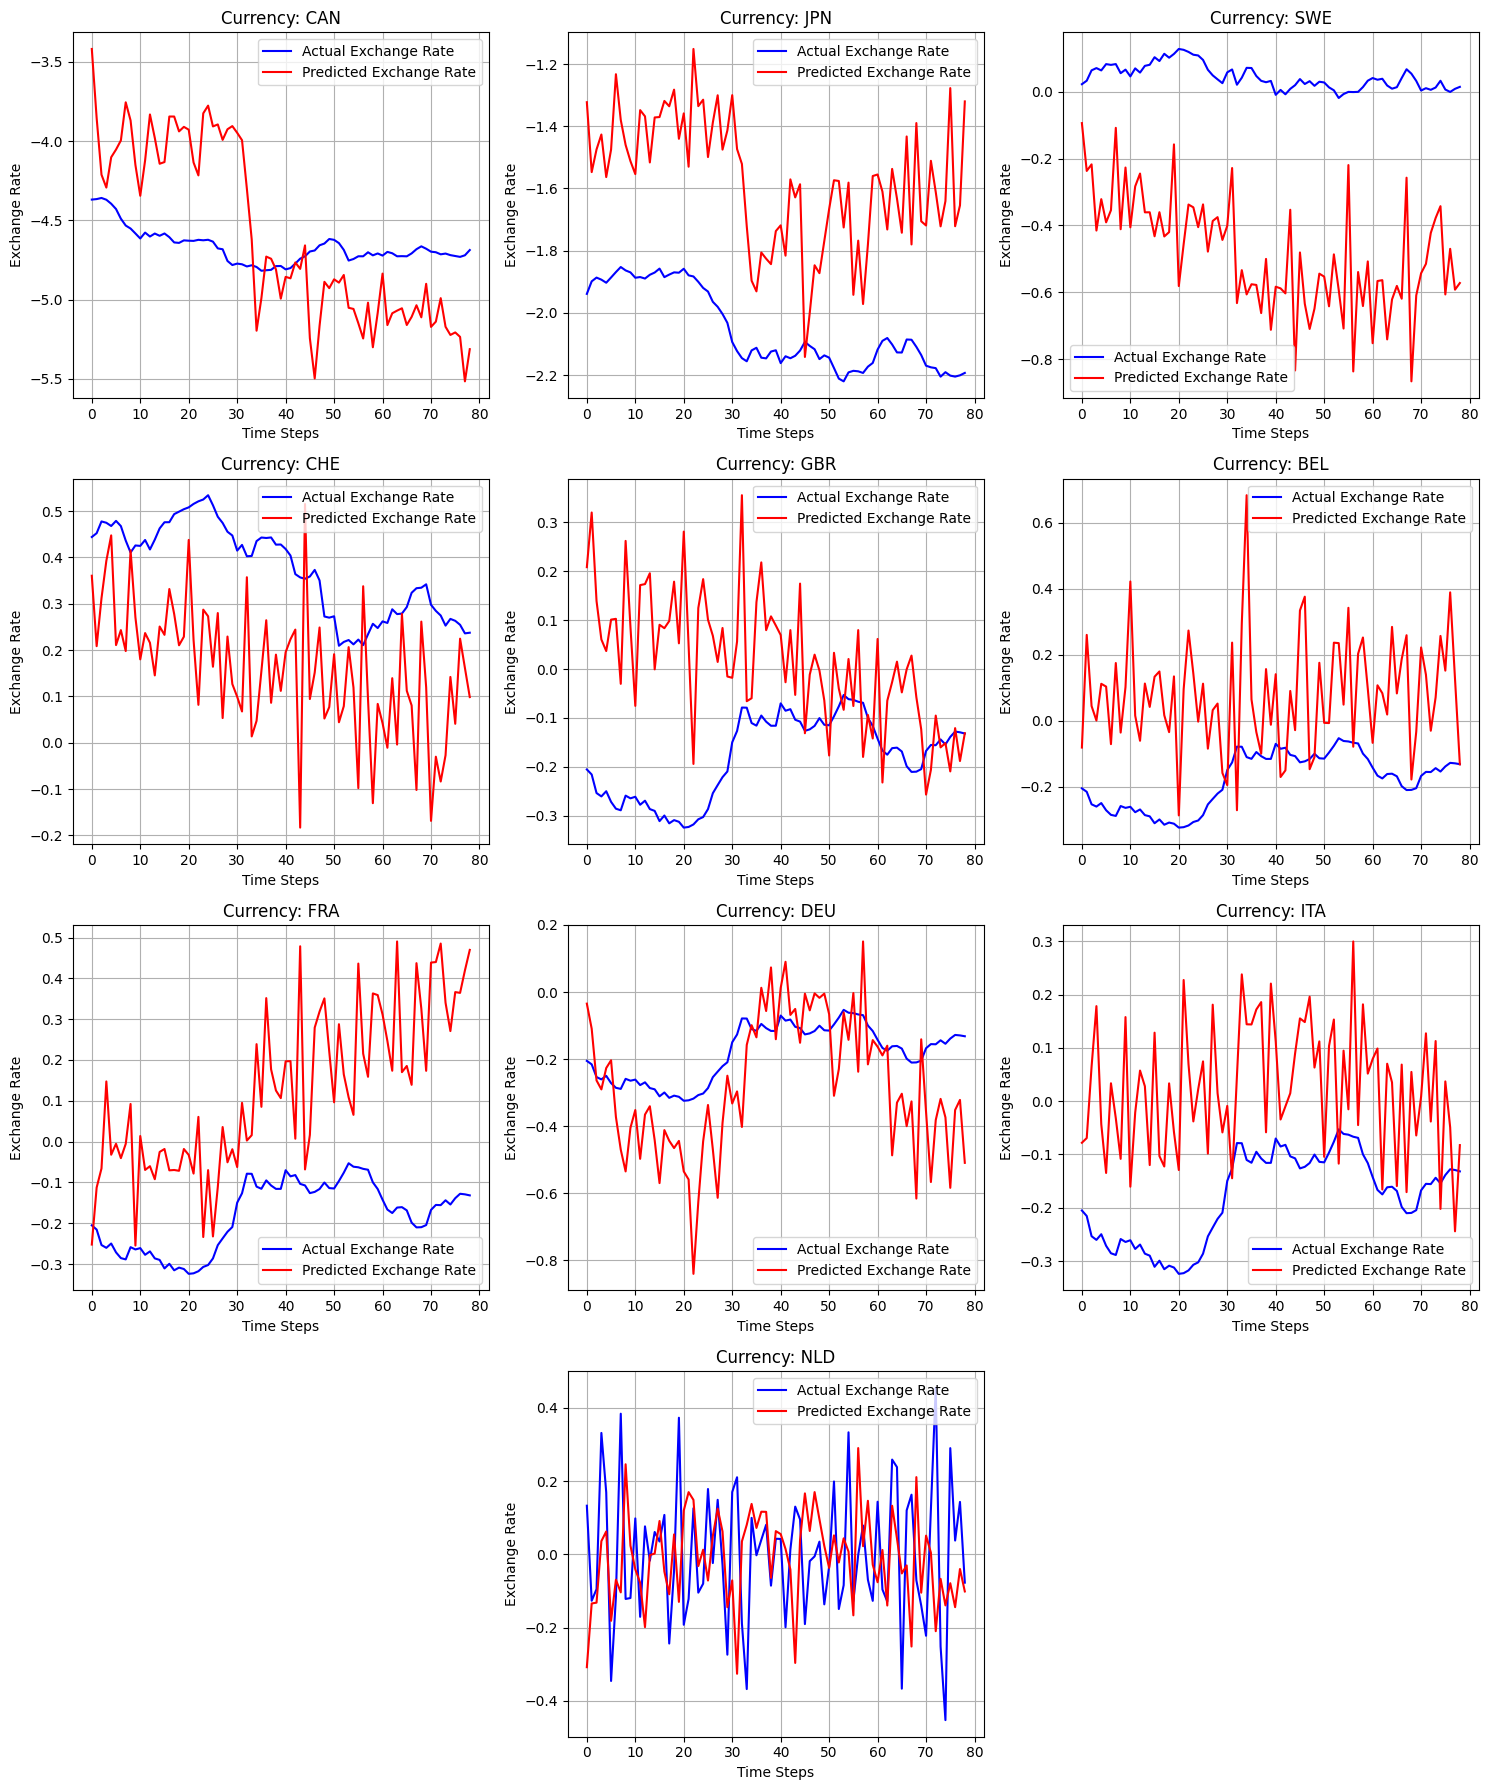

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test and y_predicted for each currency in G10_without_US

# Plot all graphs together
plt.figure(figsize=(15, 18))

# Number of currencies
num_currencies = len(G10_without_US)

# Create subplots
for i in range(num_currencies):
    plt.subplot(4, 3, i + 1 if i != num_currencies - 1 else i + 2)
    plt.plot(y_test[:, i], label='Actual Exchange Rate', color='blue')
    plt.plot(y_predicted[:, i], label='Predicted Exchange Rate', color='red')
    plt.xlabel('Time Steps')
    plt.ylabel('Exchange Rate')
    plt.title(f'Currency: {G10_without_US[i]}')
    plt.legend()
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save plot
plt.savefig('rnn_exchange_rate_predictions.png')

# Show the plot
plt.show()


In [83]:
rnn_log_returns = y_predicted

test_set_size = model_data.shape[0] - training_set_size  - sequence_length
assert rnn_log_returns.shape[0] == test_set_size

rnn_log_returns

array([[-3.41779447e+00, -1.32270551e+00, -9.42423940e-02,
         3.60608220e-01,  2.08286420e-01, -8.14450234e-02,
        -2.52341419e-01, -3.45474966e-02, -7.81449676e-02,
        -3.07844609e-01],
       [-3.85366583e+00, -1.54735017e+00, -2.37151682e-01,
         2.08545610e-01,  3.20023030e-01,  2.60122418e-01,
        -1.12641245e-01, -1.09206483e-01, -6.93243891e-02,
        -1.34035707e-01],
       [-4.21149921e+00, -1.47447002e+00, -2.17498481e-01,
         3.12045574e-01,  1.39064610e-01,  4.43754904e-02,
        -6.59196377e-02, -2.63490617e-01,  6.47536814e-02,
        -1.31820738e-01],
       [-4.29288149e+00, -1.42653751e+00, -4.15183872e-01,
         3.92703205e-01,  6.04352914e-02,  4.44587320e-04,
         1.47408903e-01, -2.90246129e-01,  1.78226113e-01,
         3.59871313e-02],
       [-4.10146666e+00, -1.56334817e+00, -3.21364254e-01,
         4.47740167e-01,  3.68230008e-02,  1.11854926e-01,
        -3.22045088e-02, -2.26554140e-01, -4.32230271e-02,
         6.

### Old

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Assuming model_data is already defined

# Split the data into training and testing sets
train_size = int(len(model_data) * 0.8)
train_data, test_data = model_data[:train_size], model_data[train_size:]

# Create sequences for training
def create_sequences(dataset, seq_len):
    sequences = []
    for i in range(len(dataset) - seq_len):
        sequences.append(dataset[i:i + seq_len])
    return np.array(sequences)

sequence_length = min_seq_len  # Obtained on validation
train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, model_data.shape[1])))
model.add(Dense(10))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model against diff to nominal rate
target_columns = [f'Log-nominal USD to {country}' for country in G10_without_US]
target_values = df.loc[sequence_length:train_size - 1, target_columns]
print(target_values.shape, train_sequences.shape)
model.fit(train_sequences, target_values, epochs=min_epochs, batch_size=32)

# Make predictions on the testing set
test_predictions = model.predict(test_sequences)
test_expected = df.loc[train_size + sequence_length:, target_columns].to_numpy()

# Calculate the Mean Squared Error for evaluation
mse = mean_squared_error(test_expected, test_predictions)
print(f"Mean Squared Error: {mse}")


# Compare with classical econ models

In [105]:
def calculate_returns(model_log_returns):
    dates_of_interest = df['Last Date of Month'][training_set_size:]
    returns = pd.DataFrame({'Last Date of Month': dates_of_interest})

    for i in range(1, len(G10_without_US)):
        country = G10_without_US[i]
        returns_country = pd.DataFrame({'Last Date of Month': dates_of_interest})
        returns_country[f'Returns_{country}'] = model_log_returns[:, i - 1] + (df.loc[training_set_size + sequence_length:, 'USA IR'] - df.loc[training_set_size + sequence_length:, f'{country} IR']) / 100
        returns = pd.merge(returns, returns_country, on='Last Date of Month')

    # Calculate the portfolio returns (1/N portfolio)
    returns['Portfolio_Returns'] = returns.iloc[:, 1:].mean(axis=1)

    return returns

In [110]:
lstm_based_rets = calculate_returns(lstm_log_returns)[sequence_length:].reset_index(drop=True)
lstm_based_rets

,Last Date of Month,Returns_JPN,Returns_SWE,Returns_CHE,Returns_GBR,Returns_BEL,Returns_FRA,Returns_DEU,Returns_ITA,Returns_NLD,Portfolio_Returns
0,2012-07-31,-4.090563,-1.737712,-0.061366,0.377550,-0.191548,-0.229111,-0.361561,-0.236154,-0.317729,-0.760910
1,2012-08-31,-4.202768,-1.799032,-0.063607,0.409346,-0.219699,-0.196485,-0.286276,-0.176054,-0.340996,-0.763952
2,2012-09-30,-4.148683,-1.844461,-0.020732,0.359322,-0.203451,-0.183923,-0.306338,-0.215277,-0.275646,-0.759910
3,2012-10-31,-4.066639,-1.826149,-0.001582,0.338343,-0.243314,-0.176485,-0.323472,-0.291275,-0.200988,-0.754618
4,2012-11-30,-3.981450,-1.741135,-0.080486,0.421569,-0.217245,-0.214327,-0.250038,-0.224528,-0.273083,-0.728969
...,...,...,...,...,...,...,...,...,...,...,...
74,2018-09-30,-3.861872,-1.590111,-0.064865,0.631577,-0.025285,-0.368413,-0.128650,-0.012205,-0.385307,-0.645015
75,2018-10-31,-3.701275,-1.494066,-0.016622,0.620890,-0.096182,-0.379916,-0.169239,-0.164853,-0.338650,-0.637768
76,2018-11-30,-3.609713,-1.442662,-0.042515,0.690410,-0.101429,-0.362335,-0.160705,-0.047233,-0.331152,-0.600815
77,2018-12-31,-3.473729,-1.358210,-0.103257,0.713147,-0.036111,-0.334387,-0.122092,0.034844,-0.304082,-0.553764


In [116]:
lstm_based_rets.to_csv('lstm_rets.csv')

In [111]:
rnn_based_rets = calculate_returns(rnn_log_returns)[sequence_length:].reset_index(drop=True)
rnn_based_rets

,Last Date of Month,Returns_JPN,Returns_SWE,Returns_CHE,Returns_GBR,Returns_BEL,Returns_FRA,Returns_DEU,Returns_ITA,Returns_NLD,Portfolio_Returns
0,2012-07-31,-3.418067,-1.330706,-0.089342,0.355435,0.206316,-0.083415,-0.254311,-0.036517,-0.080115,-0.525636
1,2012-08-31,-3.854339,-1.556250,-0.232677,0.204098,0.319299,0.259398,-0.113365,-0.109930,-0.070048,-0.572646
2,2012-09-30,-4.212372,-1.482470,-0.214032,0.307965,0.139002,0.044312,-0.065983,-0.263554,0.064691,-0.631382
3,2012-10-31,-4.293845,-1.434038,-0.413484,0.389564,0.060656,0.000666,0.147630,-0.290025,0.178447,-0.628270
4,2012-11-30,-4.102348,-1.571648,-0.317814,0.444795,0.037203,0.112235,-0.031825,-0.226174,-0.042843,-0.633158
...,...,...,...,...,...,...,...,...,...,...,...
74,2018-09-30,-5.201279,-1.610710,-0.311964,0.156497,-0.125800,0.282532,0.296441,-0.348003,-0.176634,-0.782102
75,2018-10-31,-5.184051,-1.246688,-0.574374,0.056560,-0.182332,0.178632,0.393223,-0.556765,0.063845,-0.783550
76,2018-11-30,-5.210263,-1.688445,-0.436230,0.241599,-0.092038,0.417776,0.393178,-0.322935,-0.020317,-0.746408
77,2018-12-31,-5.489748,-1.620839,-0.557165,0.179190,-0.157983,0.156375,0.449475,-0.291499,-0.214273,-0.838496


In [115]:
rnn_based_rets.to_csv('rnn_rets.csv')

In [122]:
merged_data

,Last.Date.of.Month,tvecm_rets,var_rets
0,2012-01-31,0.687919,-0.147938
1,2012-02-29,0.569960,-0.132653
2,2012-03-31,0.515647,-0.215012
3,2012-04-30,0.469095,-0.294857
4,2012-05-31,0.438113,-0.315416
...,...,...,...
80,2018-09-30,-2.272377,-3.064877
81,2018-10-31,-2.457995,-3.180764
82,2018-11-30,-2.582344,-3.350943
83,2018-12-31,-2.684894,-3.456336


,Last Date of Month,tvecm_rets,var_rets
0,2012-01-31,0.687919,-0.147938
1,2012-02-29,0.569960,-0.132653
2,2012-03-31,0.515647,-0.215012
3,2012-04-30,0.469095,-0.294857
4,2012-05-31,0.438113,-0.315416
...,...,...,...
80,2018-09-30,-2.272377,-3.064877
81,2018-10-31,-2.457995,-3.180764
82,2018-11-30,-2.582344,-3.350943
83,2018-12-31,-2.684894,-3.456336


In [133]:
import pandas as pd

# Load the data tables
tvecm_rets = pd.read_csv('tvecm_rets.csv', index_col=0)
var_rets = pd.read_csv('var_rets.csv', index_col=0)
lstm_rets = pd.read_csv('lstm_rets.csv', index_col=0)[['Last Date of Month', 'Portfolio_Returns']]
lstm_rets = lstm_rets.rename(columns={'Portfolio_Returns': 'lstm_rets'})
rnn_rets = pd.read_csv('rnn_rets.csv', index_col=0)[['Last Date of Month', 'Portfolio_Returns']]
rnn_rets = rnn_rets.rename(columns={'Portfolio_Returns': 'rnn_rets'})

# Merge the data tables based on "Last Date of Month"
merged_data = pd.merge(tvecm_rets, var_rets, on='Last.Date.of.Month')
merged_data = merged_data.rename(columns={'Last.Date.of.Month': 'Last Date of Month'})
merged_data = pd.merge(merged_data, lstm_rets, on='Last Date of Month')
merged_data = pd.merge(merged_data, rnn_rets, on='Last Date of Month')

# To save the merged data to a new CSV file:
merged_data.to_csv('model_rets.csv', index=False)

merged_data

,Last Date of Month,tvecm_rets,var_rets,lstm_rets,rnn_rets
0,2012-07-31,0.298867,-0.474113,-0.760910,-0.525636
1,2012-08-31,0.246329,-0.499765,-0.763952,-0.572646
2,2012-09-30,0.138794,-0.523285,-0.759910,-0.631382
3,2012-10-31,0.135541,-0.540426,-0.754618,-0.628270
4,2012-11-30,0.200071,-0.565779,-0.728969,-0.633158
...,...,...,...,...,...
74,2018-09-30,-2.272377,-3.064877,-0.645015,-0.782102
75,2018-10-31,-2.457995,-3.180764,-0.637768,-0.783550
76,2018-11-30,-2.582344,-3.350943,-0.600815,-0.746408
77,2018-12-31,-2.684894,-3.456336,-0.553764,-0.838496


In [146]:
import pandas as pd
import numpy as np

# Load the merged data table
merged_data = pd.read_csv('model_rets.csv')

# Convert 'Last Date of Month' to datetime format
merged_data['Last Date of Month'] = pd.to_datetime(merged_data['Last Date of Month'])

# Define the periods
periods = [
    ('2012-07-31', '2015-12-31'),
    ('2013-01-31', '2016-12-31'),
    ('2014-01-31', '2017-12-31'),
    ('2015-01-31', '2018-12-31')
]

# Initialize an empty result table for each period
result_tables = {}

# Calculate and populate the result tables
for start_date, end_date in periods:
    period_data = merged_data[(merged_data['Last Date of Month'] >= start_date) & (merged_data['Last Date of Month'] <= end_date)]

    result_table = pd.DataFrame(index=['Log Returns', 'Real Returns', 'Mean Return', 'Std Dev', 'Skewness', 'Kurtosis', 'Sharpe Ratio', 'Gain/Loss Ratio'])

    for model in ['tvecm_rets', 'var_rets', 'lstm_rets', 'rnn_rets']:
        log_returns = period_data[model].sum()
        real_returns = np.exp(log_returns) - 1
        mean_return = period_data[model].mean()
        std_dev = period_data[model].std()
        skewness = period_data[model].skew()
        kurtosis = period_data[model].kurt()
        sharpe_ratio = mean_return / std_dev
        gain_loss_ratio = period_data[model][period_data[model] > 0].sum() / abs(period_data[model][period_data[model] < 0].sum())

        result_table[model.replace('_rets', " ").upper()] = [log_returns, real_returns, mean_return, std_dev, skewness, kurtosis, sharpe_ratio, gain_loss_ratio]

    result_table.to_csv(f'result_{start_date}_{end_date}.csv', float_format='%.3f')

    # Save or print the result table for the current period
    result_tables[f'{start_date} - {end_date}'] = result_table.T

# Save or print the result tables
for period, table in result_tables.items():
    print(f'\nResults for {period}:\n{table.T}')


Results for 2012-07-31 - 2015-12-31:
                     TVECM        VAR       LSTM        RNN 
Log Returns        4.790745 -28.167775 -31.052789 -28.035691
Real Returns     119.391077  -1.000000  -1.000000  -1.000000
Mean Return        0.114065  -0.670661  -0.739352  -0.667516
Std Dev            0.207273   0.211256   0.019704   0.053898
Skewness          -1.328367  -1.362525   0.896315  -0.172787
Kurtosis           0.985319   1.171597   1.260378   0.550364
Sharpe Ratio       0.550314  -3.174639 -37.523506 -12.384761
Gain/Loss Ratio    3.209018   0.000000   0.000000   0.000000

Results for 2013-01-31 - 2016-12-31:
                   TVECM        VAR       LSTM        RNN 
Log Returns     -5.924008 -43.756928 -34.939511 -33.524568
Real Returns    -0.997326  -1.000000  -1.000000  -1.000000
Mean Return     -0.123417  -0.911603  -0.727906  -0.698429
Std Dev          0.438474   0.431458   0.027233   0.057676
Skewness        -0.754727  -0.765881   0.917165  -0.241257
Kurtosis        -0.94

In [138]:
result_table

,tvecm_rets,var_rets,lstm_rets,rnn_rets
Log Returns,-55.060379,-91.984885,-32.828904,-36.608794
Real Returns,-1.000000,-1.000000,-1.000000,-1.000000
Mean Return,-1.147091,-1.916352,-0.683936,-0.762683
Std Dev,0.800286,0.786767,0.047980,0.041175
Skewness,-0.293596,-0.332495,0.337951,0.850203
Kurtosis,-1.018694,-1.002226,-0.115675,1.190629
Sharpe Ratio,-1.433351,-2.435730,-14.254469,-18.523171
Gain/Loss Ratio,0.002139,0.000000,0.000000,0.000000


# Coint

In [ ]:
# Load your DataFrame containing the data
data = pd.read_csv('G10_rates.csv')

# Prepare the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

ValueError: ignored

In [ ]:
data.columns

Index(['Last Date of Month', 'CAN Rate to USD', 'JPN Rate to USD',
       'SWE Rate to USD', 'CHE Rate to USD', 'GBR Rate to USD',
       'BEL Rate to USD', 'FRA Rate to USD', 'DEU Rate to USD',
       'ITA Rate to USD', 'NLD Rate to USD', 'USA IR', 'GBR IR', 'BEL IR',
       'JPN IR', 'CAN IR', 'DEU IR', 'NLD IR', 'CHE IR', 'SWE IR', 'FRA IR',
       'ITA IR', 'USA INFL', 'CAN INFL', 'JPN INFL', 'SWE INFL', 'CHE INFL',
       'GBR INFL', 'BEL INFL', 'FRA INFL', 'DEU INFL', 'ITA INFL', 'NLD INFL'],
      dtype='object')

In [ ]:
columns_of_interest = [f'{country} Rate to USD' for country in G10_without_US] + [f'{country} IR' for country in G10] + [f'{country} INFL' for country in G10]
doi = data[columns_of_interest]
doi

,CAN Rate to USD,JPN Rate to USD,SWE Rate to USD,CHE Rate to USD,GBR Rate to USD,BEL Rate to USD,FRA Rate to USD,DEU Rate to USD,ITA Rate to USD,NLD Rate to USD,...,CAN INFL,JPN INFL,SWE INFL,CHE INFL,GBR INFL,BEL INFL,FRA INFL,DEU INFL,ITA INFL,NLD INFL
0,1.1747,154.0441,6.0560,1.4198,0.596161,34.3200,5.5989,1.6630,1221.9300,1.8704,...,0.516129,0.5,0.570148,0.486237,1.1,0.034799,0.149054,0.208333,0.307220,0.096899
1,1.1730,153.6957,6.0896,1.4250,0.584693,34.6000,5.6613,1.6832,1235.6000,1.8946,...,0.385109,-0.4,-0.062991,0.139431,0.3,0.057978,-0.014883,0.103950,0.459418,-0.096805
2,1.1570,149.0395,5.9470,1.3924,0.552547,33.7200,5.4924,1.6375,1199.6500,1.8452,...,0.383632,-0.2,0.950303,0.049158,0.0,0.359254,0.029771,0.000000,0.304878,0.387597
3,1.1448,147.4609,5.7754,1.3076,0.525956,32.2800,5.2680,1.5702,1157.0700,1.7692,...,0.127388,0.4,0.686807,1.069048,0.9,0.577367,0.654762,0.311526,0.683891,0.289575
4,1.1583,138.4405,5.7663,1.3069,0.532085,32.2800,5.2575,1.5701,1172.8700,1.7699,...,0.254453,0.8,1.140050,0.475149,0.9,0.907003,0.709639,0.310559,0.528302,0.866218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1.3034,112.0974,8.9395,0.9683,0.765345,1.1667,1.1667,1.1667,1.1667,1.1667,...,-0.372578,0.1,0.458089,0.059539,0.1,0.000000,-0.211987,0.191388,-0.484966,-0.431034
341,1.3004,112.7218,9.0391,0.9940,0.768521,1.1488,1.1488,1.1488,1.1488,1.1488,...,0.299177,0.3,-0.126835,0.176729,0.1,0.678565,0.106219,0.191022,0.000000,0.355940
342,1.3205,113.3380,9.0676,1.0011,0.775194,1.1364,1.1364,1.1364,1.1364,1.1364,...,-0.447427,-0.3,-0.096759,-0.255088,0.2,0.156957,-0.212212,-0.667302,-0.194932,-0.239647
343,1.3436,112.1994,9.0303,0.9919,0.789640,1.1380,1.1380,1.1380,1.1380,1.1380,...,-0.074906,-0.3,0.444915,-0.256731,0.1,-0.239676,0.019333,0.000000,-0.097656,-0.096089


In [ ]:
# Prepare the data
scaler = MinMaxScaler()
doi = scaler.fit_transform(doi)
doi

array([[0.34047176, 1.        , 0.14161457, ..., 0.44643682, 0.58126754,
        0.50524732],
       [0.33783364, 0.99549877, 0.14770318, ..., 0.40883337, 0.69294336,
        0.42040862],
       [0.31300435, 0.935342  , 0.12186283, ..., 0.37138594, 0.57954939,
        0.63256699],
       ...,
       [0.56672874, 0.47408887, 0.68734257, ..., 0.13099412, 0.21281306,
        0.35784682],
       [0.60257604, 0.45937848, 0.68058349, ..., 0.37138594, 0.28418916,
        0.42072232],
       [0.60366232, 0.41222928, 0.66800761, ..., 0.09480683, 0.42757006,
        0.49650789]])

In [ ]:
!pip install wikipedia-api


In [ ]:
import pandas as pd
tickers = pd.read_html(
    "https://en.wikipedia.org/wiki/EURO_STOXX_50#Composition"
)


In [ ]:
tickers[4]

,Ticker,Main listing,Name,Corporate form,Registered office,Industry,Founded
0,ADS.DE,FWB: ADS,Adidas,Aktiengesellschaft,Germany,Sportwear,1924
1,ADYEN.AS,Euronext: ADYEN,Adyen,Naamloze vennootschap,Netherlands,Software—Infrastructure,2006
2,AD.AS,Euronext: AD,Ahold Delhaize,Naamloze vennootschap,Netherlands,Retail,2016 (1867)
3,AI.PA,Euronext Paris: AI,Air Liquide,Société Anonyme,France,Chemistry,1902
4,AIR.PA,Euronext: AIR,Airbus,Societas Europaea,France,Aerospace,1970
5,ALV.DE,FWB: ALV,Allianz,Societas Europaea,Germany,Insurance,1890
6,ABI.BR,Euronext: ABI,Anheuser-Busch InBev,Société Anonyme/ Naamloze vennootschap,Belgium,Food and beverage,2008 (1366/1888/1852/1895)
7,ASML.AS,Euronext: ASML,ASML Holding,Naamloze vennootschap,Netherlands,Technology,1984
8,CS.PA,Euronext: CS,AXA,Société Anonyme,France,Insurance,1816
9,BAS.DE,FWB: BAS,BASF,Societas Europaea,Germany,Chemistry,1865


In [ ]:
!pip3 install yfinance

In [ ]:
spx_components = pd.read_html(
    "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
)[0][["Security", "Symbol"]]
spx_components.rename(columns={"Security": "Company"}, inplace=True)
tickers = spx_components["Symbol"]
tickers

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [ ]:
import datetime as dt

def get_dates_range(year):
    if year < dt.datetime.today().year:
        start = dt.datetime(year, 1, 1)
        end = dt.datetime(year, 12, 31)
    else:
        start = dt.datetime(year, 1, 1)
        end = dt.datetime(
            dt.datetime.today().year,
            dt.datetime.today().month,
            dt.datetime.today().day,
        )

    return start, end

In [ ]:
start, end = get_dates_range(1999)

In [ ]:
import yfinance as yf

df = yf.download(tickers = tickers.to_list(), start=start, end=end, interval='1d')
df = yf.download(tickers = tickers.to_list(), start=start, end=end, interval='1d')
df

[*******               15%%                      ]  77 of 503 completed

ERROR:yfinance:Failed to get ticker 'CVX' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/CVX?range=1d&interval=1d (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x787b4b86ac20>, 'Connection to query2.finance.yahoo.com timed out. (connect timeout=10)'))


[**********************95%%********************  ]  478 of 503 completed

ERROR:yfinance:Failed to get ticker 'MKTX' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/MKTX?range=1d&interval=1d (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x787a77cfdae0>, 'Connection to query2.finance.yahoo.com timed out. (connect timeout=10)'))


[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
146 Failed downloads:


ERROR:yfinance:['OTIS', 'PODD', 'CMG', 'CZR', 'BX', 'FANG', 'GEHC', 'TEL', 'LDOS', 'ULTA', 'PAYC', 'DXCM', 'CNC', 'VRSK', 'HII', 'CBOE', 'MA', 'ALGN', 'PANW', 'KDP', 'GRMN', 'CHTR', 'PARA', 'ELV', 'AMCR', 'EXR', 'DAL', 'CFG', 'FSLR', 'EQIX', 'ALLE', 'NCLH', 'DG', 'CME', 'QRVO', 'MSCI', 'KMI', 'BR', 'ABBV', 'BG', 'CE', 'DFS', 'ETSY', 'CDW', 'AVGO', 'AMP', 'WYNN', 'HLT', 'INVH', 'UAL', 'VLTO', 'KHC', 'GOOGL', 'ZTS', 'FTV', 'AWK', 'ANET', 'TRGP', 'CRM', 'MDLZ', 'CRL', 'LKQ', 'SEDG', 'NFLX', 'GNRC', 'CBRE', 'FOX', 'XYL', 'GPN', 'MRNA', 'NWS', 'NDAQ', 'FIS', 'HWM', 'APTV', 'DLR', 'CTVA', 'CARR', 'KVUE', 'NOW', 'DPZ', 'META', 'HCA', 'CF', 'LULU', 'TDG', 'LVS', 'ENPH', 'FLT', 'ZBH', 'AIZ', 'V', 'NXPI', 'MPWR', 'TSLA', 'WBD', 'ACN', 'FOXA', 'CEG', 'GM', 'TMUS', 'NRG', 'EW', 'WTW', 'MET', 'PFG', 'PM', 'NWSA', 'WRK', 'AAL', 'PKG', 'EXPE', 'ILMN', 'EPAM', 'PYPL', 'MOH', 'IR', 'TPR', 'SYF', 'DOW', 'GOOG', 'LYB', 'ABNB', 'KEYS', 'ISRG', 'LYV', 'PRU', 'FTNT', 'MPC', 'VICI', 'PSX', 'STX', 'ICE', 'CDA

Adj Close                                                   \
                    A AAL      AAPL ABBV ABNB        ABT      ACGL ACN   
Date                                                                     
1999-01-04        NaN NaN  0.312615  NaN  NaN  12.463481  2.484375 NaN   
1999-01-05        NaN NaN  0.328246  NaN  NaN  12.479457  2.388889 NaN   
1999-01-06        NaN NaN  0.316404  NaN  NaN  12.383579  2.388889 NaN   
1999-01-07        NaN NaN  0.341035  NaN  NaN  12.223791  2.375000 NaN   
1999-01-08        NaN NaN  0.341035  NaN  NaN  12.175859  2.361111 NaN   
...               ...  ..       ...  ...  ...        ...       ...  ..   
1999-12-23  30.235382 NaN  0.784379  NaN  NaN   9.616243  1.291667 NaN   
1999-12-27  32.096615 NaN  0.752644  NaN  NaN   9.648677  1.402778 NaN   
1999-12-28  37.376408 NaN  0.744118  NaN  NaN   9.616243  1.409722 NaN   
1999-12-29  43.757740 NaN  0.763065  NaN  NaN   9.437868  1.430556 NaN   
1999-12-30  48.163906 NaN  0.760222  NaN  NaN   9.518946  1.444444 NaN   

                                  ... Volume                                \
                 ADBE        ADI  ...   WYNN     XEL      XOM     XRAY XYL   
Date                              ...                                        
1999-01-04   6.183795   9.588867  ...    NaN  455400  8853600  1423500 NaN   
1999-01-05   6.052225   9.867384  ...    NaN  184600  6652800   869700 NaN   
1999-01-06   5.835520  10.106111  ...    NaN  346600  9965600   802500 NaN   
1999-01-07   5.959351   9.867384  ...    NaN  248000  7417200   463200 NaN   
1999-01-08   6.044486   9.568977  ...    NaN  164900  6343400   453900 NaN   
...               ...        ...  ...    ...     ...      ...      ...  ..   
1999-12-23  16.631504  25.901873  ...    NaN  429000  7830400  1144800 NaN   
1999-12-27  16.072987  25.663160  ...    NaN  330600  7026400   681600 NaN   
1999-12-28  16.414301  26.498709  ...    NaN  472700  8782600   506700 NaN   
1999-12-29  16.367758  28.229462  ...    NaN  339200  4378800   499800 NaN   
1999-12-30  16.383276  28.786486  ...    NaN  474500  5481800   352800 NaN   

                                               
                YUM ZBH     ZBRA     ZION ZTS  
Date                                           
1999-01-04  3449124 NaN   589275   522100 NaN  
1999-01-05  2549981 NaN   328950   257100 NaN  
1999-01-06  2723022 NaN  1230750   179200 NaN  
1999-01-07  1275825 NaN   984600   150900 NaN  
1999-01-08  1097777 NaN   731925   381800 NaN  
...             ...  ..      ...      ...  ..  
1999-12-23  1729848 NaN   474300   456800 NaN  
1999-12-27  2412550 NaN   385200  1849300 NaN  
1999-12-28  1253013 NaN   280800   899500 NaN  
1999-12-29  2414220 NaN   242325   481400 NaN  
1999-12-30  2282353 NaN   184500   793200 NaN  

[251 rows x 3018 columns]

In [ ]:
df['']

In [ ]:
df2 = yf.download(tickers = tickers.to_list(), start=start, end=end, interval='1d')
df2

[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
144 Failed downloads:
ERROR:yfinance:['OTIS', 'PODD', 'CMG', 'CZR', 'BX', 'FANG', 'GEHC', 'TEL', 'LDOS', 'PAYC', 'ULTA', 'ON', 'DXCM', 'CNC', 'VRSK', 'HII', 'CBOE', 'MA', 'ALGN', 'PANW', 'KDP', 'CHTR', 'PARA', 'ELV', 'AMCR', 'GRMN', 'CME', 'EXR', 'DAL', 'CFG', 'FSLR', 'EQIX', 'ALLE', 'NCLH', 'DG', 'QRVO', 'MSCI', 'KMI', 'BR', 'ABBV', 'BG', 'CE', 'DFS', 'CDW', 'ETSY', 'AVGO', 'AMP', 'WYNN', 'HLT', 'INVH', 'UAL', 'VLTO', 'KHC', 'GOOGL', 'ZTS', 'FTV', 'AWK', 'ANET', 'TRGP', 'MDLZ', 'CRM', 'CRL', 'LKQ', 'SEDG', 'NFLX', 'GNRC', 'CBRE', 'FOX', 'XYL', 'GPN', 'MRNA', 'NWS', 'NDAQ', 'FIS', 'HWM', 'APTV', 'DLR', 'CTVA', 'CARR', 'KVUE', 'NOW', 'DPZ', 'META', 'HCA', 'CF', 'LULU', 'TDG', 'LVS', 'ENPH', 'FLT', 'ZBH', 'AIZ', 'V', 'NXPI', 'MPWR', 'TSLA', 'WBD', 'ACN', 'FOXA', 'CEG', 'GM', 'TMUS', 'NRG', 'EW', 'WTW', 'PFG', 'MET', 'PM', 'NWSA', 'WRK', 'AAL', 'PKG', 'EXPE', 'ILMN', 'EPAM', 'PYPL', 'MOH', 'IR', 'TPR', 'DOW', 'SYF', 'GOOG', 'LYB', 'ABNB', 'KEYS', 'ISRG', 'LYV', 'PRU', 'MPC

Adj Close                                                   \
                    A AAL      AAPL ABBV ABNB        ABT      ACGL ACN   
Date                                                                     
1999-01-04        NaN NaN  0.312615  NaN  NaN  12.463477  2.484375 NaN   
1999-01-05        NaN NaN  0.328246  NaN  NaN  12.479458  2.388889 NaN   
1999-01-06        NaN NaN  0.316404  NaN  NaN  12.383581  2.388889 NaN   
1999-01-07        NaN NaN  0.341035  NaN  NaN  12.223793  2.375000 NaN   
1999-01-08        NaN NaN  0.341035  NaN  NaN  12.175857  2.361111 NaN   
...               ...  ..       ...  ...  ...        ...       ...  ..   
1999-12-23  30.235390 NaN  0.784379  NaN  NaN   9.616245  1.291667 NaN   
1999-12-27  32.096603 NaN  0.752644  NaN  NaN   9.648680  1.402778 NaN   
1999-12-28  37.376411 NaN  0.744118  NaN  NaN   9.616245  1.409722 NaN   
1999-12-29  43.757759 NaN  0.763065  NaN  NaN   9.437865  1.430556 NaN   
1999-12-30  48.163902 NaN  0.760222  NaN  NaN   9.518950  1.444444 NaN   

                                  ... Volume                                \
                 ADBE        ADI  ...   WYNN     XEL      XOM     XRAY XYL   
Date                              ...                                        
1999-01-04   6.183795   9.588866  ...    NaN  455400  8853600  1423500 NaN   
1999-01-05   6.052224   9.867378  ...    NaN  184600  6652800   869700 NaN   
1999-01-06   5.835521  10.106112  ...    NaN  346600  9965600   802500 NaN   
1999-01-07   5.959351   9.867378  ...    NaN  248000  7417200   463200 NaN   
1999-01-08   6.044486   9.568973  ...    NaN  164900  6343400   453900 NaN   
...               ...        ...  ...    ...     ...      ...      ...  ..   
1999-12-23  16.631502  25.901880  ...    NaN  429000  7830400  1144800 NaN   
1999-12-27  16.072989  25.663157  ...    NaN  330600  7026400   681600 NaN   
1999-12-28  16.414303  26.498688  ...    NaN  472700  8782600   506700 NaN   
1999-12-29  16.367756  28.229469  ...    NaN  339200  4378800   499800 NaN   
1999-12-30  16.383278  28.786497  ...    NaN  474500  5481800   352800 NaN   

                                               
                YUM ZBH     ZBRA     ZION ZTS  
Date                                           
1999-01-04  3449124 NaN   589275   522100 NaN  
1999-01-05  2549981 NaN   328950   257100 NaN  
1999-01-06  2723022 NaN  1230750   179200 NaN  
1999-01-07  1275825 NaN   984600   150900 NaN  
1999-01-08  1097777 NaN   731925   381800 NaN  
...             ...  ..      ...      ...  ..  
1999-12-23  1729848 NaN   474300   456800 NaN  
1999-12-27  2412550 NaN   385200  1849300 NaN  
1999-12-28  1253013 NaN   280800   899500 NaN  
1999-12-29  2414220 NaN   242325   481400 NaN  
1999-12-30  2282353 NaN   184500   793200 NaN  

[251 rows x 3018 columns]

In [ ]:
# Define the date range
start_date = "1999-01-01"
end_date = "2023-11-08"

# Fetch historical data for each ticker
historical_data = yf.download(tickers.to_list(), start=start_date, end=end_date, interval="1d")

# Extract the 'Close' prices
close_prices = historical_data['Close']

# Print the first few rows of the 'Close' prices
print(close_prices.head())

[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1999-01-01 -> 2023-11-08)')



                      A  AAL      AAPL  ABBV  ABNB        ABT      ACGL  ACN  \
Date                                                                           
1999-01-04 00:00:00 NaN  NaN  0.368304   NaN   NaN  21.883919  2.484375  NaN   
1999-01-05 00:00:00 NaN  NaN  0.386719   NaN   NaN  21.911974  2.388889  NaN   
1999-01-06 00:00:00 NaN  NaN  0.372768   NaN   NaN  21.743635  2.388889  NaN   
1999-01-07 00:00:00 NaN  NaN  0.401786   NaN   NaN  21.463074  2.375000  NaN   
1999-01-08 00:00:00 NaN  NaN  0.401786   NaN   NaN  21.378904  2.361111  NaN   

                         ADBE       ADI  ...  WYNN      XEL       XOM  \
Date                                     ...                            
1999-01-04 00:00:00  6.242188  15.06250  ...   NaN  27.4375  36.31250   
1999-01-05 00:00:00  6.109375  15.50000  ...   NaN  27.5000  36.00000   
1999-01-06 00:00:00  5.890625  15.87500  ...   NaN  27.6250  37.43750   
1999-01-07 00:00:00  6.015625  15.50000  ...   NaN  27.5000  37.37500   


In [ ]:
close_prices.to_csv('spx_close.csv')

In [ ]:
close_prices.tail()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-01 00:00:00,102.860001,11.14,173.970001,142.470001,119.470001,95.010002,90.000000,300.640015,544.500000,159.240005,...,86.940002,60.540001,105.639999,30.840000,94.480003,121.300003,105.070000,197.990005,31.020000,151.440002
2023-11-02 00:00:00,104.470001,11.40,177.570007,143.259995,115.500000,95.959999,85.940002,308.119995,558.710022,164.339996,...,89.750000,61.070000,109.110001,28.540001,94.309998,124.269997,110.199997,207.000000,33.230000,160.910004
2023-11-03 00:00:00,109.019997,11.98,176.649994,141.419998,122.639999,95.839996,85.550003,313.489990,563.659973,167.919998,...,92.760002,61.029999,107.779999,29.209999,96.930000,126.339996,108.750000,214.300003,34.759998,162.229996
2023-11-06 00:00:00,107.529999,11.66,179.229996,141.199997,118.169998,95.000000,85.160004,313.089996,565.450012,167.570007,...,95.139999,60.560001,105.870003,28.559999,96.160004,126.389999,109.300003,206.020004,34.180000,163.169998
2023-11-07 00:00:00,110.540001,11.75,181.820007,142.160004,121.080002,94.800003,85.410004,315.190002,585.200012,168.110001,...,93.180000,59.830002,104.209999,28.400000,96.769997,125.480003,105.930000,208.039993,34.099998,167.160004


In [ ]:
historical_data2 = yf.download(['BRK-B', 'BF-B'], start=start_date, end=end_date, interval="1d")

# Extract the 'Close' prices
close_prices2 = historical_data2['Close']

[*********************100%%**********************]  2 of 2 completed


In [ ]:
close_prices2

,BF-B,BRK-B
Date,,
1999-01-04,7.946667,46.599998
1999-01-05,8.166667,45.540001
1999-01-06,8.240000,45.139999
1999-01-07,8.080000,44.080002
1999-01-08,8.080000,43.500000
...,...,...
2023-11-01,56.169998,343.750000
2023-11-02,57.840000,349.019989
2023-11-03,59.549999,351.809998


In [ ]:
import copy
close_prices_cp = copy.deepcopy(close_prices)

In [ ]:
cp = close_prices_cp.join(close_prices2)
cp = cp[sorted(cp.columns)]
cp

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,NaN,NaN,0.368304,NaN,NaN,21.883919,2.484375,NaN,6.242188,15.062500,...,NaN,27.437500,36.312500,8.541667,NaN,8.649353,NaN,13.055556,60.312500,NaN
1999-01-05,NaN,NaN,0.386719,NaN,NaN,21.911974,2.388889,NaN,6.109375,15.500000,...,NaN,27.500000,36.000000,8.625000,NaN,8.817847,NaN,13.277778,60.125000,NaN
1999-01-06,NaN,NaN,0.372768,NaN,NaN,21.743635,2.388889,NaN,5.890625,15.875000,...,NaN,27.625000,37.437500,8.708333,NaN,8.952642,NaN,13.305556,60.187500,NaN
1999-01-07,NaN,NaN,0.401786,NaN,NaN,21.463074,2.375000,NaN,6.015625,15.500000,...,NaN,27.500000,37.375000,8.687500,NaN,8.907710,NaN,13.611111,59.750000,NaN
1999-01-08,NaN,NaN,0.401786,NaN,NaN,21.378904,2.361111,NaN,6.101563,15.031250,...,NaN,27.312500,37.156250,8.583333,NaN,8.930176,NaN,15.111111,59.875000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,102.860001,11.14,173.970001,142.470001,119.470001,95.010002,90.000000,300.640015,544.500000,159.240005,...,86.940002,60.540001,105.639999,30.840000,94.480003,121.300003,105.070000,197.990005,31.020000,151.440002
2023-11-02,104.470001,11.40,177.570007,143.259995,115.500000,95.959999,85.940002,308.119995,558.710022,164.339996,...,89.750000,61.070000,109.110001,28.540001,94.309998,124.269997,110.199997,207.000000,33.230000,160.910004
2023-11-03,109.019997,11.98,176.649994,141.419998,122.639999,95.839996,85.550003,313.489990,563.659973,167.919998,...,92.760002,61.029999,107.779999,29.209999,96.930000,126.339996,108.750000,214.300003,34.759998,162.229996


In [ ]:
cp.to_csv('spx_close.csv')